# Exploratory Data Analysis (EDA) - AQI Forecasting Project

## Week 1: Data Acquisition & Initial EDA

**Objective:** Understand the data landscape and compare air quality patterns across multiple Indian cities (Delhi, Mumbai, Bangalore)

**Date:** November 28, 2024

**Team Members:** Shivam Kumar, Sachin R, Prakash S, Pothukanuri Sai Venkat

---

## Table of Contents
1. [Setup and Imports](#setup)
2. [Data Loading](#loading)
3. [Data Quality Assessment](#quality)
4. [Univariate Analysis](#univariate)
5. [Temporal Analysis](#temporal)
6. [Missing Data Analysis](#missing)
7. [Cross-City Comparison](#comparison)
8. [Key Findings and Recommendations](#findings)

---

## 1. Setup and Imports <a id='setup'></a>

Import all necessary libraries for data manipulation, visualization, and statistical analysis.

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Figure size defaults
plt.rcParams['figure.figsize'] = (12, 6)

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ All libraries imported successfully
Pandas version: 2.3.2
NumPy version: 2.2.6


---

## 2. Data Loading <a id='loading'></a>

Load the city-level daily aggregated air quality data and filter for our target cities: **Delhi, Mumbai, and Bangalore**.

In [5]:
# Load the city_day.csv dataset
data_path = './Data/city_day.csv'
df = pd.read_csv(data_path)

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (29531, 16)

Columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [6]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


City        Date  PM2.5  PM10    NO   NO2   NOx  NH3    CO   SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN  0.92 18.22 17.15  NaN  0.92 27.64   
1  Ahmedabad  2015-01-02    NaN   NaN  0.97 15.69 16.46  NaN  0.97 24.55   
2  Ahmedabad  2015-01-03    NaN   NaN 17.40 19.30 29.70  NaN 17.40 29.07   
3  Ahmedabad  2015-01-04    NaN   NaN  1.70 18.48 17.97  NaN  1.70 18.59   
4  Ahmedabad  2015-01-05    NaN   NaN 22.10 21.42 37.76  NaN 22.10 39.33   

      O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0 133.36     0.00     0.02    0.00  NaN        NaN  
1  34.06     3.68     5.50    3.77  NaN        NaN  
2  30.70     6.80    16.40    2.25  NaN        NaN  
3  36.08     4.43    10.14    1.00  NaN        NaN  
4  39.31     7.01    18.89    2.78  NaN        NaN

In [7]:
# Check all available cities
print(f"Total number of unique cities: {df['City'].nunique()}")
print(f"\nAll cities in dataset:")
print(sorted(df['City'].unique()))

Total number of unique cities: 26

All cities in dataset:
['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru', 'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore', 'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad', 'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai', 'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram', 'Visakhapatnam']


ANALYZING ALL CITIES IN DATASET - AQI DATA QUALITY ASSESSMENT

Total cities in dataset: 26

Cities ranked by AQI data availability:
              City  Total_Rows  Rows_With_AQI  AQI_Complete_%  Date_Range_Days Start_Date   End_Date
             Delhi        2009           1999           99.50             2008 2015-01-01 2020-07-01
         Bengaluru        2009           1910           95.10             2008 2015-01-01 2020-07-01
           Lucknow        2009           1893           94.20             2008 2015-01-01 2020-07-01
           Chennai        2009           1884           93.80             2008 2015-01-01 2020-07-01
         Hyderabad        2006           1880           93.70             2005 2015-01-04 2020-07-01
             Patna        1858           1459           78.50             1857 2015-06-01 2020-07-01
          Gurugram        1679           1453           86.50             1678 2015-11-27 2020-07-01
         Ahmedabad        2009           1334           66.4

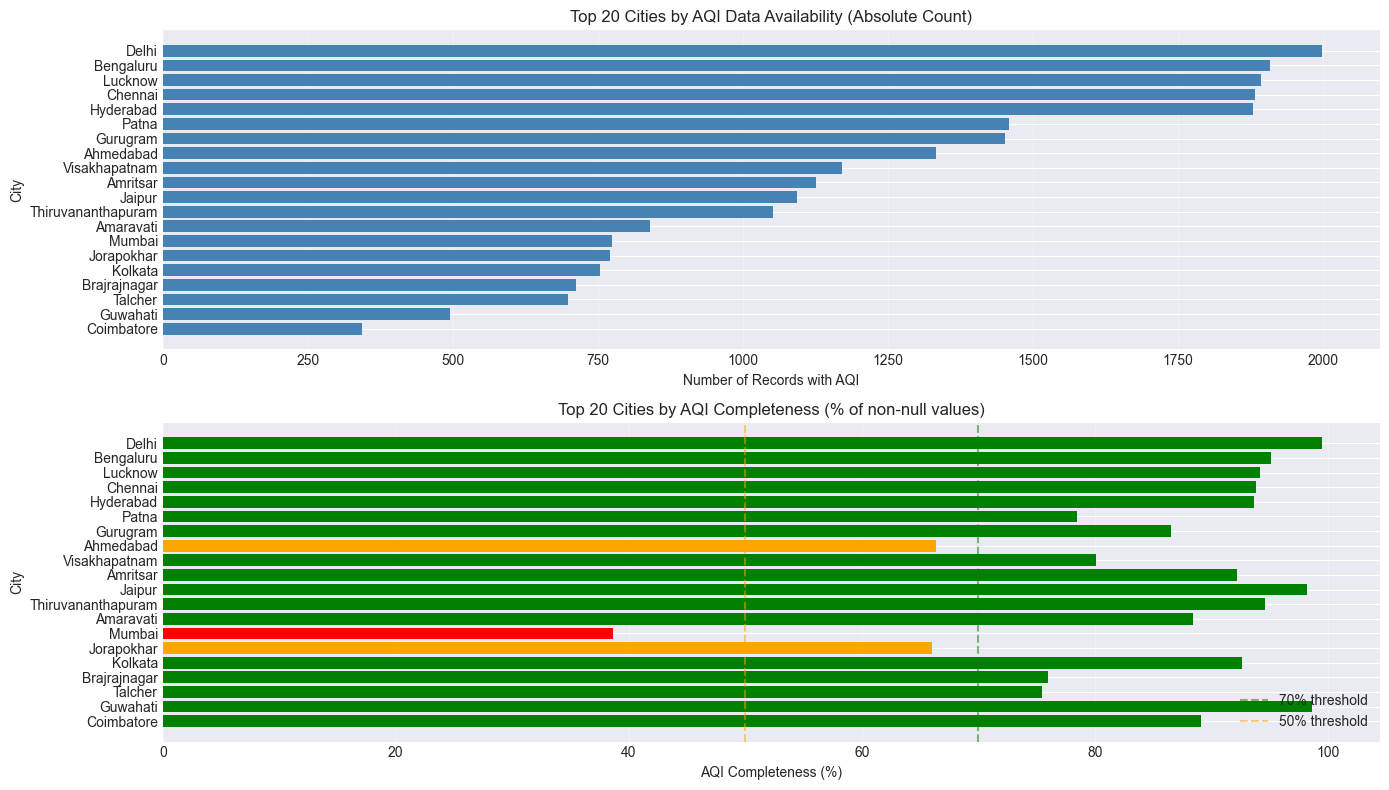

In [8]:
# ============================================================================
# ANALYZE ALL CITIES FOR DATA QUALITY (FOCUS ON AQI AVAILABILITY)
# ============================================================================

# Convert Date to datetime for analysis
df['Date'] = pd.to_datetime(df['Date'])

print("=" * 90)
print("ANALYZING ALL CITIES IN DATASET - AQI DATA QUALITY ASSESSMENT")
print("=" * 90)

# Analyze each city
city_analysis = []
for city in sorted(df['City'].unique()):
    city_data = df[df['City'] == city]
    
    # Calculate metrics
    total_rows = len(city_data)
    rows_with_aqi = city_data['AQI'].notna().sum()
    aqi_completeness = (rows_with_aqi / total_rows * 100) if total_rows > 0 else 0
    
    date_range_days = (city_data['Date'].max() - city_data['Date'].min()).days
    
    city_analysis.append({
        'City': city,
        'Total_Rows': total_rows,
        'Rows_With_AQI': rows_with_aqi,
        'AQI_Complete_%': round(aqi_completeness, 1),
        'Date_Range_Days': date_range_days,
        'Start_Date': city_data['Date'].min().strftime('%Y-%m-%d'),
        'End_Date': city_data['Date'].max().strftime('%Y-%m-%d')
    })

# Create DataFrame and sort by Rows_With_AQI (most important metric)
analysis_df = pd.DataFrame(city_analysis)
analysis_df = analysis_df.sort_values('Rows_With_AQI', ascending=False)

print(f"\nTotal cities in dataset: {len(analysis_df)}")
print(f"\nCities ranked by AQI data availability:")
print("=" * 90)
print(analysis_df.to_string(index=False))

# Summary statistics
print(f"\n\nSUMMARY STATISTICS:")
print("=" * 90)
print(f"Average AQI Completeness: {analysis_df['AQI_Complete_%'].mean():.1f}%")
print(f"Median AQI Completeness: {analysis_df['AQI_Complete_%'].median():.1f}%")
print(f"Cities with >70% AQI data: {(analysis_df['AQI_Complete_%'] >= 70).sum()}")
print(f"Cities with >50% AQI data: {(analysis_df['AQI_Complete_%'] >= 50).sum()}")
print(f"Cities with >30% AQI data: {(analysis_df['AQI_Complete_%'] >= 30).sum()}")
print(f"\nCities with ≥1000 AQI records: {(analysis_df['Rows_With_AQI'] >= 1000).sum()}")
print(f"Cities with ≥500 AQI records: {(analysis_df['Rows_With_AQI'] >= 500).sum()}")
print(f"Cities with ≥250 AQI records: {(analysis_df['Rows_With_AQI'] >= 250).sum()}")

# Visualization: Top 20 cities by AQI data availability
print(f"\n\nTOP 20 CITIES BY AQI DATA AVAILABILITY:")
print("=" * 90)
top_20 = analysis_df.head(20)
plt.figure(figsize=(14, 8))
plt.subplot(2, 1, 1)
plt.barh(top_20['City'], top_20['Rows_With_AQI'], color='steelblue')
plt.xlabel('Number of Records with AQI')
plt.ylabel('City')
plt.title('Top 20 Cities by AQI Data Availability (Absolute Count)')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.subplot(2, 1, 2)
colors = ['green' if x >= 70 else 'orange' if x >= 50 else 'red' for x in top_20['AQI_Complete_%']]
plt.barh(top_20['City'], top_20['AQI_Complete_%'], color=colors)
plt.xlabel('AQI Completeness (%)')
plt.ylabel('City')
plt.title('Top 20 Cities by AQI Completeness (% of non-null values)')
plt.axvline(x=70, color='green', linestyle='--', alpha=0.5, label='70% threshold')
plt.axvline(x=50, color='orange', linestyle='--', alpha=0.5, label='50% threshold')
plt.legend()
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()


SELECTING TOP 5 CITIES FOR DETAILED ANALYSIS

✓ Selected 5 cities based on AQI data availability:

     City  Total_Rows  Rows_With_AQI  AQI_Complete_%  Date_Range_Days Start_Date   End_Date
    Delhi        2009           1999           99.50             2008 2015-01-01 2020-07-01
Bengaluru        2009           1910           95.10             2008 2015-01-01 2020-07-01
  Lucknow        2009           1893           94.20             2008 2015-01-01 2020-07-01
  Chennai        2009           1884           93.80             2008 2015-01-01 2020-07-01
Hyderabad        2006           1880           93.70             2005 2015-01-04 2020-07-01


Target cities for detailed EDA:
  1. Delhi           - 1,999 AQI records (99.5% complete)
  2. Bengaluru       - 1,910 AQI records (95.1% complete)
  3. Lucknow         - 1,893 AQI records (94.2% complete)
  4. Chennai         - 1,884 AQI records (93.8% complete)
  5. Hyderabad       - 1,880 AQI records (93.7% complete)


FILTERED DATASET SUMMA

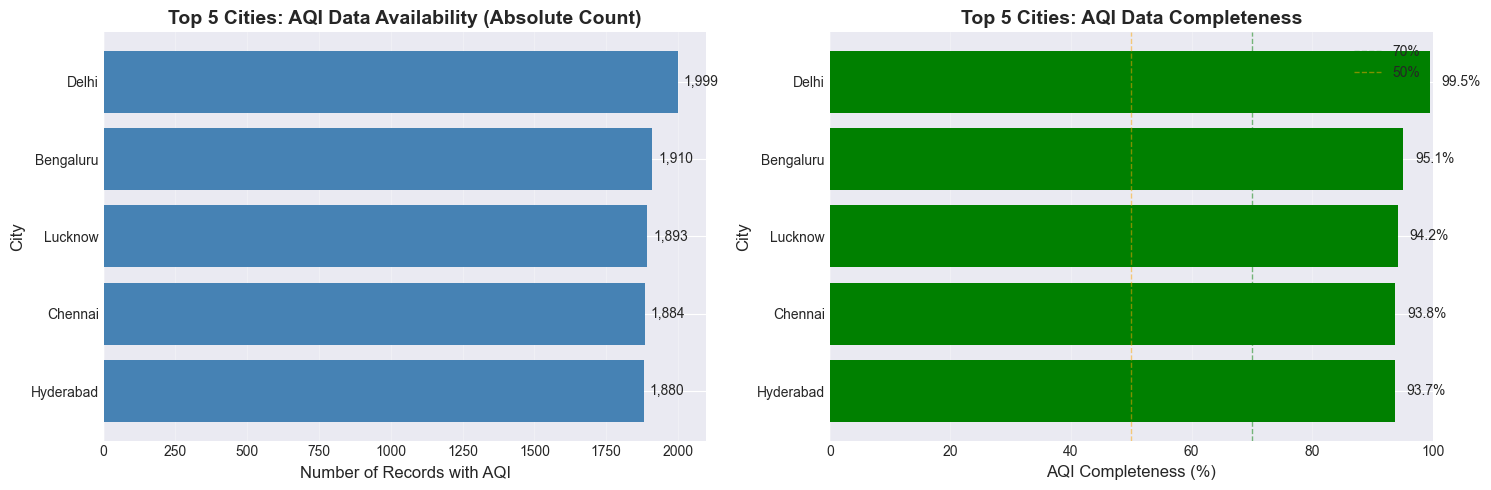

In [9]:
# ============================================================================
# SELECT TOP 5 CITIES WITH HIGHEST AQI DATA AVAILABILITY
# ============================================================================

print("\n" + "=" * 90)
print("SELECTING TOP 5 CITIES FOR DETAILED ANALYSIS")
print("=" * 90)

# Select top 5 cities from the sorted analysis
top_5_cities = analysis_df.head(5)
target_cities = top_5_cities['City'].tolist()

print(f"\n✓ Selected {len(target_cities)} cities based on AQI data availability:\n")
print(top_5_cities.to_string(index=False))

print(f"\n\nTarget cities for detailed EDA:")
for i, city in enumerate(target_cities, 1):
    aqi_records = top_5_cities.iloc[i-1]['Rows_With_AQI']
    completeness = top_5_cities.iloc[i-1]['AQI_Complete_%']
    print(f"  {i}. {city:15s} - {aqi_records:,} AQI records ({completeness}% complete)")

# Filter the main dataset for these 5 cities
df_filtered = df[df['City'].isin(target_cities)].copy()

print(f"\n\nFILTERED DATASET SUMMARY:")
print("-" * 90)
print(f"Shape: {df_filtered.shape}")
print(f"Total records: {len(df_filtered):,}")
print(f"Date range: {df_filtered['Date'].min().strftime('%Y-%m-%d')} to {df_filtered['Date'].max().strftime('%Y-%m-%d')}")

# Records per city in filtered dataset
print(f"\nRecords per city (in filtered dataset):")
city_summary = df_filtered.groupby('City').agg({
    'Date': 'count',
    'AQI': lambda x: x.notna().sum()
})
city_summary.columns = ['Total_Rows', 'Rows_With_AQI']
city_summary['AQI_Complete_%'] = (city_summary['Rows_With_AQI'] / city_summary['Total_Rows'] * 100).round(1)
city_summary = city_summary.sort_values('Rows_With_AQI', ascending=False)
print(city_summary)

# Visualization: Compare the 5 selected cities
print(f"\n\nVISUALIZING SELECTED CITIES:")
print("=" * 90)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Chart 1: AQI Record Count
axes[0].barh(top_5_cities['City'], top_5_cities['Rows_With_AQI'], color='steelblue')
axes[0].set_xlabel('Number of Records with AQI', fontsize=12)
axes[0].set_ylabel('City', fontsize=12)
axes[0].set_title('Top 5 Cities: AQI Data Availability (Absolute Count)', fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
axes[0].invert_yaxis()
for i, (city, count) in enumerate(zip(top_5_cities['City'], top_5_cities['Rows_With_AQI'])):
    axes[0].text(count + 20, i, f'{count:,}', va='center', fontsize=10)

# Chart 2: AQI Completeness %
colors_completeness = ['green' if x >= 70 else 'orange' if x >= 50 else 'red' 
                       for x in top_5_cities['AQI_Complete_%']]
axes[1].barh(top_5_cities['City'], top_5_cities['AQI_Complete_%'], color=colors_completeness)
axes[1].set_xlabel('AQI Completeness (%)', fontsize=12)
axes[1].set_ylabel('City', fontsize=12)
axes[1].set_title('Top 5 Cities: AQI Data Completeness', fontsize=14, fontweight='bold')
axes[1].axvline(x=70, color='green', linestyle='--', alpha=0.5, linewidth=1, label='70%')
axes[1].axvline(x=50, color='orange', linestyle='--', alpha=0.5, linewidth=1, label='50%')
axes[1].set_xlim(0, 100)
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()
for i, (city, pct) in enumerate(zip(top_5_cities['City'], top_5_cities['AQI_Complete_%'])):
    axes[1].text(pct + 2, i, f'{pct}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [10]:
# Display basic information
print("Dataset Info:")
df_filtered.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 10042 entries, 4294 to 21854
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        10042 non-null  object        
 1   Date        10042 non-null  datetime64[ns]
 2   PM2.5       9560 non-null   float64       
 3   PM10        5534 non-null   float64       
 4   NO          9946 non-null   float64       
 5   NO2         9946 non-null   float64       
 6   NOx         9671 non-null   float64       
 7   NH3         8004 non-null   float64       
 8   CO          9973 non-null   float64       
 9   SO2         9800 non-null   float64       
 10  O3          9712 non-null   float64       
 11  Benzene     9265 non-null   float64       
 12  Toluene     9433 non-null   float64       
 13  Xylene      3107 non-null   float64       
 14  AQI         9566 non-null   float64       
 15  AQI_Bucket  9566 non-null   object        
dtypes: datetim

---

## 3. Data Quality Assessment <a id='quality'></a>

Evaluate data completeness, temporal coverage, and quality metrics for each city.

In [11]:
# Convert Date column to datetime
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

print("=" * 80)
print("DATA QUALITY ASSESSMENT - 5 SELECTED CITIES")
print("=" * 80)

# 1. Missing Values Analysis per City
print("\n1. MISSING VALUES PERCENTAGE BY CITY\n")
print("-" * 80)

missing_by_city = []
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    if len(city_data) > 0:
        missing_pct = (city_data.isnull().sum() / len(city_data)) * 100
        missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
        if len(missing_pct) > 0:
            print(f"\n{city}:")
            for feature, pct in missing_pct.items():
                print(f"  {feature:15s}: {pct:5.1f}%")
    else:
        print(f"\n{city}: NO DATA FOUND")

# 2. Overall Missing Values Summary
print("\n\n2. OVERALL MISSING VALUES SUMMARY")
print("-" * 80)
missing_summary = pd.DataFrame({
    'Total_Missing': df_filtered.isnull().sum(),
    'Percent_Missing': (df_filtered.isnull().sum() / len(df_filtered)) * 100
})
missing_summary = missing_summary[missing_summary['Total_Missing'] > 0].sort_values('Percent_Missing', ascending=False)
print(missing_summary)

# 3. Temporal Coverage per City
print("\n\n3. TEMPORAL COVERAGE BY CITY")
print("-" * 80)
temporal_summary = []
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    if len(city_data) > 0:
        date_range = (city_data['Date'].max() - city_data['Date'].min()).days + 1
        temporal_summary.append({
            'City': city,
            'Start_Date': city_data['Date'].min().strftime('%Y-%m-%d'),
            'End_Date': city_data['Date'].max().strftime('%Y-%m-%d'),
            'Date_Range_Days': date_range,
            'Total_Records': len(city_data),
            'Density_%': f"{len(city_data) / date_range * 100:.1f}"
        })

temporal_df = pd.DataFrame(temporal_summary)
print(temporal_df.to_string(index=False))

# 4. Feature Completeness Score per City
print("\n\n4. FEATURE COMPLETENESS (Key Pollutants + AQI) BY CITY")
print("-" * 80)
key_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']
completeness_summary = []

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    if len(city_data) > 0:
        completeness = {'City': city}
        
        for feature in key_features:
            if feature in city_data.columns:
                completeness[feature] = f"{(1 - city_data[feature].isnull().sum() / len(city_data)) * 100:.1f}%"
            else:
                completeness[feature] = "N/A"
        
        # Overall completeness score
        available_features = [f for f in key_features if f in city_data.columns]
        if available_features:
            overall = (1 - city_data[available_features].isnull().sum().sum() / (len(city_data) * len(available_features))) * 100
            completeness['Overall'] = f"{overall:.1f}%"
        else:
            completeness['Overall'] = "N/A"
        
        completeness_summary.append(completeness)

completeness_df = pd.DataFrame(completeness_summary)
print(completeness_df.to_string(index=False))

# 5. Data Quality Summary Statistics
print("\n\n5. DATA QUALITY SUMMARY STATISTICS")
print("-" * 80)
summary_stats = df_filtered.groupby('City').agg({
    'Date': ['count', 'nunique'],
    'AQI': lambda x: f"{(1 - x.isnull().sum() / len(x)) * 100:.1f}%"
})
summary_stats.columns = ['Total_Records', 'Unique_Dates', 'AQI_Completeness']
print(summary_stats)

DATA QUALITY ASSESSMENT - 5 SELECTED CITIES

1. MISSING VALUES PERCENTAGE BY CITY

--------------------------------------------------------------------------------

Delhi:
  Xylene         :  38.9%
  SO2            :   5.5%
  O3             :   4.2%
  PM10           :   3.8%
  AQI_Bucket     :   0.5%
  AQI            :   0.5%
  NH3            :   0.4%
  PM2.5          :   0.1%
  NO             :   0.1%
  NO2            :   0.1%

Bengaluru:
  Xylene         : 100.0%
  PM10           :  17.9%
  Benzene        :  13.2%
  NH3            :  10.1%
  PM2.5          :   7.3%
  O3             :   7.2%
  AQI_Bucket     :   4.9%
  AQI            :   4.9%
  Toluene        :   4.6%
  CO             :   0.5%
  NO             :   0.3%
  NO2            :   0.3%
  SO2            :   0.3%
  NOx            :   0.2%

Lucknow:
  PM10           : 100.0%
  Xylene         : 100.0%
  NH3            :  50.0%
  NOx            :  16.1%
  Toluene        :   6.8%
  AQI_Bucket     :   5.8%
  AQI            :   5.8%


---

## 4. Univariate Analysis <a id='univariate'></a>

Analyze distributions and summary statistics for pollutants and AQI.

### 4.1 Overall Summary Statistics

Calculate descriptive statistics for all pollutants and AQI across the entire filtered dataset.

In [12]:
# ============================================================================
# OVERALL SUMMARY STATISTICS - ALL 5 CITIES COMBINED
# ============================================================================

print("=" * 80)
print("OVERALL SUMMARY STATISTICS - ALL POLLUTANTS AND AQI")
print("=" * 80)

# Select numerical columns (pollutants and AQI)
numerical_cols = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 
                  'Benzene', 'Toluene', 'Xylene', 'AQI']

# Calculate summary statistics
summary_stats = df_filtered[numerical_cols].describe()

# Add additional statistics
summary_stats.loc['missing_count'] = df_filtered[numerical_cols].isnull().sum()
summary_stats.loc['missing_%'] = (df_filtered[numerical_cols].isnull().sum() / len(df_filtered) * 100).round(2)

print("\nSummary Statistics (All 5 cities combined):\n")
print(summary_stats.round(2))

# Key pollutants focus
print("\n" + "=" * 80)
print("KEY POLLUTANTS SUMMARY (PM2.5, PM10, NO2, SO2, CO, O3, AQI)")
print("=" * 80)
key_pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']
key_summary = df_filtered[key_pollutants].describe().T
key_summary['missing_%'] = (df_filtered[key_pollutants].isnull().sum() / len(df_filtered) * 100).round(2)
print(key_summary.round(2))

OVERALL SUMMARY STATISTICS - ALL POLLUTANTS AND AQI

Summary Statistics (All 5 cities combined):

                PM2.5    PM10      NO     NO2     NOx     NH3      CO     SO2  \
count         9560.00 5534.00 9946.00 9946.00 9671.00 8004.00 9973.00 9800.00   
mean            72.75  136.94   16.18   31.51   27.80   34.73    1.52    9.62   
std             66.51  105.89   21.04   20.11   26.70   32.65    2.58   10.12   
min              1.72    0.21    0.11    0.62    0.00    0.02    0.00    0.71   
25%             32.24   66.24    5.95   16.46   12.28   15.46    0.65    5.05   
50%             51.34  102.48    9.26   26.61   20.16   27.24    0.96    7.14   
75%             83.71  166.28   15.88   41.48   32.84   41.24    1.40   11.14   
max            742.67  796.88  221.03  162.50  254.80  352.89   48.07  187.02   
missing_count  482.00 4508.00   96.00   96.00  371.00 2038.00   69.00  242.00   
missing_%        4.80   44.89    0.96    0.96    3.69   20.29    0.69    2.41   

          

### 4.2 Summary Statistics by City

Compare pollution levels and AQI statistics across the 5 selected cities.

In [13]:
# ============================================================================
# SUMMARY STATISTICS BY CITY
# ============================================================================

print("=" * 80)
print("SUMMARY STATISTICS BY CITY - KEY POLLUTANTS AND AQI")
print("=" * 80)

# Taking only key pollutants and AQI
key_pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']

# Calculate statistics for each city
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    print(f"\n{'=' * 80}")
    print(f"{city.upper()}")
    print(f"{'=' * 80}")
    print(f"Total Records: {len(city_data)}")
    print(f"\nKey Pollutants Statistics:\n")
    
    stats = city_data[key_pollutants].describe().T
    stats['missing_%'] = (city_data[key_pollutants].isnull().sum() / len(city_data) * 100).round(2)
    print(stats[['mean', 'std', '50%', 'min', 'max', 'missing_%']].round(2))

# Create comparison table - Mean values by city
print("\n" + "=" * 80)
print("MEAN POLLUTION LEVELS COMPARISON ACROSS CITIES")
print("=" * 80)

mean_comparison = df_filtered.groupby('City')[key_pollutants].mean().round(2)
mean_comparison = mean_comparison.loc[target_cities]  # Order by our target cities
print(mean_comparison)

SUMMARY STATISTICS BY CITY - KEY POLLUTANTS AND AQI

DELHI
Total Records: 2009

Key Pollutants Statistics:

        mean    std    50%   min    max  missing_%
PM2.5 117.20  82.91  94.62 10.24 685.36       0.10
PM10  232.81 121.87 216.73 18.59 796.88       3.83
NO2    50.79  22.70  47.15 10.63 162.50       0.10
SO2    15.90   7.97  14.45  2.34  71.56       5.48
CO      1.98   2.56   1.24  0.00  30.44       0.00
O3     51.32  26.06  44.44  6.94 257.73       4.18
AQI   259.49 119.54 257.00 29.00 716.00       0.50

BENGALURU
Total Records: 2009

Key Pollutants Statistics:

       mean   std   50%   min    max  missing_%
PM2.5 35.82 22.07 30.92  1.72 313.59       7.27
PM10  83.24 38.11 77.36  8.22 351.51      17.92
NO2   28.00 13.29 26.92  3.00 142.35       0.30
SO2    5.52  4.19  5.03  0.73  92.66       0.30
CO     1.84  3.97  0.92  0.00  48.07       0.55
O3    32.87 18.40 30.60  1.83 157.20       7.17
AQI   94.32 39.91 86.00 20.00 352.00       4.93

LUCKNOW
Total Records: 2009

Key Pollut

### 4.3 AQI Distribution Analysis

Examine the distribution of AQI values and AQI categories across cities.

AQI DISTRIBUTION ANALYSIS


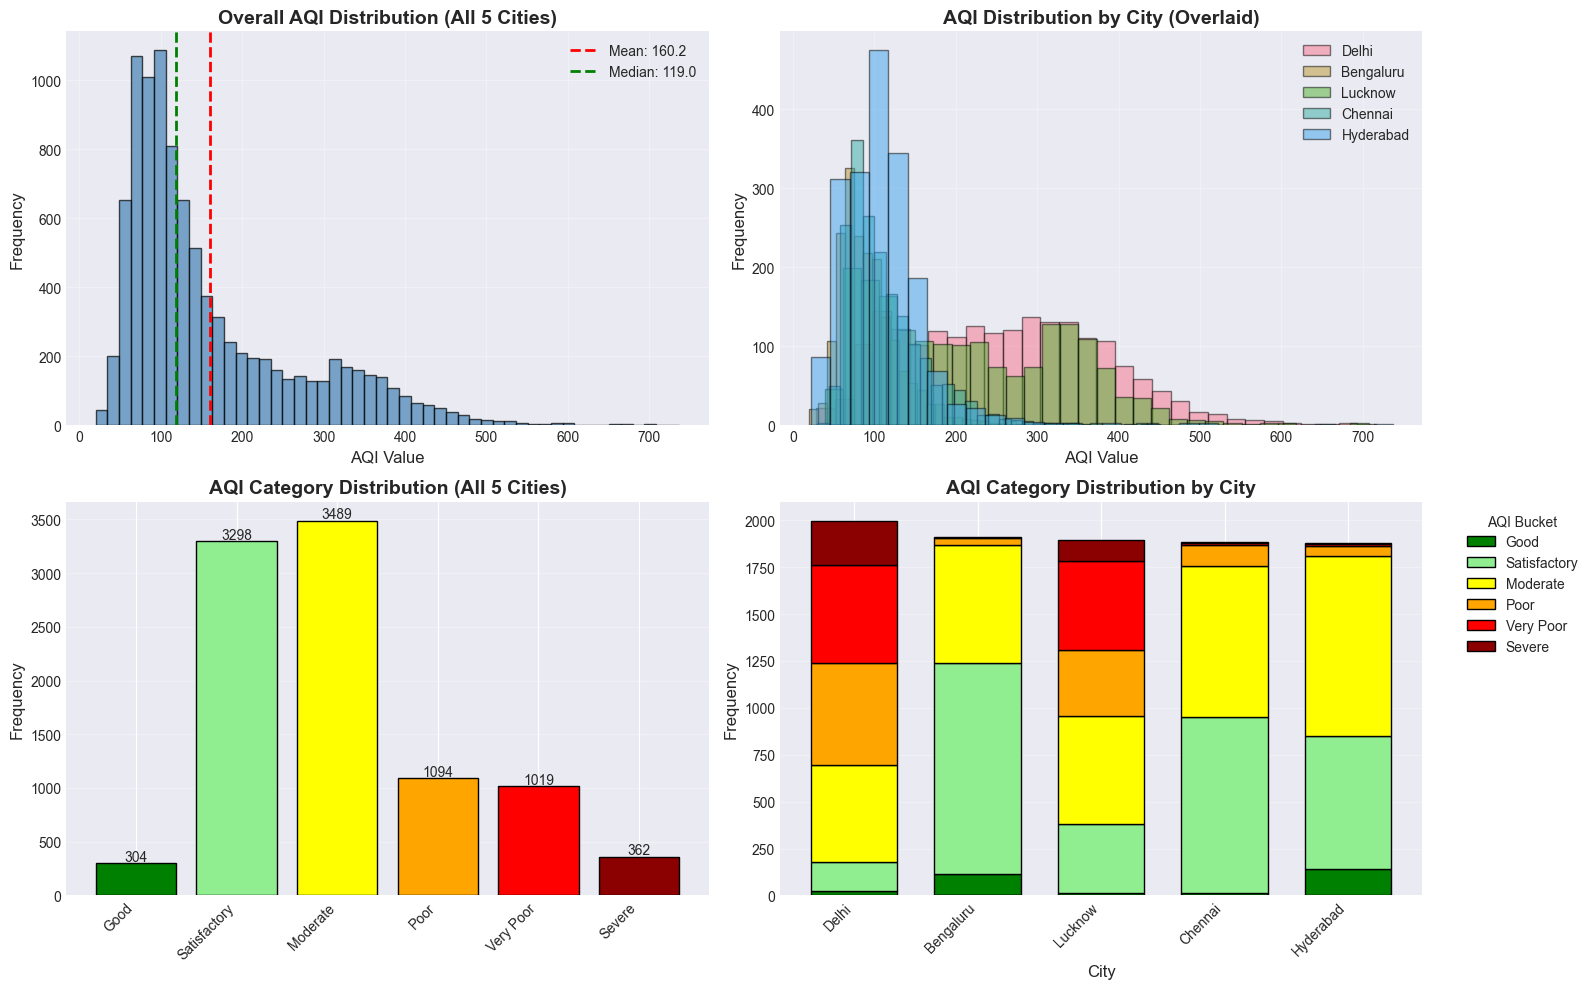


AQI BUCKET DISTRIBUTION (Percentage):
--------------------------------------------------------------------------------

Delhi:
  Poor           :  27.1%
  Very Poor      :  26.0%
  Moderate       :  26.0%
  Severe         :  12.0%
  Satisfactory   :   7.9%
  Good           :   1.1%

Bengaluru:
  Satisfactory   :  58.8%
  Moderate       :  33.0%
  Good           :   6.0%
  Poor           :   1.9%
  Very Poor      :   0.3%

Lucknow:
  Moderate       :  30.5%
  Very Poor      :  25.0%
  Satisfactory   :  19.3%
  Poor           :  18.6%
  Severe         :   5.8%
  Good           :   0.8%

Chennai:
  Satisfactory   :  49.9%
  Moderate       :  42.7%
  Poor           :   5.8%
  Good           :   0.6%
  Very Poor      :   0.6%
  Severe         :   0.3%

Hyderabad:
  Moderate       :  51.0%
  Satisfactory   :  37.8%
  Good           :   7.5%
  Poor           :   2.9%
  Very Poor      :   0.5%
  Severe         :   0.4%


In [14]:
# ============================================================================
# AQI DISTRIBUTION ANALYSIS
# ============================================================================

print("=" * 80)
print("AQI DISTRIBUTION ANALYSIS")
print("=" * 80)

# 1. Overall AQI distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Subplot 1: Overall AQI histogram
axes[0, 0].hist(df_filtered['AQI'].dropna(), bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df_filtered['AQI'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_filtered["AQI"].mean():.1f}')
axes[0, 0].axvline(df_filtered['AQI'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_filtered["AQI"].median():.1f}')
axes[0, 0].set_xlabel('AQI Value', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].set_title('Overall AQI Distribution (All 5 Cities)', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Subplot 2: AQI distribution by city (overlaid)
for city in target_cities:
    city_aqi = df_filtered[df_filtered['City'] == city]['AQI'].dropna()
    axes[0, 1].hist(city_aqi, bins=30, alpha=0.5, label=city, edgecolor='black')
axes[0, 1].set_xlabel('AQI Value', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].set_title('AQI Distribution by City (Overlaid)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Subplot 3: AQI Bucket frequency (overall)
aqi_bucket_counts = df_filtered['AQI_Bucket'].value_counts().sort_index()
bucket_order = ['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe']
aqi_bucket_counts = aqi_bucket_counts.reindex([b for b in bucket_order if b in aqi_bucket_counts.index])
colors_buckets = ['green', 'lightgreen', 'yellow', 'orange', 'red', 'darkred']
axes[1, 0].bar(range(len(aqi_bucket_counts)), aqi_bucket_counts.values, 
               color=colors_buckets[:len(aqi_bucket_counts)], edgecolor='black')
axes[1, 0].set_xticks(range(len(aqi_bucket_counts)))
axes[1, 0].set_xticklabels(aqi_bucket_counts.index, rotation=45, ha='right')
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title('AQI Category Distribution (All 5 Cities)', fontsize=14, fontweight='bold')
axes[1, 0].grid(axis='y', alpha=0.3)
for i, v in enumerate(aqi_bucket_counts.values):
    axes[1, 0].text(i, v + 20, str(v), ha='center', fontsize=10)

# Subplot 4: AQI Bucket by city (stacked bar)
bucket_by_city = pd.crosstab(df_filtered['City'], df_filtered['AQI_Bucket'])
bucket_by_city = bucket_by_city.reindex(columns=[b for b in bucket_order if b in bucket_by_city.columns], fill_value=0)
bucket_by_city = bucket_by_city.loc[target_cities]
bucket_by_city.plot(kind='bar', stacked=True, ax=axes[1, 1], 
                     color=colors_buckets[:len(bucket_by_city.columns)], 
                     edgecolor='black', width=0.7)
axes[1, 1].set_xlabel('City', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title('AQI Category Distribution by City', fontsize=14, fontweight='bold')
axes[1, 1].legend(title='AQI Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(), rotation=45, ha='right')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print AQI bucket statistics
print("\nAQI BUCKET DISTRIBUTION (Percentage):")
print("-" * 80)
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    bucket_pct = (city_data['AQI_Bucket'].value_counts(normalize=True) * 100).round(1)
    print(f"\n{city}:")
    for bucket, pct in bucket_pct.items():
        print(f"  {bucket:15s}: {pct:5.1f}%")

### 4.4 Key Pollutants Distribution

Visualize distributions of major pollutants (PM2.5, PM10, NO2, SO2, CO, O3) across cities.

KEY POLLUTANTS DISTRIBUTION ANALYSIS


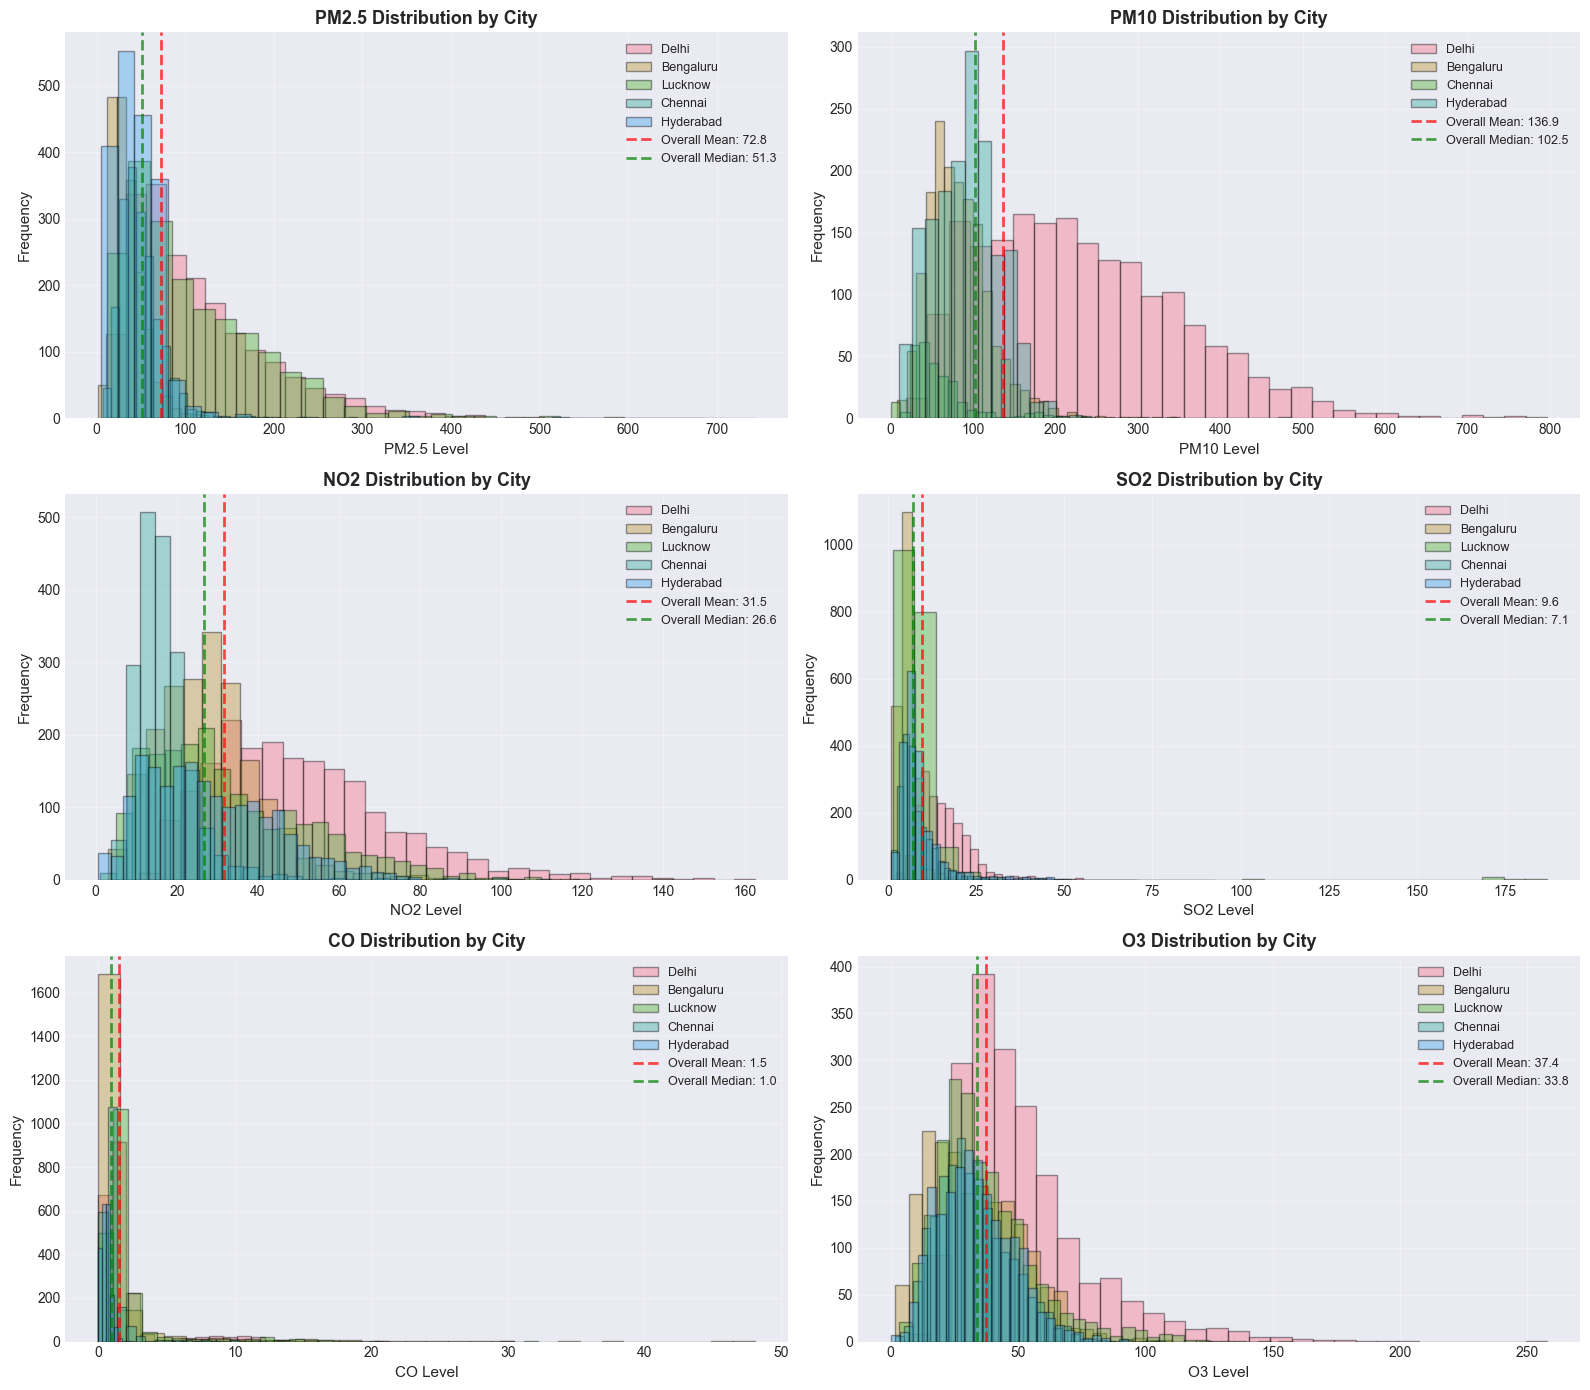

In [15]:
# ============================================================================
# KEY POLLUTANTS DISTRIBUTION
# ============================================================================

print("=" * 80)
print("KEY POLLUTANTS DISTRIBUTION ANALYSIS")
print("=" * 80)

key_pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3']

# Create subplots for each pollutant
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for idx, pollutant in enumerate(key_pollutants):
    ax = axes[idx]
    
    # Plot histogram for each city
    for city in target_cities:
        city_data = df_filtered[df_filtered['City'] == city][pollutant].dropna()
        if len(city_data) > 0:
            ax.hist(city_data, bins=30, alpha=0.4, label=city, edgecolor='black')
    
    # Add mean and median lines for overall distribution
    overall_data = df_filtered[pollutant].dropna()
    if len(overall_data) > 0:
        mean_val = overall_data.mean()
        median_val = overall_data.median()
        ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, alpha=0.7, label=f'Overall Mean: {mean_val:.1f}')
        ax.axvline(median_val, color='green', linestyle='--', linewidth=2, alpha=0.7, label=f'Overall Median: {median_val:.1f}')
    
    ax.set_xlabel(f'{pollutant} Level', fontsize=11)
    ax.set_ylabel('Frequency', fontsize=11)
    ax.set_title(f'{pollutant} Distribution by City', fontsize=13, fontweight='bold')
    ax.legend(fontsize=9, loc='upper right')
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 4.5 Outlier Detection

Identify outliers in pollutant levels and AQI using box plots.

OUTLIER DETECTION USING BOX PLOTS


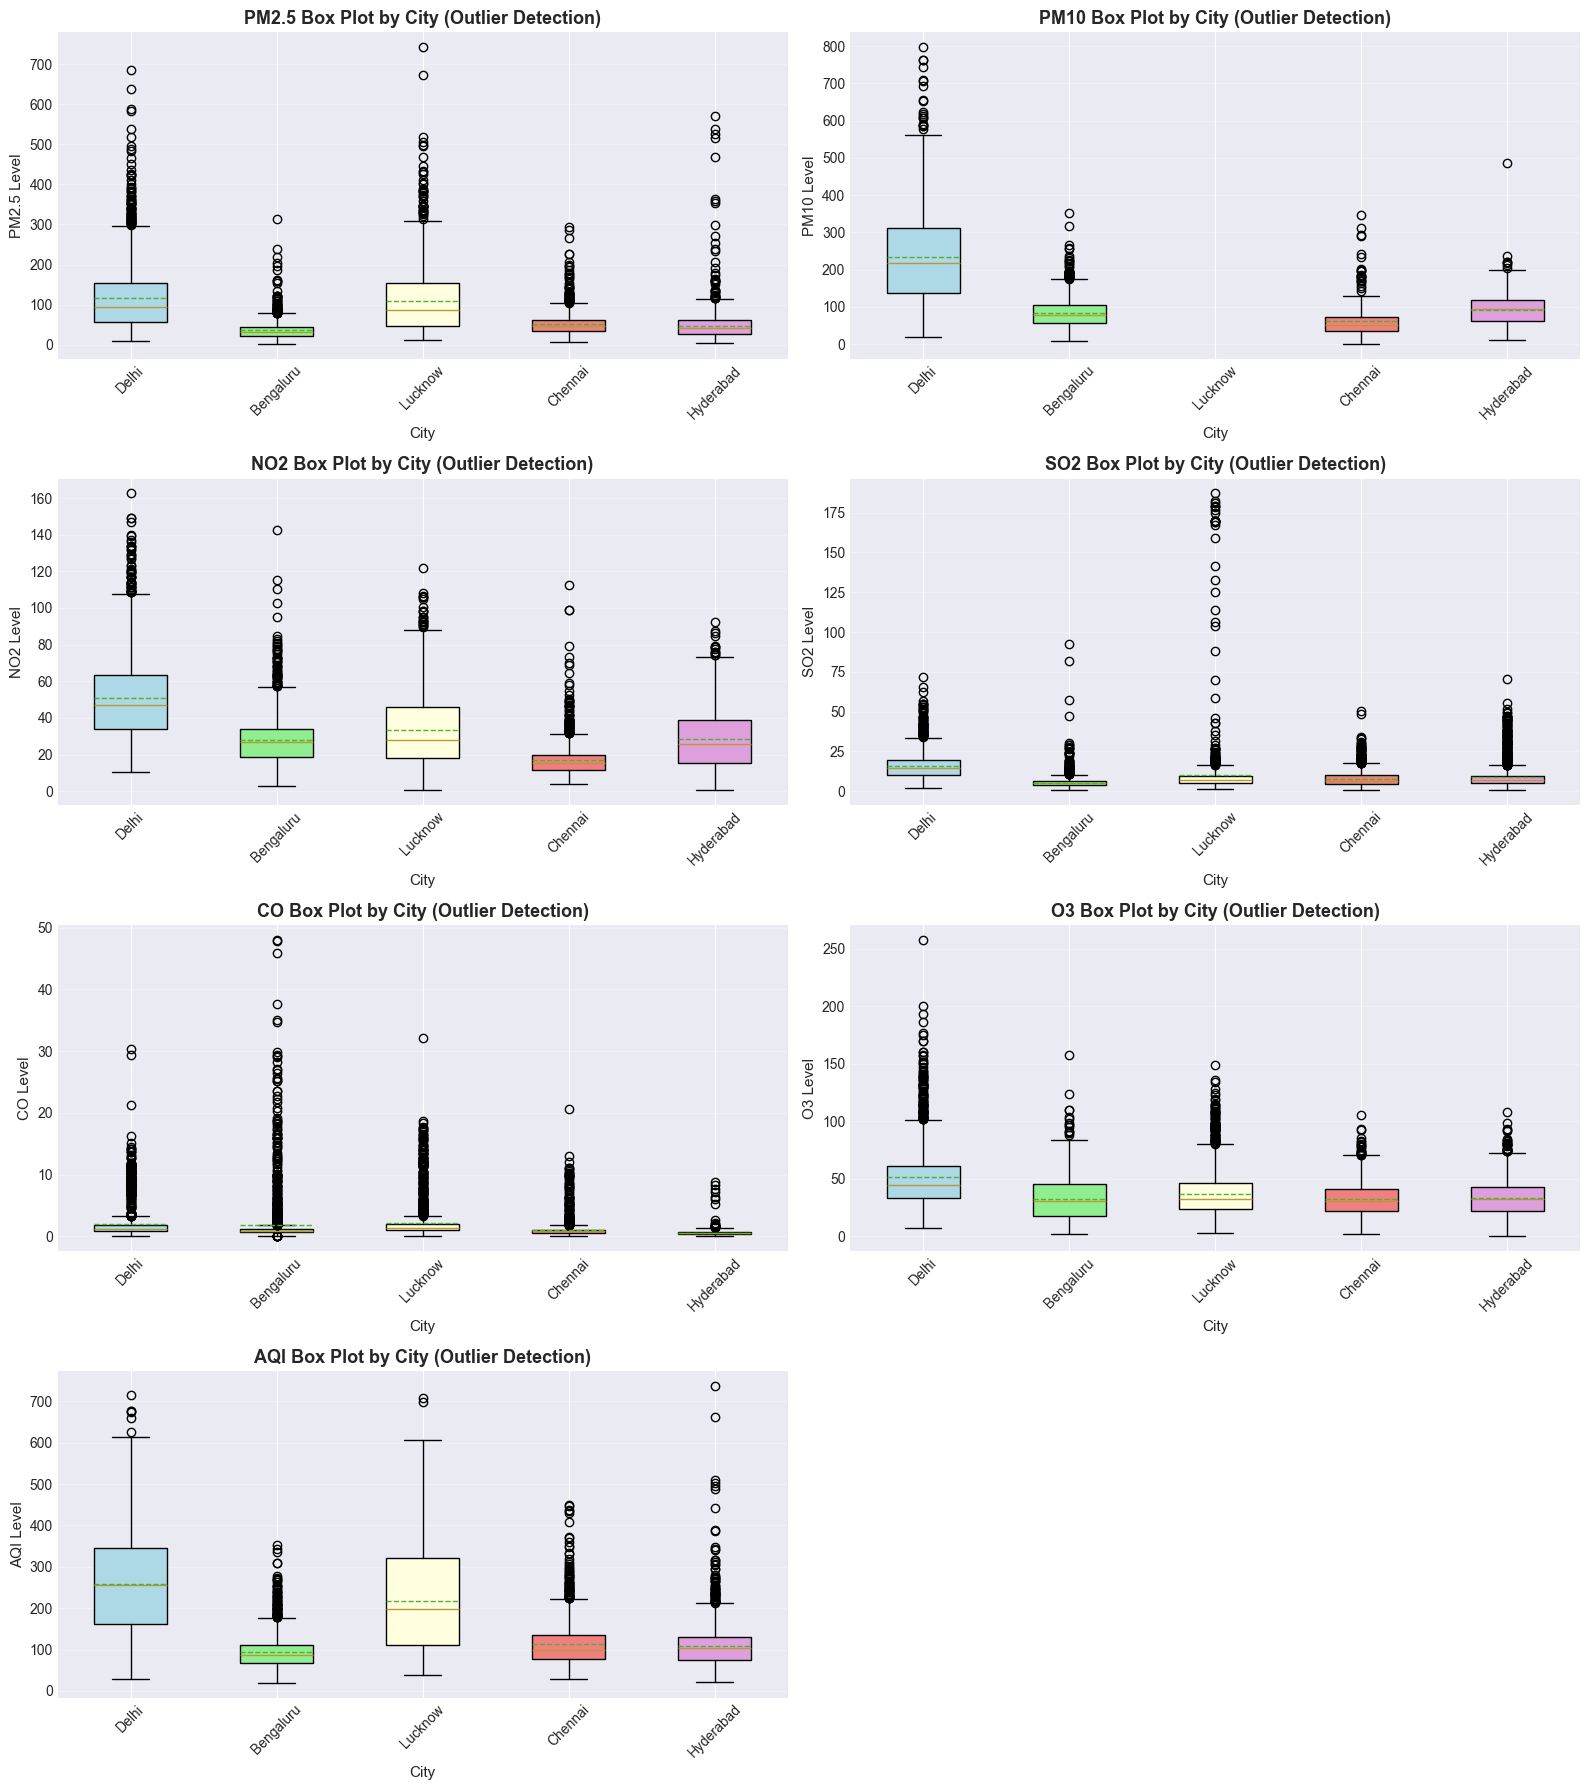


OUTLIER STATISTICS (Using IQR method):
--------------------------------------------------------------------------------

PM2.5:
  Delhi          :   73 outliers ( 3.64%) | Range: [-86.8, 296.9]
  Bengaluru      :   59 outliers ( 3.17%) | Range: [-13.1, 78.7]
  Lucknow        :   39 outliers ( 2.05%) | Range: [-111.0, 311.8]
  Chennai        :   57 outliers ( 3.01%) | Range: [-9.1, 103.8]
  Hyderabad      :   39 outliers ( 2.06%) | Range: [-27.6, 114.9]

PM10:
  Delhi          :   19 outliers ( 0.98%) | Range: [-124.9, 573.6]
  Bengaluru      :   44 outliers ( 2.67%) | Range: [-14.8, 175.0]
  Chennai        :   23 outliers ( 7.62%) | Range: [-21.6, 128.1]
  Hyderabad      :    7 outliers ( 0.42%) | Range: [-22.4, 201.3]

NO2:
  Delhi          :   51 outliers ( 2.54%) | Range: [-10.6, 108.1]
  Bengaluru      :   57 outliers ( 2.85%) | Range: [-4.3, 57.3]
  Lucknow        :   22 outliers ( 1.11%) | Range: [-24.1, 88.1]
  Chennai        :   79 outliers ( 4.00%) | Range: [0.2, 31.3]
  Hyde

In [16]:
# ============================================================================
# OUTLIER DETECTION - BOX PLOTS
# ============================================================================

print("=" * 80)
print("OUTLIER DETECTION USING BOX PLOTS")
print("=" * 80)

key_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']

# Create box plots for each feature by city
fig, axes = plt.subplots(4, 2, figsize=(16, 18))
axes = axes.flatten()

for idx, feature in enumerate(key_features):
    ax = axes[idx]
    
    # Prepare data for box plot
    data_by_city = [df_filtered[df_filtered['City'] == city][feature].dropna() 
                    for city in target_cities]
    
    # Create box plot
    bp = ax.boxplot(data_by_city, labels=target_cities, patch_artist=True, 
                    showmeans=True, meanline=True)
    
    # Color the boxes
    colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral', 'plum']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_ylabel(f'{feature} Level', fontsize=11)
    ax.set_xlabel('City', fontsize=11)
    ax.set_title(f'{feature} Box Plot by City (Outlier Detection)', fontsize=13, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Remove the extra subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.show()

# Calculate and display outlier statistics
print("\nOUTLIER STATISTICS (Using IQR method):")
print("-" * 80)

for feature in key_features:
    print(f"\n{feature}:")
    for city in target_cities:
        city_data = df_filtered[df_filtered['City'] == city][feature].dropna()
        if len(city_data) > 0:
            Q1 = city_data.quantile(0.25)
            Q3 = city_data.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = city_data[(city_data < lower_bound) | (city_data > upper_bound)]
            outlier_pct = (len(outliers) / len(city_data)) * 100
            print(f"  {city:15s}: {len(outliers):4d} outliers ({outlier_pct:5.2f}%) | Range: [{lower_bound:.1f}, {upper_bound:.1f}]")

## Bivariate/Multivariate analysis
Bivariate: Analysing relationship between variables and target variables

Multivariate: Between variables

### 5.1 Correlation Analysis

Examine correlations between pollutants and AQI to identify key predictive features.

CORRELATION ANALYSIS - POLLUTANTS AND AQI


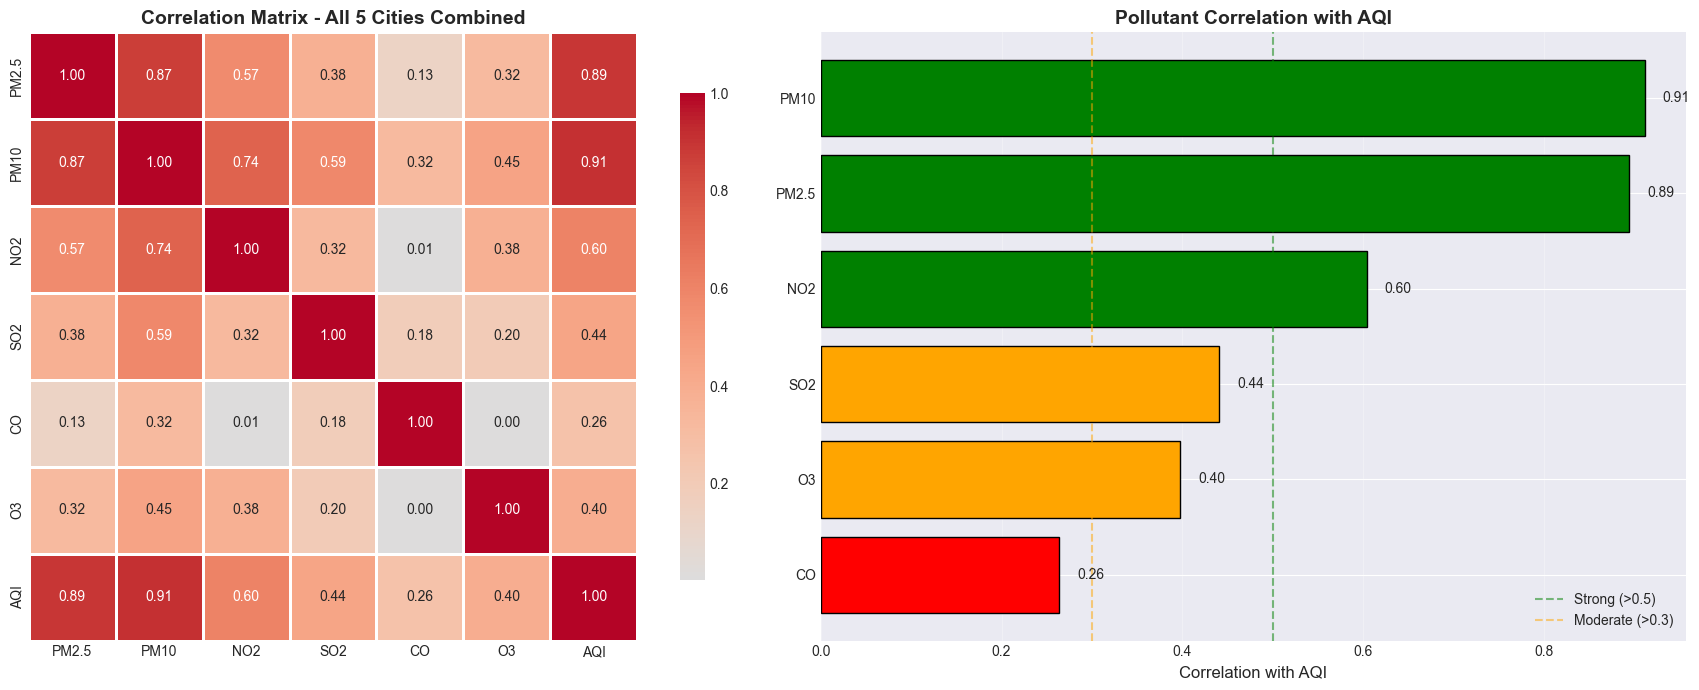


CORRELATION WITH AQI (sorted by strength):
--------------------------------------------------------------------------------
PM10    0.91
PM2.5   0.89
NO2     0.60
SO2     0.44
O3      0.40
CO      0.26
Name: AQI, dtype: float64


CORRELATION WITH AQI BY CITY:
--------------------------------------------------------------------------------

Delhi:
  PM10      : 0.885
  PM2.5     : 0.882
  NO2       : 0.666
  SO2       : 0.415
  O3        : 0.330
  CO        : 0.280

Bengaluru:
  PM10      : 0.599
  PM2.5     : 0.427
  CO        : 0.383
  O3        : 0.265
  NO2       : 0.230
  SO2       : 0.026

Lucknow:
  PM2.5     : 0.919
  NO2       : 0.540
  SO2       : 0.282
  O3        : 0.270
  CO        : 0.133
  PM10      : nan

Chennai:
  PM2.5     : 0.686
  PM10      : 0.368
  CO        : 0.354
  NO2       : 0.195
  O3        : 0.170
  SO2       : 0.090

Hyderabad:
  PM2.5     : 0.798
  PM10      : 0.677
  CO        : 0.367
  O3        : 0.283
  SO2       : 0.212
  NO2       : 0.114


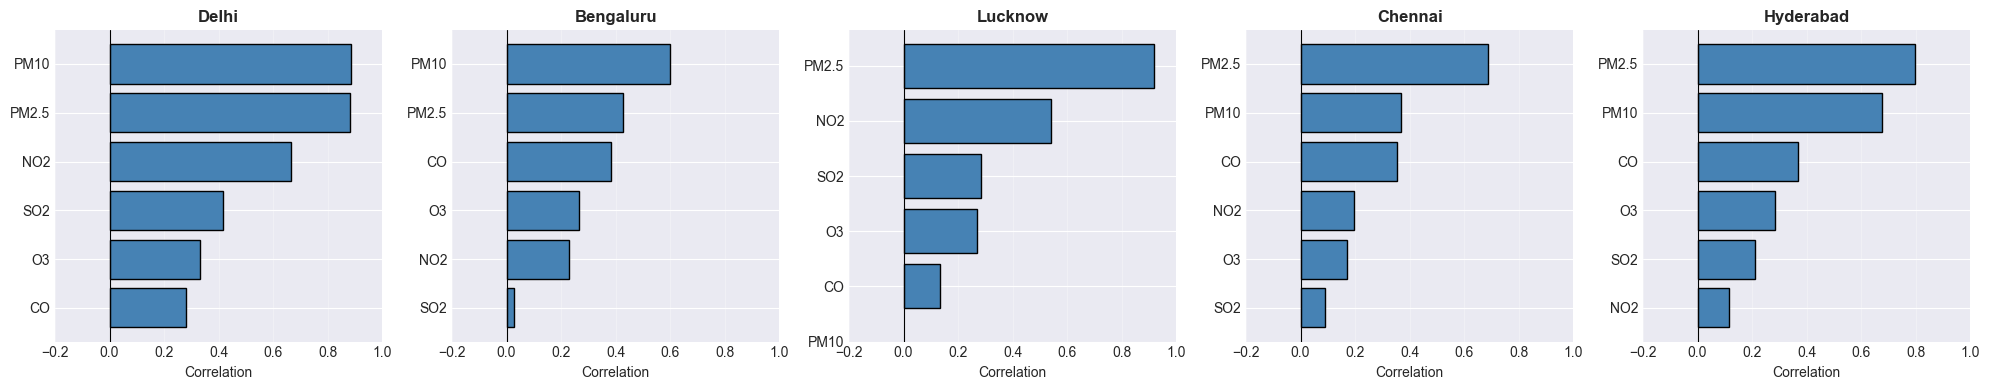

In [17]:
# ============================================================================
# CORRELATION ANALYSIS
# ============================================================================

print("=" * 80)
print("CORRELATION ANALYSIS - POLLUTANTS AND AQI")
print("=" * 80)

# Key pollutants and AQI
key_features = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'AQI']

# Overall correlation heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Subplot 1: Overall correlation (all 5 cities combined)
corr_overall = df_filtered[key_features].corr()
sns.heatmap(corr_overall, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Correlation Matrix - All 5 Cities Combined', fontsize=14, fontweight='bold')

# Subplot 2: Correlation with AQI specifically
aqi_corr = corr_overall['AQI'].drop('AQI').sort_values(ascending=False)
colors_corr = ['green' if x > 0.5 else 'orange' if x > 0.3 else 'red' for x in aqi_corr.values]
axes[1].barh(range(len(aqi_corr)), aqi_corr.values, color=colors_corr, edgecolor='black')
axes[1].set_yticks(range(len(aqi_corr)))
axes[1].set_yticklabels(aqi_corr.index)
axes[1].set_xlabel('Correlation with AQI', fontsize=12)
axes[1].set_title('Pollutant Correlation with AQI', fontsize=14, fontweight='bold')
axes[1].axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Strong (>0.5)')
axes[1].axvline(x=0.3, color='orange', linestyle='--', alpha=0.5, label='Moderate (>0.3)')
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)
axes[1].invert_yaxis()
for i, v in enumerate(aqi_corr.values):
    axes[1].text(v + 0.02, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Print correlation with AQI
print("\nCORRELATION WITH AQI (sorted by strength):")
print("-" * 80)
print(aqi_corr)

# Correlation by city
print("\n\nCORRELATION WITH AQI BY CITY:")
print("-" * 80)

fig, axes = plt.subplots(1, len(target_cities), figsize=(20, 4))

for idx, city in enumerate(target_cities):
    city_data = df_filtered[df_filtered['City'] == city]
    city_corr = city_data[key_features].corr()['AQI'].drop('AQI').sort_values(ascending=False)
    
    axes[idx].barh(range(len(city_corr)), city_corr.values, color='steelblue', edgecolor='black')
    axes[idx].set_yticks(range(len(city_corr)))
    axes[idx].set_yticklabels(city_corr.index)
    axes[idx].set_xlabel('Correlation', fontsize=10)
    axes[idx].set_title(f'{city}', fontsize=12, fontweight='bold')
    axes[idx].axvline(x=0, color='black', linewidth=0.8)
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].invert_yaxis()
    axes[idx].set_xlim(-0.2, 1.0)
    
    print(f"\n{city}:")
    for pollutant, corr_val in city_corr.items():
        print(f"  {pollutant:10s}: {corr_val:.3f}")

plt.tight_layout()
plt.show()

---

## 5. Temporal Analysis <a id='temporal'></a>

Examine time series patterns, trends, and seasonality in AQI data.

### 5.1 Time Series Plots - AQI Trends Over Time

Visualize AQI trends over the entire time period (2015-2020) for all cities.

5.1 TIME SERIES ANALYSIS - AQI TRENDS (2015-2020)


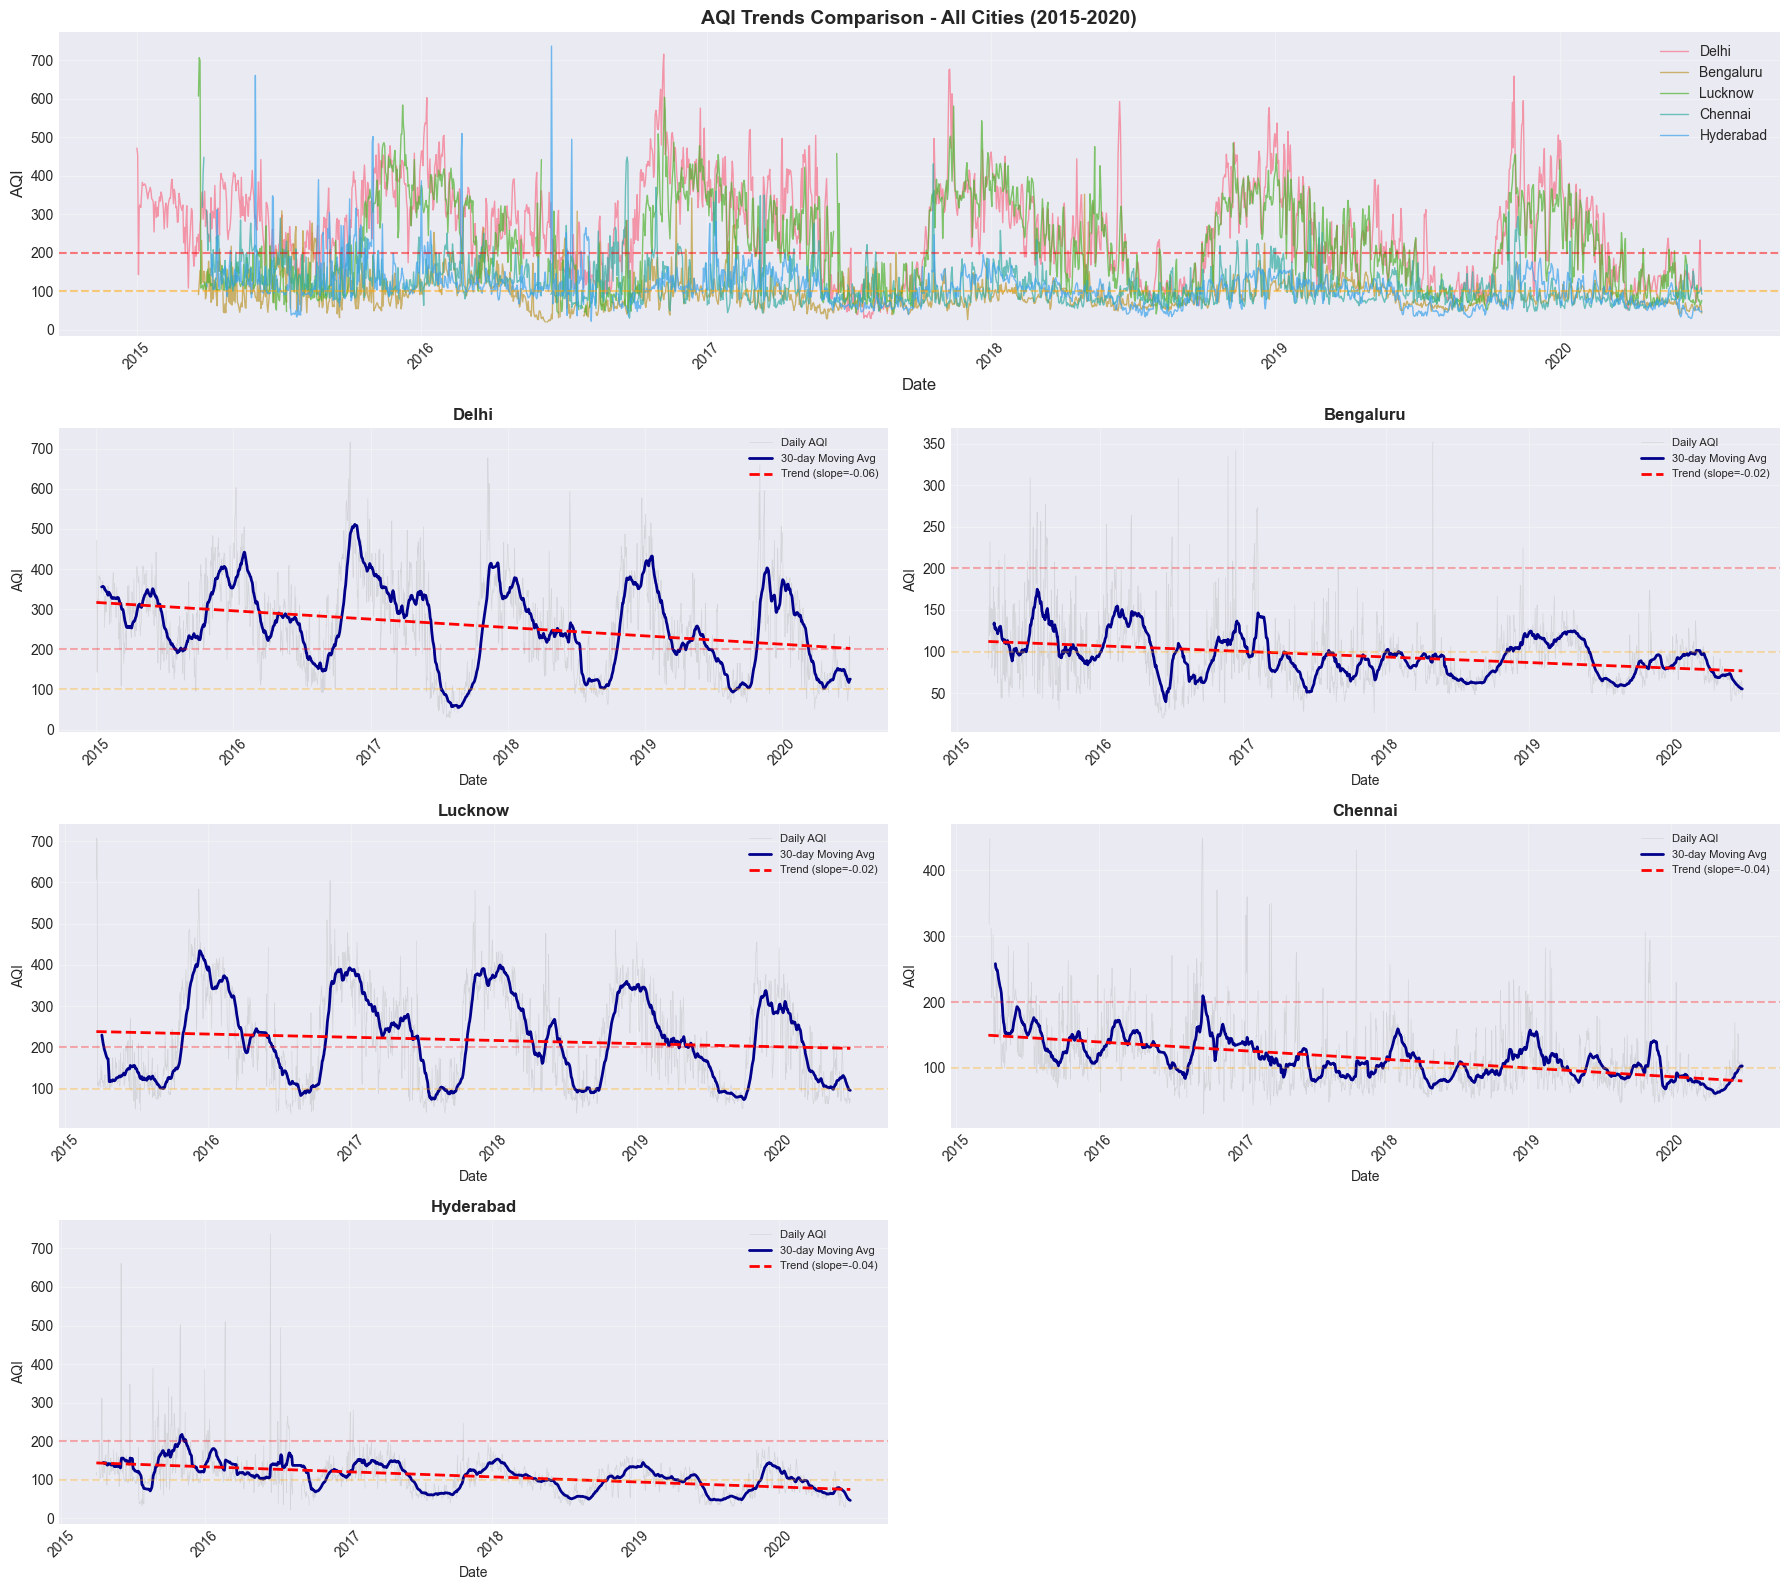


TREND ANALYSIS SUMMARY

Linear Trend Slopes (AQI change per day):
--------------------------------------------------------------------------------

Delhi:
  Daily slope: -0.0570 AQI/day
  Annual change: -20.81 AQI/year
  Total change (2015-2020): -114.48 AQI
  Trend: Improving ✓

Bengaluru:
  Daily slope: -0.0183 AQI/day
  Annual change: -6.69 AQI/year
  Total change (2015-2020): -35.38 AQI
  Trend: Improving ✓

Lucknow:
  Daily slope: -0.0211 AQI/day
  Annual change: -7.70 AQI/year
  Total change (2015-2020): -40.70 AQI
  Trend: Improving ✓

Chennai:
  Daily slope: -0.0361 AQI/day
  Annual change: -13.16 AQI/year
  Total change (2015-2020): -69.46 AQI
  Trend: Improving ✓

Hyderabad:
  Daily slope: -0.0359 AQI/day
  Annual change: -13.09 AQI/year
  Total change (2015-2020): -68.84 AQI
  Trend: Improving ✓


In [18]:
print("=" * 80)
print("5.1 TIME SERIES ANALYSIS - AQI TRENDS (2015-2020)")
print("=" * 80)

# Create figure with subplots - Use 4x2 grid for 1 combined + 5 individual plots
fig = plt.figure(figsize=(18, 16))

# Subplot 1: Overall comparison - All cities on same plot
ax1 = plt.subplot(4, 2, (1, 2))  # Span first 2 columns
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date')
    ax1.plot(city_data['Date'], city_data['AQI'], label=city, alpha=0.7, linewidth=1)

ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('AQI', fontsize=12)
ax1.set_title('AQI Trends Comparison - All Cities (2015-2020)', fontsize=14, fontweight='bold')
ax1.legend(loc='upper right', fontsize=10)
ax1.grid(alpha=0.3)
ax1.axhline(y=100, color='orange', linestyle='--', alpha=0.5, label='Moderate')
ax1.axhline(y=200, color='red', linestyle='--', alpha=0.5, label='Poor')
ax1.tick_params(axis='x', rotation=45)

# Subplots 2-6: Individual city trends with trend lines
for idx, city in enumerate(target_cities):
    ax = plt.subplot(4, 2, idx + 3)
    
    # Get city data
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date')
    city_data_clean = city_data.dropna(subset=['AQI'])
    
    # Plot raw data with reduced alpha
    ax.plot(city_data['Date'], city_data['AQI'], alpha=0.2, linewidth=0.5, color='gray', label='Daily AQI')
    
    # Calculate and plot 30-day moving average
    city_data_clean = city_data_clean.copy()
    city_data_clean['AQI_30MA'] = city_data_clean['AQI'].rolling(window=30, min_periods=15).mean()
    ax.plot(city_data_clean['Date'], city_data_clean['AQI_30MA'], 
            color='darkblue', linewidth=2, label='30-day Moving Avg')
    
    # Calculate linear trend line
    x_numeric = (city_data_clean['Date'] - city_data_clean['Date'].min()).dt.days
    z = np.polyfit(x_numeric, city_data_clean['AQI'], 1)
    p = np.poly1d(z)
    ax.plot(city_data_clean['Date'], p(x_numeric), 
            color='red', linestyle='--', linewidth=2, label=f'Trend (slope={z[0]:.2f})')
    
    # Formatting
    ax.set_xlabel('Date', fontsize=10)
    ax.set_ylabel('AQI', fontsize=10)
    ax.set_title(f'{city}', fontsize=12, fontweight='bold')
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(alpha=0.3)
    ax.axhline(y=100, color='orange', linestyle='--', alpha=0.3)
    ax.axhline(y=200, color='red', linestyle='--', alpha=0.3)
    
    # Rotate x-axis labels
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print trend statistics
print("\n" + "=" * 80)
print("TREND ANALYSIS SUMMARY")
print("=" * 80)
print("\nLinear Trend Slopes (AQI change per day):")
print("-" * 80)
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date').dropna(subset=['AQI'])
    x_numeric = (city_data['Date'] - city_data['Date'].min()).dt.days
    z = np.polyfit(x_numeric, city_data['AQI'], 1)
    
    # Calculate total change over period
    total_days = x_numeric.max()
    total_change = z[0] * total_days
    annual_change = z[0] * 365
    
    trend_direction = "Improving ✓" if z[0] < 0 else "Worsening ✗"
    
    print(f"\n{city}:")
    print(f"  Daily slope: {z[0]:.4f} AQI/day")
    print(f"  Annual change: {annual_change:.2f} AQI/year")
    print(f"  Total change (2015-2020): {total_change:.2f} AQI")
    print(f"  Trend: {trend_direction}")

### 5.2 Yearly Aggregation Analysis

Compare AQI levels year-over-year to identify long-term trends.

5.2 YEARLY AGGREGATION - YEAR-OVER-YEAR COMPARISON

Yearly AQI Statistics by City:
--------------------------------------------------------------------------------

Delhi:
 Year  Mean_AQI  Std_AQI  Count
 2015    297.02    81.85    365
 2016    301.37   123.14    365
 2017    256.73   137.69    356
 2018    249.16   114.28    365
 2019    232.10   117.60    365
 2020    181.67    90.61    183

Bengaluru:
 Year  Mean_AQI  Std_AQI  Count
 2015    112.57    50.60    286
 2016    105.58    51.95    351
 2017     87.12    37.61    364
 2018     86.31    28.62    361
 2019     91.60    27.04    365
 2020     79.72    19.48    183

Lucknow:
 Year  Mean_AQI  Std_AQI  Count
 2015    202.24   129.80    284
 2016    242.97   123.60    334
 2017    237.62   121.34    362
 2018    233.77   111.01    365
 2019    202.56   100.54    365
 2020    157.13    83.65    183

Chennai:
 Year  Mean_AQI  Std_AQI  Count
 2015    148.33    55.16    276
 2016    138.57    58.89    334
 2017    104.54    50.91    

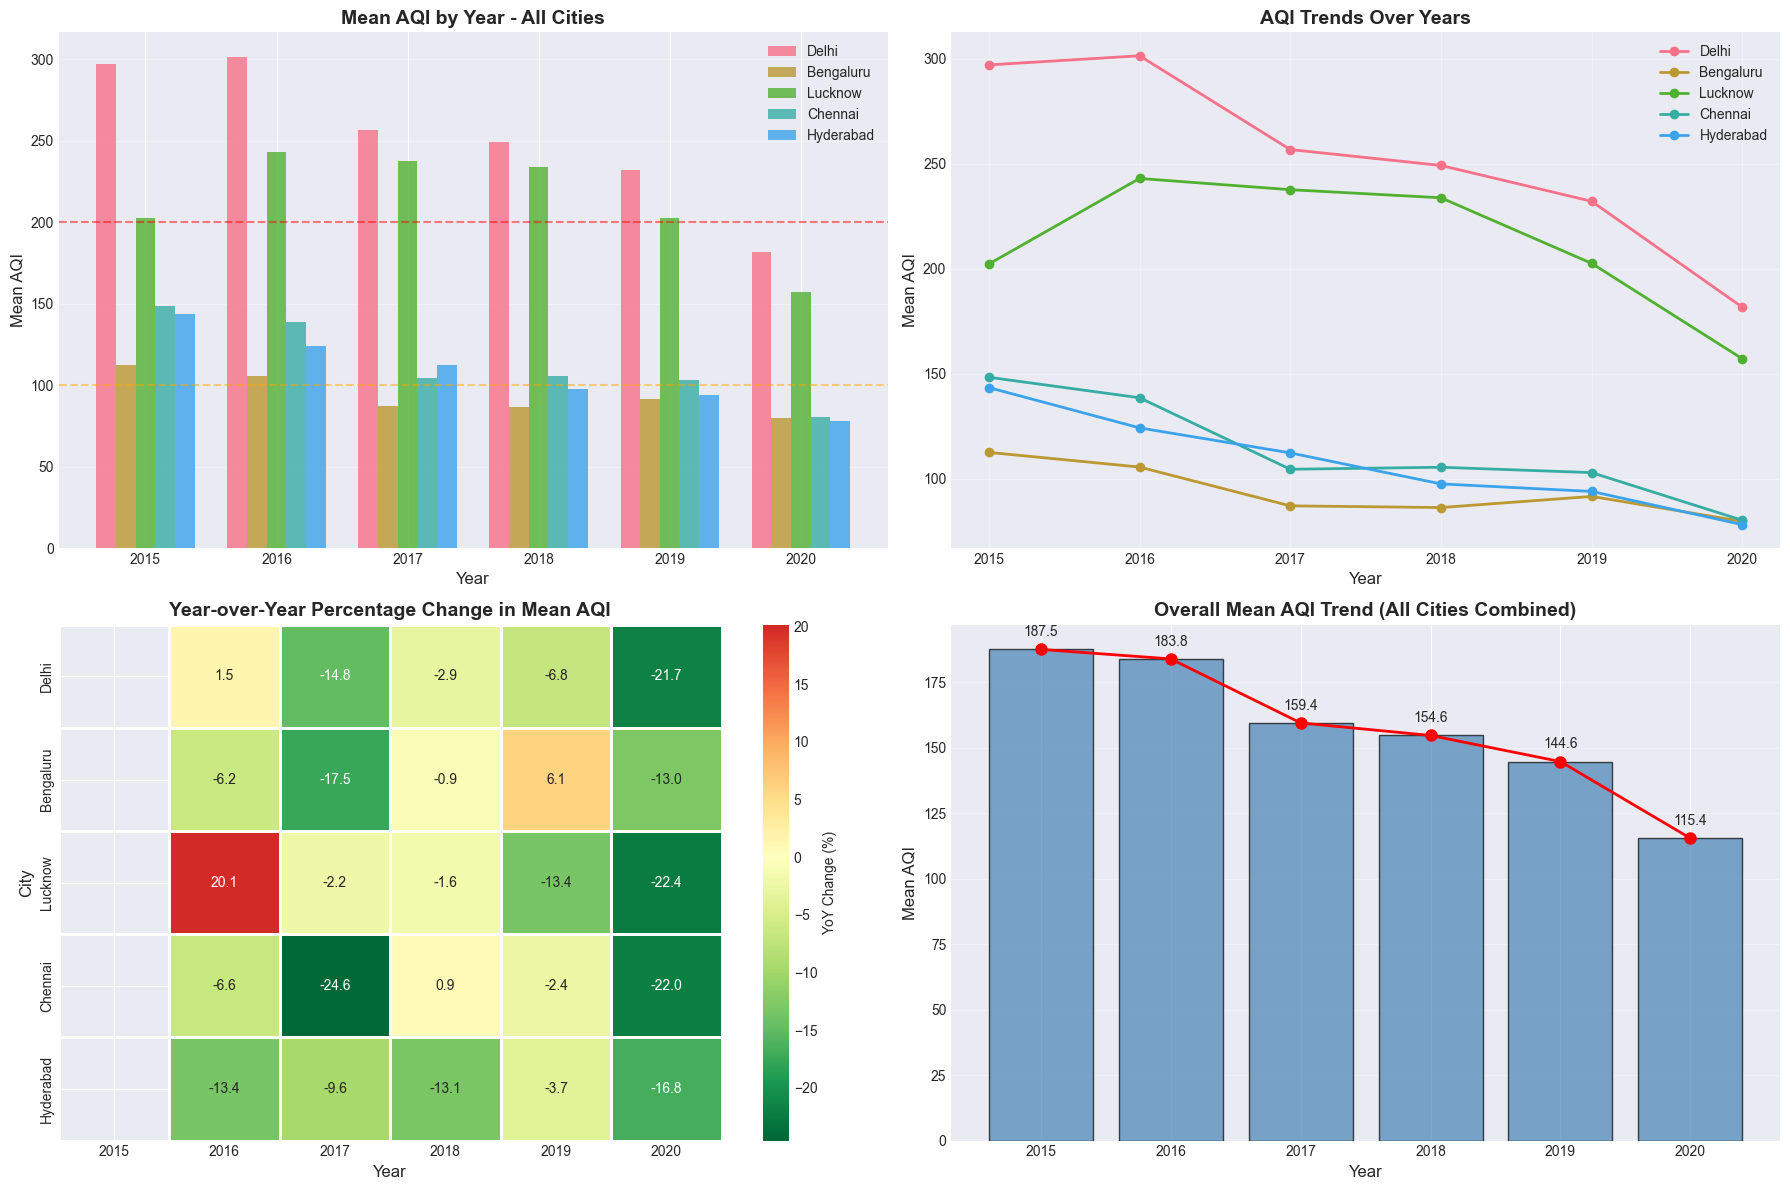


YEAR-OVER-YEAR CHANGE SUMMARY

Delhi:
  2015 Mean AQI: 297.02
  2020 Mean AQI: 181.67
  Total Change: -115.35 (-38.84%)
  Trend: Improving ✓

Bengaluru:
  2015 Mean AQI: 112.57
  2020 Mean AQI: 79.72
  Total Change: -32.85 (-29.18%)
  Trend: Improving ✓

Lucknow:
  2015 Mean AQI: 202.24
  2020 Mean AQI: 157.13
  Total Change: -45.11 (-22.31%)
  Trend: Improving ✓

Chennai:
  2015 Mean AQI: 148.33
  2020 Mean AQI: 80.25
  Total Change: -68.08 (-45.90%)
  Trend: Improving ✓

Hyderabad:
  2015 Mean AQI: 143.42
  2020 Mean AQI: 78.17
  Total Change: -65.25 (-45.50%)
  Trend: Improving ✓


In [19]:
# ============================================================================
# 5.2 YEARLY AGGREGATION ANALYSIS
# ============================================================================

print("=" * 80)
print("5.2 YEARLY AGGREGATION - YEAR-OVER-YEAR COMPARISON")
print("=" * 80)

# Extract year from Date
df_filtered['Year'] = df_filtered['Date'].dt.year

# Calculate mean AQI per year per city
yearly_aqi = df_filtered.groupby(['City', 'Year'])['AQI'].agg(['mean', 'std', 'count']).reset_index()
yearly_aqi.columns = ['City', 'Year', 'Mean_AQI', 'Std_AQI', 'Count']
yearly_aqi['Mean_AQI'] = yearly_aqi['Mean_AQI'].round(2)
yearly_aqi['Std_AQI'] = yearly_aqi['Std_AQI'].round(2)

# Print yearly statistics
print("\nYearly AQI Statistics by City:")
print("-" * 80)
for city in target_cities:
    city_yearly = yearly_aqi[yearly_aqi['City'] == city]
    print(f"\n{city}:")
    print(city_yearly[['Year', 'Mean_AQI', 'Std_AQI', 'Count']].to_string(index=False))

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# Subplot 1: Grouped bar chart - All cities
ax1 = axes[0, 0]
years = sorted(df_filtered['Year'].unique())
x = np.arange(len(years))
width = 0.15

for idx, city in enumerate(target_cities):
    city_yearly = yearly_aqi[yearly_aqi['City'] == city]
    means = [city_yearly[city_yearly['Year'] == year]['Mean_AQI'].values[0] 
             if len(city_yearly[city_yearly['Year'] == year]) > 0 else 0 
             for year in years]
    ax1.bar(x + idx * width, means, width, label=city, alpha=0.8)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Mean AQI', fontsize=12)
ax1.set_title('Mean AQI by Year - All Cities', fontsize=14, fontweight='bold')
ax1.set_xticks(x + width * 2)
ax1.set_xticklabels(years)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.axhline(y=100, color='orange', linestyle='--', alpha=0.5)
ax1.axhline(y=200, color='red', linestyle='--', alpha=0.5)

# Subplot 2: Line plot - Trends over years
ax2 = axes[0, 1]
for city in target_cities:
    city_yearly = yearly_aqi[yearly_aqi['City'] == city]
    ax2.plot(city_yearly['Year'], city_yearly['Mean_AQI'], marker='o', label=city, linewidth=2)

ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Mean AQI', fontsize=12)
ax2.set_title('AQI Trends Over Years', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)
ax2.set_xticks(years)

# Subplot 3: Year-over-year percentage change heatmap
ax3 = axes[1, 0]
pivot_data = yearly_aqi.pivot(index='City', columns='Year', values='Mean_AQI')
pivot_data = pivot_data.reindex(target_cities)

# Calculate year-over-year percentage change
yoy_change = pivot_data.pct_change(axis=1) * 100
sns.heatmap(yoy_change, annot=True, fmt='.1f', cmap='RdYlGn_r', center=0, 
            cbar_kws={'label': 'YoY Change (%)'}, ax=ax3, linewidths=1)
ax3.set_title('Year-over-Year Percentage Change in Mean AQI', fontsize=14, fontweight='bold')
ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('City', fontsize=12)

# Subplot 4: Overall trend (all cities combined)
ax4 = axes[1, 1]
overall_yearly = df_filtered.groupby('Year')['AQI'].mean()
ax4.bar(overall_yearly.index, overall_yearly.values, color='steelblue', alpha=0.7, edgecolor='black')
ax4.plot(overall_yearly.index, overall_yearly.values, color='red', marker='o', linewidth=2, markersize=8)
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Mean AQI', fontsize=12)
ax4.set_title('Overall Mean AQI Trend (All Cities Combined)', fontsize=14, fontweight='bold')
ax4.grid(axis='y', alpha=0.3)
ax4.set_xticks(years)
for year, value in zip(overall_yearly.index, overall_yearly.values):
    ax4.text(year, value + 5, f'{value:.1f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n" + "=" * 80)
print("YEAR-OVER-YEAR CHANGE SUMMARY")
print("=" * 80)

for city in target_cities:
    city_yearly = yearly_aqi[yearly_aqi['City'] == city].sort_values('Year')
    if len(city_yearly) > 1:
        first_year_aqi = city_yearly.iloc[0]['Mean_AQI']
        last_year_aqi = city_yearly.iloc[-1]['Mean_AQI']
        total_change = last_year_aqi - first_year_aqi
        pct_change = (total_change / first_year_aqi) * 100
        
        print(f"\n{city}:")
        print(f"  2015 Mean AQI: {first_year_aqi:.2f}")
        print(f"  2020 Mean AQI: {last_year_aqi:.2f}")
        print(f"  Total Change: {total_change:+.2f} ({pct_change:+.2f}%)")
        print(f"  Trend: {'Improving ✓' if total_change < 0 else 'Worsening ✗'}")

### 5.3 Monthly Patterns (Seasonality Analysis)

Identify seasonal trends and determine which months have the worst/best air quality.

5.3 MONTHLY PATTERNS - SEASONALITY ANALYSIS


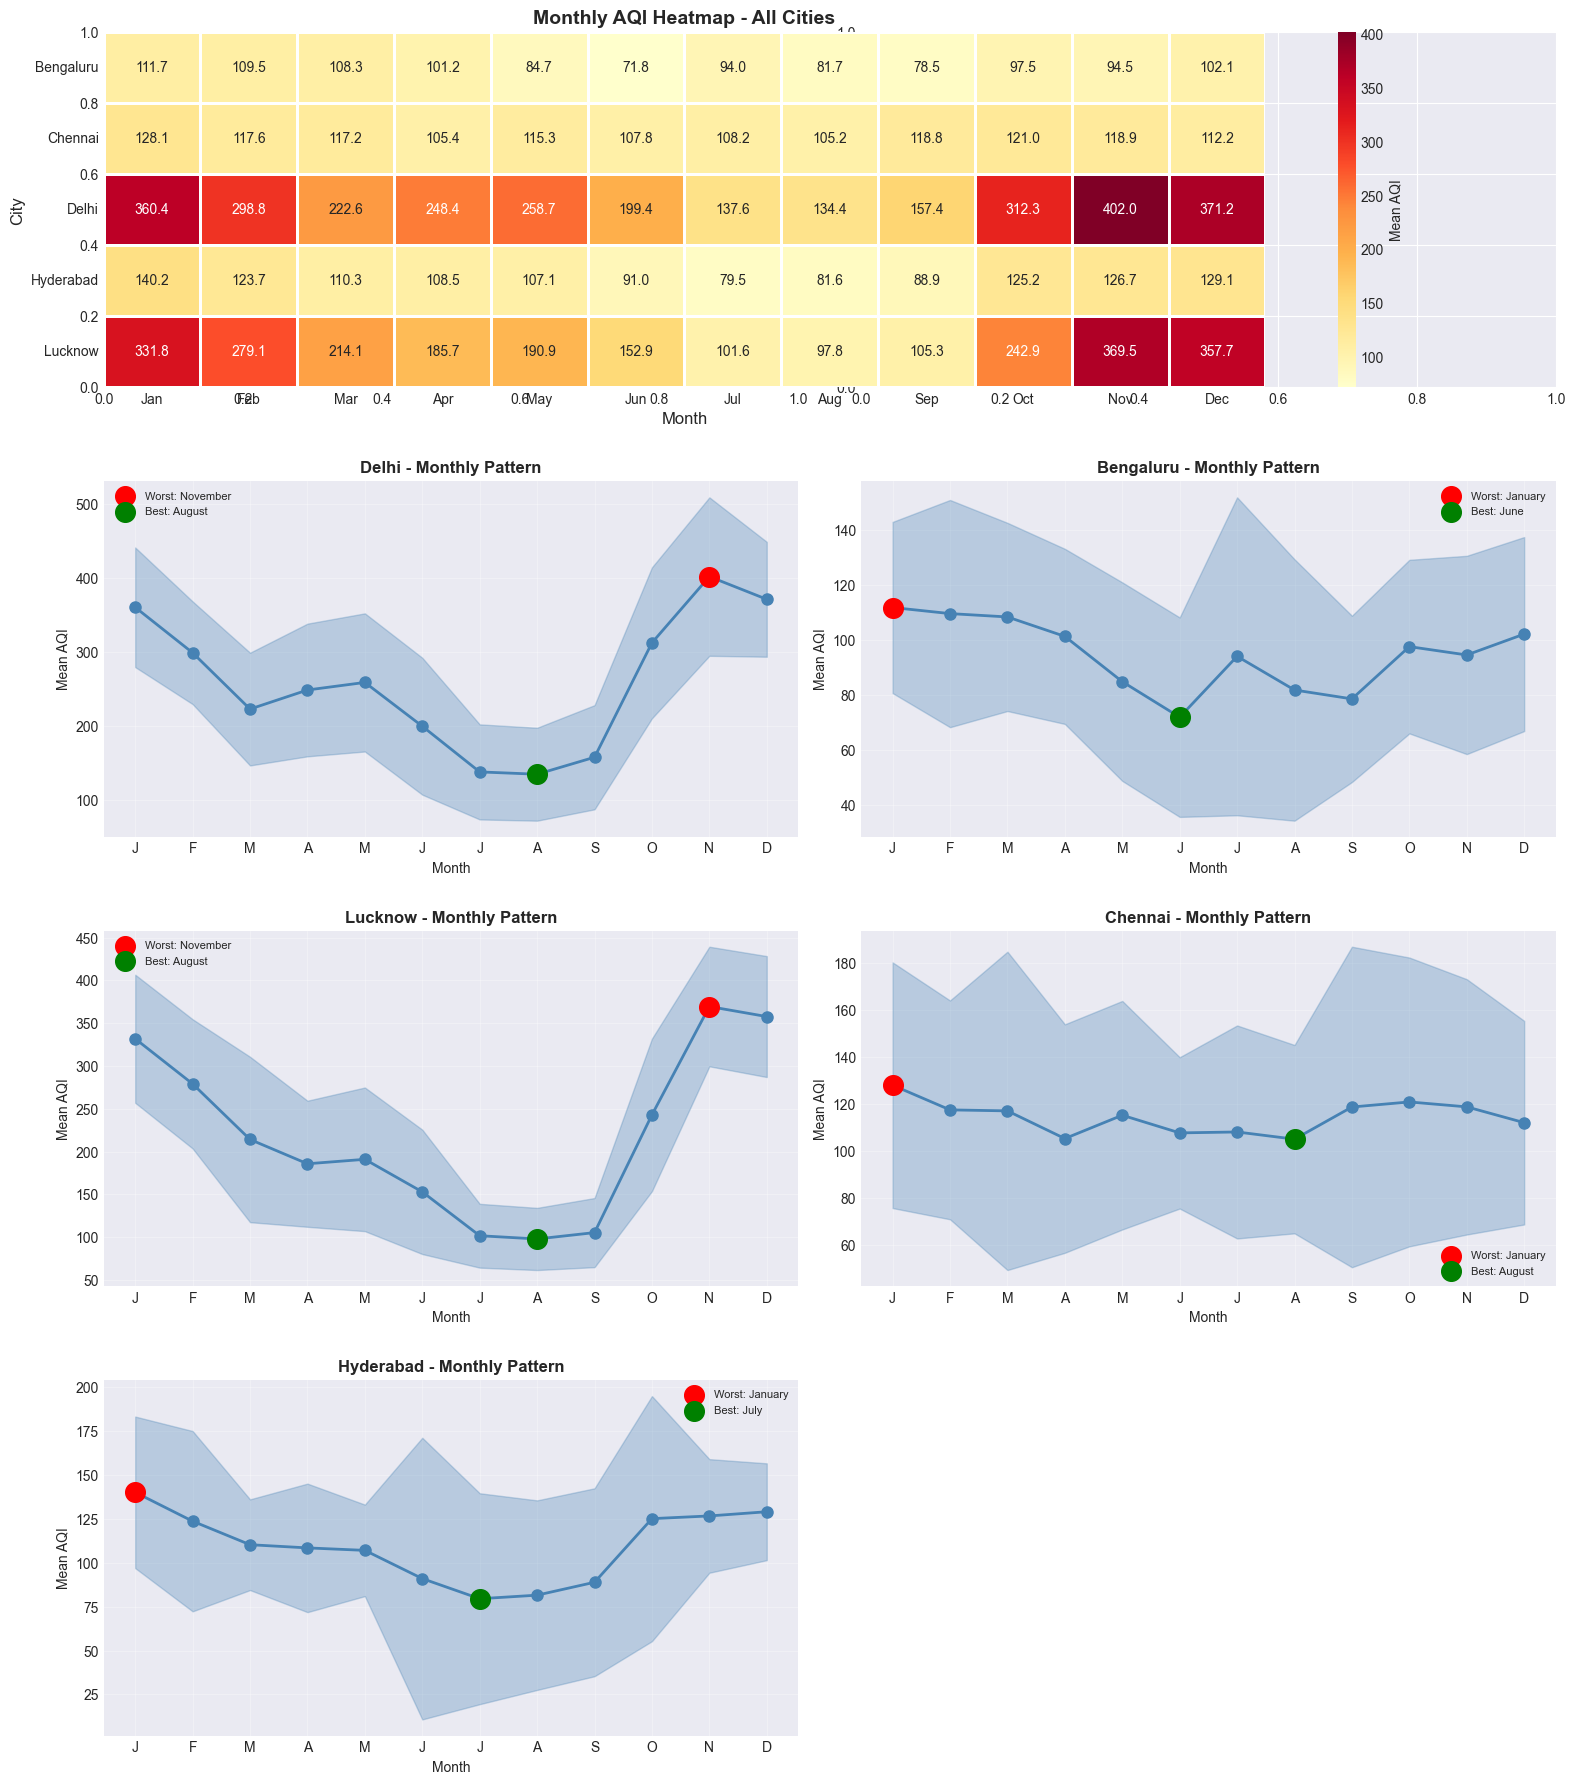


MONTHLY AQI SUMMARY

Delhi:
  Worst Month: November (AQI: 401.95)
  Best Month:  August (AQI: 134.44)
  Range:       267.51 AQI points

Bengaluru:
  Worst Month: January (AQI: 111.73)
  Best Month:  June (AQI: 71.80)
  Range:       39.93 AQI points

Lucknow:
  Worst Month: November (AQI: 369.50)
  Best Month:  August (AQI: 97.81)
  Range:       271.69 AQI points

Chennai:
  Worst Month: January (AQI: 128.10)
  Best Month:  August (AQI: 105.16)
  Range:       22.94 AQI points

Hyderabad:
  Worst Month: January (AQI: 140.18)
  Best Month:  July (AQI: 79.53)
  Range:       60.66 AQI points

OVERALL SEASONAL PATTERN (All Cities Combined)

Mean AQI by Season:
  Winter         : 209.51
  Post-Monsoon   : 201.14
  Spring         : 153.51
  Summer         : 137.90
  Monsoon        : 104.89

STATISTICAL TEST: ANOVA for Monthly Differences
Delhi          : F-statistic=190.49, p-value=0.0000 → Significant ✓
Bengaluru      : F-statistic=18.87, p-value=0.0000 → Significant ✓
Lucknow        : F-sta

In [20]:
print("=" * 80)
print("5.3 MONTHLY PATTERNS - SEASONALITY ANALYSIS")
print("=" * 80)

# Extract month information
df_filtered['Month'] = df_filtered['Date'].dt.month
df_filtered['Month_Name'] = df_filtered['Date'].dt.month_name()

# Calculate monthly statistics
monthly_aqi = df_filtered.groupby(['City', 'Month', 'Month_Name'])['AQI'].agg([
    ('Mean_AQI', 'mean'),
    ('Std_AQI', 'std'),
    ('Count', 'count')
]).reset_index()

# Create visualizations - Use 4x2 grid to accommodate 1 overall + 5 individual plots
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

# Subplot 1: Overall comparison - All cities heatmap (span first row)
ax_combined = plt.subplot(4, 2, (1, 2))
pivot_data = monthly_aqi.pivot(index='City', columns='Month', values='Mean_AQI')
sns.heatmap(pivot_data, annot=True, fmt='.1f', cmap='YlOrRd', cbar_kws={'label': 'Mean AQI'}, 
            ax=ax_combined, linewidths=1)
ax_combined.set_title('Monthly AQI Heatmap - All Cities', fontsize=14, fontweight='bold')
ax_combined.set_xlabel('Month', fontsize=12)
ax_combined.set_ylabel('City', fontsize=12)
ax_combined.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                             'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Subplots 3-7: Individual city monthly patterns with error bars
for idx, city in enumerate(target_cities):
    row = (idx // 2) + 1  # Start from row 1 (0-indexed), row 0 is for combined plot
    col = idx % 2
    ax = axes[row, col]
    
    city_monthly = monthly_aqi[monthly_aqi['City'] == city].sort_values('Month')
    ax.plot(city_monthly['Month'], city_monthly['Mean_AQI'], marker='o', 
            color='steelblue', linewidth=2, markersize=8)
    ax.fill_between(city_monthly['Month'], 
                     city_monthly['Mean_AQI'] - city_monthly['Std_AQI'],
                     city_monthly['Mean_AQI'] + city_monthly['Std_AQI'],
                     alpha=0.3, color='steelblue')
    
    # Highlight worst and best months
    worst_month = city_monthly.loc[city_monthly['Mean_AQI'].idxmax()]
    best_month = city_monthly.loc[city_monthly['Mean_AQI'].idxmin()]
    ax.scatter(worst_month['Month'], worst_month['Mean_AQI'], 
               color='red', s=200, zorder=5, label=f"Worst: {worst_month['Month_Name']}")
    ax.scatter(best_month['Month'], best_month['Mean_AQI'], 
               color='green', s=200, zorder=5, label=f"Best: {best_month['Month_Name']}")
    
    ax.set_xlabel('Month', fontsize=10)
    ax.set_ylabel('Mean AQI', fontsize=10)
    ax.set_title(f'{city} - Monthly Pattern', fontsize=12, fontweight='bold')
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
    ax.legend(fontsize=8)
    ax.grid(alpha=0.3)

# Remove extra subplot (last one if odd number of cities)
if len(target_cities) == 5:
    fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()

# Print monthly statistics
print("\n" + "=" * 80)
print("MONTHLY AQI SUMMARY")
print("=" * 80)

for city in target_cities:
    city_monthly = monthly_aqi[monthly_aqi['City'] == city].sort_values('Month')
    worst_month = city_monthly.loc[city_monthly['Mean_AQI'].idxmax()]
    best_month = city_monthly.loc[city_monthly['Mean_AQI'].idxmin()]
    
    print(f"\n{city}:")
    print(f"  Worst Month: {worst_month['Month_Name']} (AQI: {worst_month['Mean_AQI']:.2f})")
    print(f"  Best Month:  {best_month['Month_Name']} (AQI: {best_month['Mean_AQI']:.2f})")
    print(f"  Range:       {worst_month['Mean_AQI'] - best_month['Mean_AQI']:.2f} AQI points")

# Overall seasonal pattern
print("\n" + "=" * 80)
print("OVERALL SEASONAL PATTERN (All Cities Combined)")
print("=" * 80)
overall_monthly = df_filtered.groupby('Month')['AQI'].mean().sort_index()
season_map = {1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Summer', 6: 'Summer',
              7: 'Monsoon', 8: 'Monsoon', 9: 'Monsoon', 10: 'Post-Monsoon', 
              11: 'Post-Monsoon', 12: 'Winter'}
df_filtered['Season'] = df_filtered['Month'].map(season_map)
seasonal_aqi = df_filtered.groupby('Season')['AQI'].mean().sort_values(ascending=False)
print("\nMean AQI by Season:")
for season, aqi in seasonal_aqi.items():
    print(f"  {season:15s}: {aqi:.2f}")

# Statistical test for seasonal differences
from scipy.stats import f_oneway
print("\n" + "=" * 80)
print("STATISTICAL TEST: ANOVA for Monthly Differences")
print("=" * 80)
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    monthly_groups = [city_data[city_data['Month'] == month]['AQI'].dropna() for month in range(1, 13)]
    # Filter out empty groups
    monthly_groups = [g for g in monthly_groups if len(g) > 0]
    if len(monthly_groups) > 1:
        f_stat, p_value = f_oneway(*monthly_groups)
        significance = "Significant ✓" if p_value < 0.05 else "Not Significant"
        print(f"{city:15s}: F-statistic={f_stat:.2f}, p-value={p_value:.4f} → {significance}")

### 5.4 Day-of-Week Patterns

Analyze differences between weekdays and weekends.

5.4 DAY-OF-WEEK PATTERNS - WEEKDAY VS WEEKEND ANALYSIS


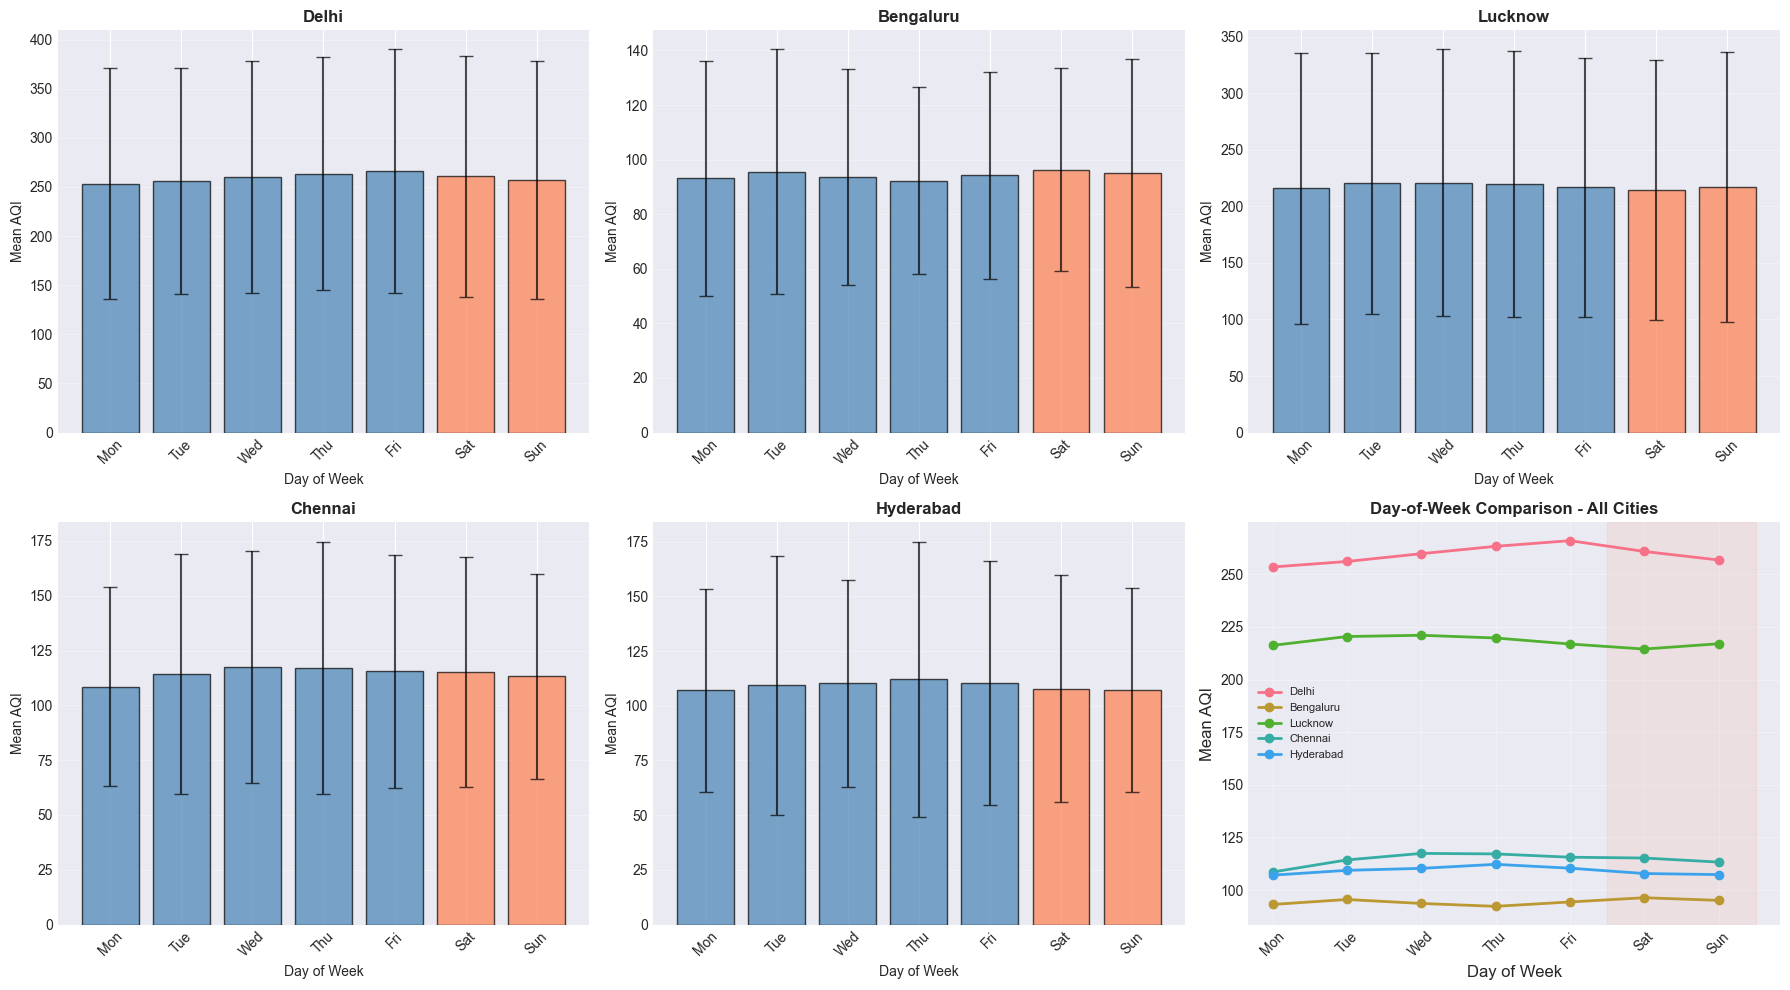


WEEKDAY VS WEEKEND COMPARISON

Mean AQI by Weekday/Weekend:
Weekend    Weekday  Weekend  Difference  %_Difference
City                                                 
Bengaluru    93.76    95.71        1.95          2.08
Chennai     114.61   114.23       -0.38         -0.33
Delhi       259.74   258.84       -0.90         -0.35
Hyderabad   109.86   107.57       -2.28         -2.08
Lucknow     218.87   215.76       -3.11         -1.42


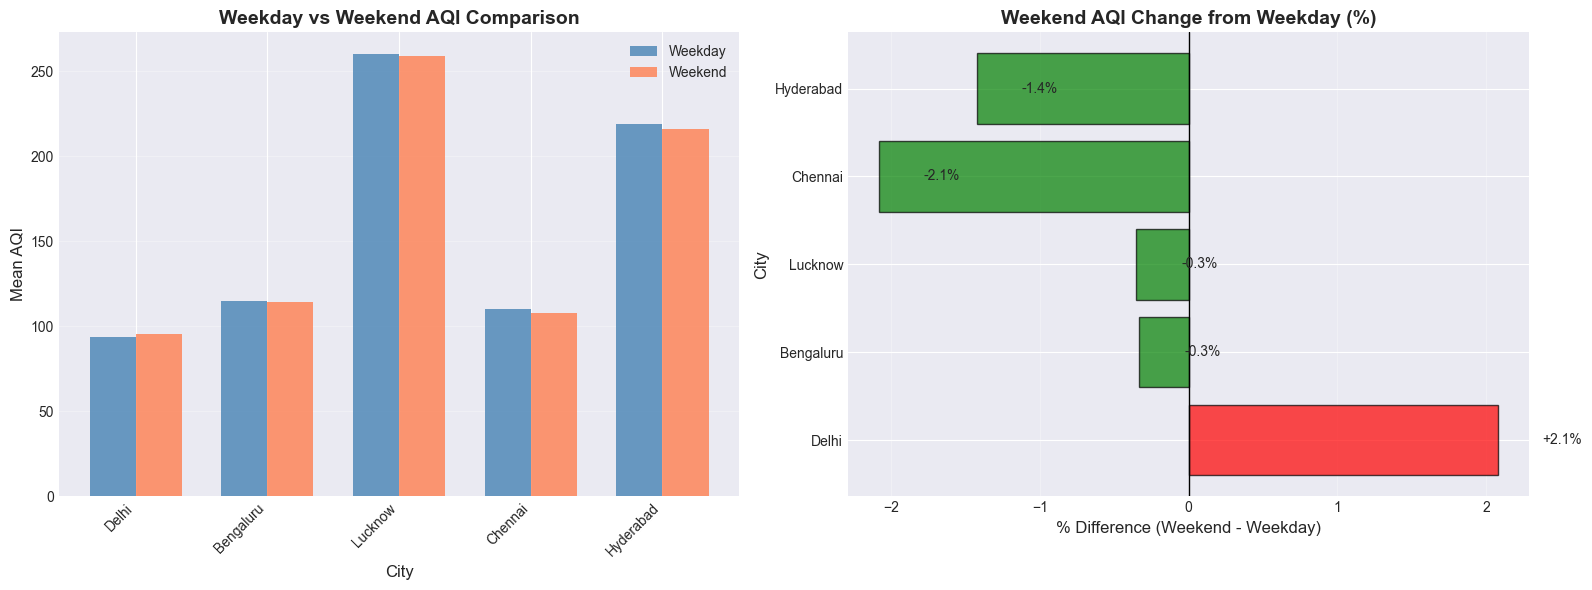


STATISTICAL TEST: T-Test for Weekday vs Weekend Difference

Delhi:
  Weekday Mean AQI: 259.74
  Weekend Mean AQI: 258.84
  T-statistic: 0.15, p-value: 0.8792
  Result: Not Significant (Weekday AQI is higher than Weekend)

Bengaluru:
  Weekday Mean AQI: 93.76
  Weekend Mean AQI: 95.71
  T-statistic: -0.96, p-value: 0.3352
  Result: Not Significant (Weekday AQI is lower than Weekend)

Lucknow:
  Weekday Mean AQI: 218.87
  Weekend Mean AQI: 215.76
  T-statistic: 0.52, p-value: 0.6009
  Result: Not Significant (Weekday AQI is higher than Weekend)

Chennai:
  Weekday Mean AQI: 114.61
  Weekend Mean AQI: 114.23
  T-statistic: 0.14, p-value: 0.8867
  Result: Not Significant (Weekday AQI is higher than Weekend)

Hyderabad:
  Weekday Mean AQI: 109.86
  Weekend Mean AQI: 107.57
  T-statistic: 0.84, p-value: 0.4003
  Result: Not Significant (Weekday AQI is higher than Weekend)


In [21]:
# ============================================================================
# 5.4 DAY-OF-WEEK PATTERNS
# ============================================================================

print("=" * 80)
print("5.4 DAY-OF-WEEK PATTERNS - WEEKDAY VS WEEKEND ANALYSIS")
print("=" * 80)

# Extract day of week (0=Monday, 6=Sunday)
df_filtered['DayOfWeek'] = df_filtered['Date'].dt.dayofweek
df_filtered['DayOfWeek_Name'] = df_filtered['Date'].dt.day_name()
df_filtered['Weekend'] = df_filtered['DayOfWeek'].apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Calculate mean AQI per day of week per city
dow_aqi = df_filtered.groupby(['City', 'DayOfWeek', 'DayOfWeek_Name'])['AQI'].agg(['mean', 'std', 'count']).reset_index()
dow_aqi.columns = ['City', 'DayOfWeek', 'DayOfWeek_Name', 'Mean_AQI', 'Std_AQI', 'Count']
dow_aqi['Mean_AQI'] = dow_aqi['Mean_AQI'].round(2)
dow_aqi['Std_AQI'] = dow_aqi['Std_AQI'].round(2)

# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Subplots 1-5: Individual city day-of-week patterns
for idx, city in enumerate(target_cities):
    ax = axes[idx]
    city_dow = dow_aqi[dow_aqi['City'] == city].sort_values('DayOfWeek')
    
    colors = ['steelblue'] * 5 + ['coral'] * 2  # Weekdays blue, weekends coral
    ax.bar(city_dow['DayOfWeek'], city_dow['Mean_AQI'], color=colors, alpha=0.7, edgecolor='black')
    ax.errorbar(city_dow['DayOfWeek'], city_dow['Mean_AQI'], yerr=city_dow['Std_AQI'],
                fmt='none', ecolor='black', capsize=5, alpha=0.7)
    
    ax.set_xlabel('Day of Week', fontsize=10)
    ax.set_ylabel('Mean AQI', fontsize=10)
    ax.set_title(f'{city}', fontsize=12, fontweight='bold')
    ax.set_xticks(range(7))
    ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
    ax.grid(axis='y', alpha=0.3)

# Subplot 6: Overall comparison
ax = axes[5]
for city in target_cities:
    city_dow = dow_aqi[dow_aqi['City'] == city].sort_values('DayOfWeek')
    ax.plot(city_dow['DayOfWeek'], city_dow['Mean_AQI'], marker='o', label=city, linewidth=2)

ax.set_xlabel('Day of Week', fontsize=12)
ax.set_ylabel('Mean AQI', fontsize=12)
ax.set_title('Day-of-Week Comparison - All Cities', fontsize=12, fontweight='bold')
ax.set_xticks(range(7))
ax.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
ax.legend(fontsize=8)
ax.grid(alpha=0.3)
ax.axvspan(4.5, 6.5, alpha=0.1, color='coral', label='Weekend')

plt.tight_layout()
plt.show()

# Weekday vs Weekend comparison
print("\n" + "=" * 80)
print("WEEKDAY VS WEEKEND COMPARISON")
print("=" * 80)

weekend_comparison = df_filtered.groupby(['City', 'Weekend'])['AQI'].mean().unstack()
weekend_comparison['Difference'] = weekend_comparison['Weekend'] - weekend_comparison['Weekday']
weekend_comparison['%_Difference'] = (weekend_comparison['Difference'] / weekend_comparison['Weekday'] * 100).round(2)

print("\nMean AQI by Weekday/Weekend:")
print(weekend_comparison.round(2))

# Visualization: Weekday vs Weekend
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chart 1: Grouped bar chart
ax1 = axes[0]
x = np.arange(len(target_cities))
width = 0.35
ax1.bar(x - width/2, weekend_comparison['Weekday'], width, label='Weekday', color='steelblue', alpha=0.8)
ax1.bar(x + width/2, weekend_comparison['Weekend'], width, label='Weekend', color='coral', alpha=0.8)
ax1.set_xlabel('City', fontsize=12)
ax1.set_ylabel('Mean AQI', fontsize=12)
ax1.set_title('Weekday vs Weekend AQI Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(target_cities, rotation=45, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Chart 2: Percentage difference
ax2 = axes[1]
colors = ['green' if x < 0 else 'red' for x in weekend_comparison['%_Difference']]
ax2.barh(target_cities, weekend_comparison['%_Difference'], color=colors, alpha=0.7, edgecolor='black')
ax2.axvline(x=0, color='black', linewidth=1)
ax2.set_xlabel('% Difference (Weekend - Weekday)', fontsize=12)
ax2.set_ylabel('City', fontsize=12)
ax2.set_title('Weekend AQI Change from Weekday (%)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, (city, value) in enumerate(zip(target_cities, weekend_comparison['%_Difference'])):
    ax2.text(value + 0.3, i, f'{value:+.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# Statistical test: Weekday vs Weekend
from scipy.stats import ttest_ind
print("\n" + "=" * 80)
print("STATISTICAL TEST: T-Test for Weekday vs Weekend Difference")
print("=" * 80)

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    weekday_aqi = city_data[city_data['Weekend'] == 'Weekday']['AQI'].dropna()
    weekend_aqi = city_data[city_data['Weekend'] == 'Weekend']['AQI'].dropna()
    
    if len(weekday_aqi) > 0 and len(weekend_aqi) > 0:
        t_stat, p_value = ttest_ind(weekday_aqi, weekend_aqi)
        significance = "Significant ✓" if p_value < 0.05 else "Not Significant"
        direction = "higher" if weekday_aqi.mean() > weekend_aqi.mean() else "lower"
        
        print(f"\n{city}:")
        print(f"  Weekday Mean AQI: {weekday_aqi.mean():.2f}")
        print(f"  Weekend Mean AQI: {weekend_aqi.mean():.2f}")
        print(f"  T-statistic: {t_stat:.2f}, p-value: {p_value:.4f}")
        print(f"  Result: {significance} (Weekday AQI is {direction} than Weekend)")

### 5.5 Rolling Averages & Trend Analysis

Smooth out noise using rolling averages to identify long-term trends.

5.5 ROLLING AVERAGES - SMOOTHING TRENDS


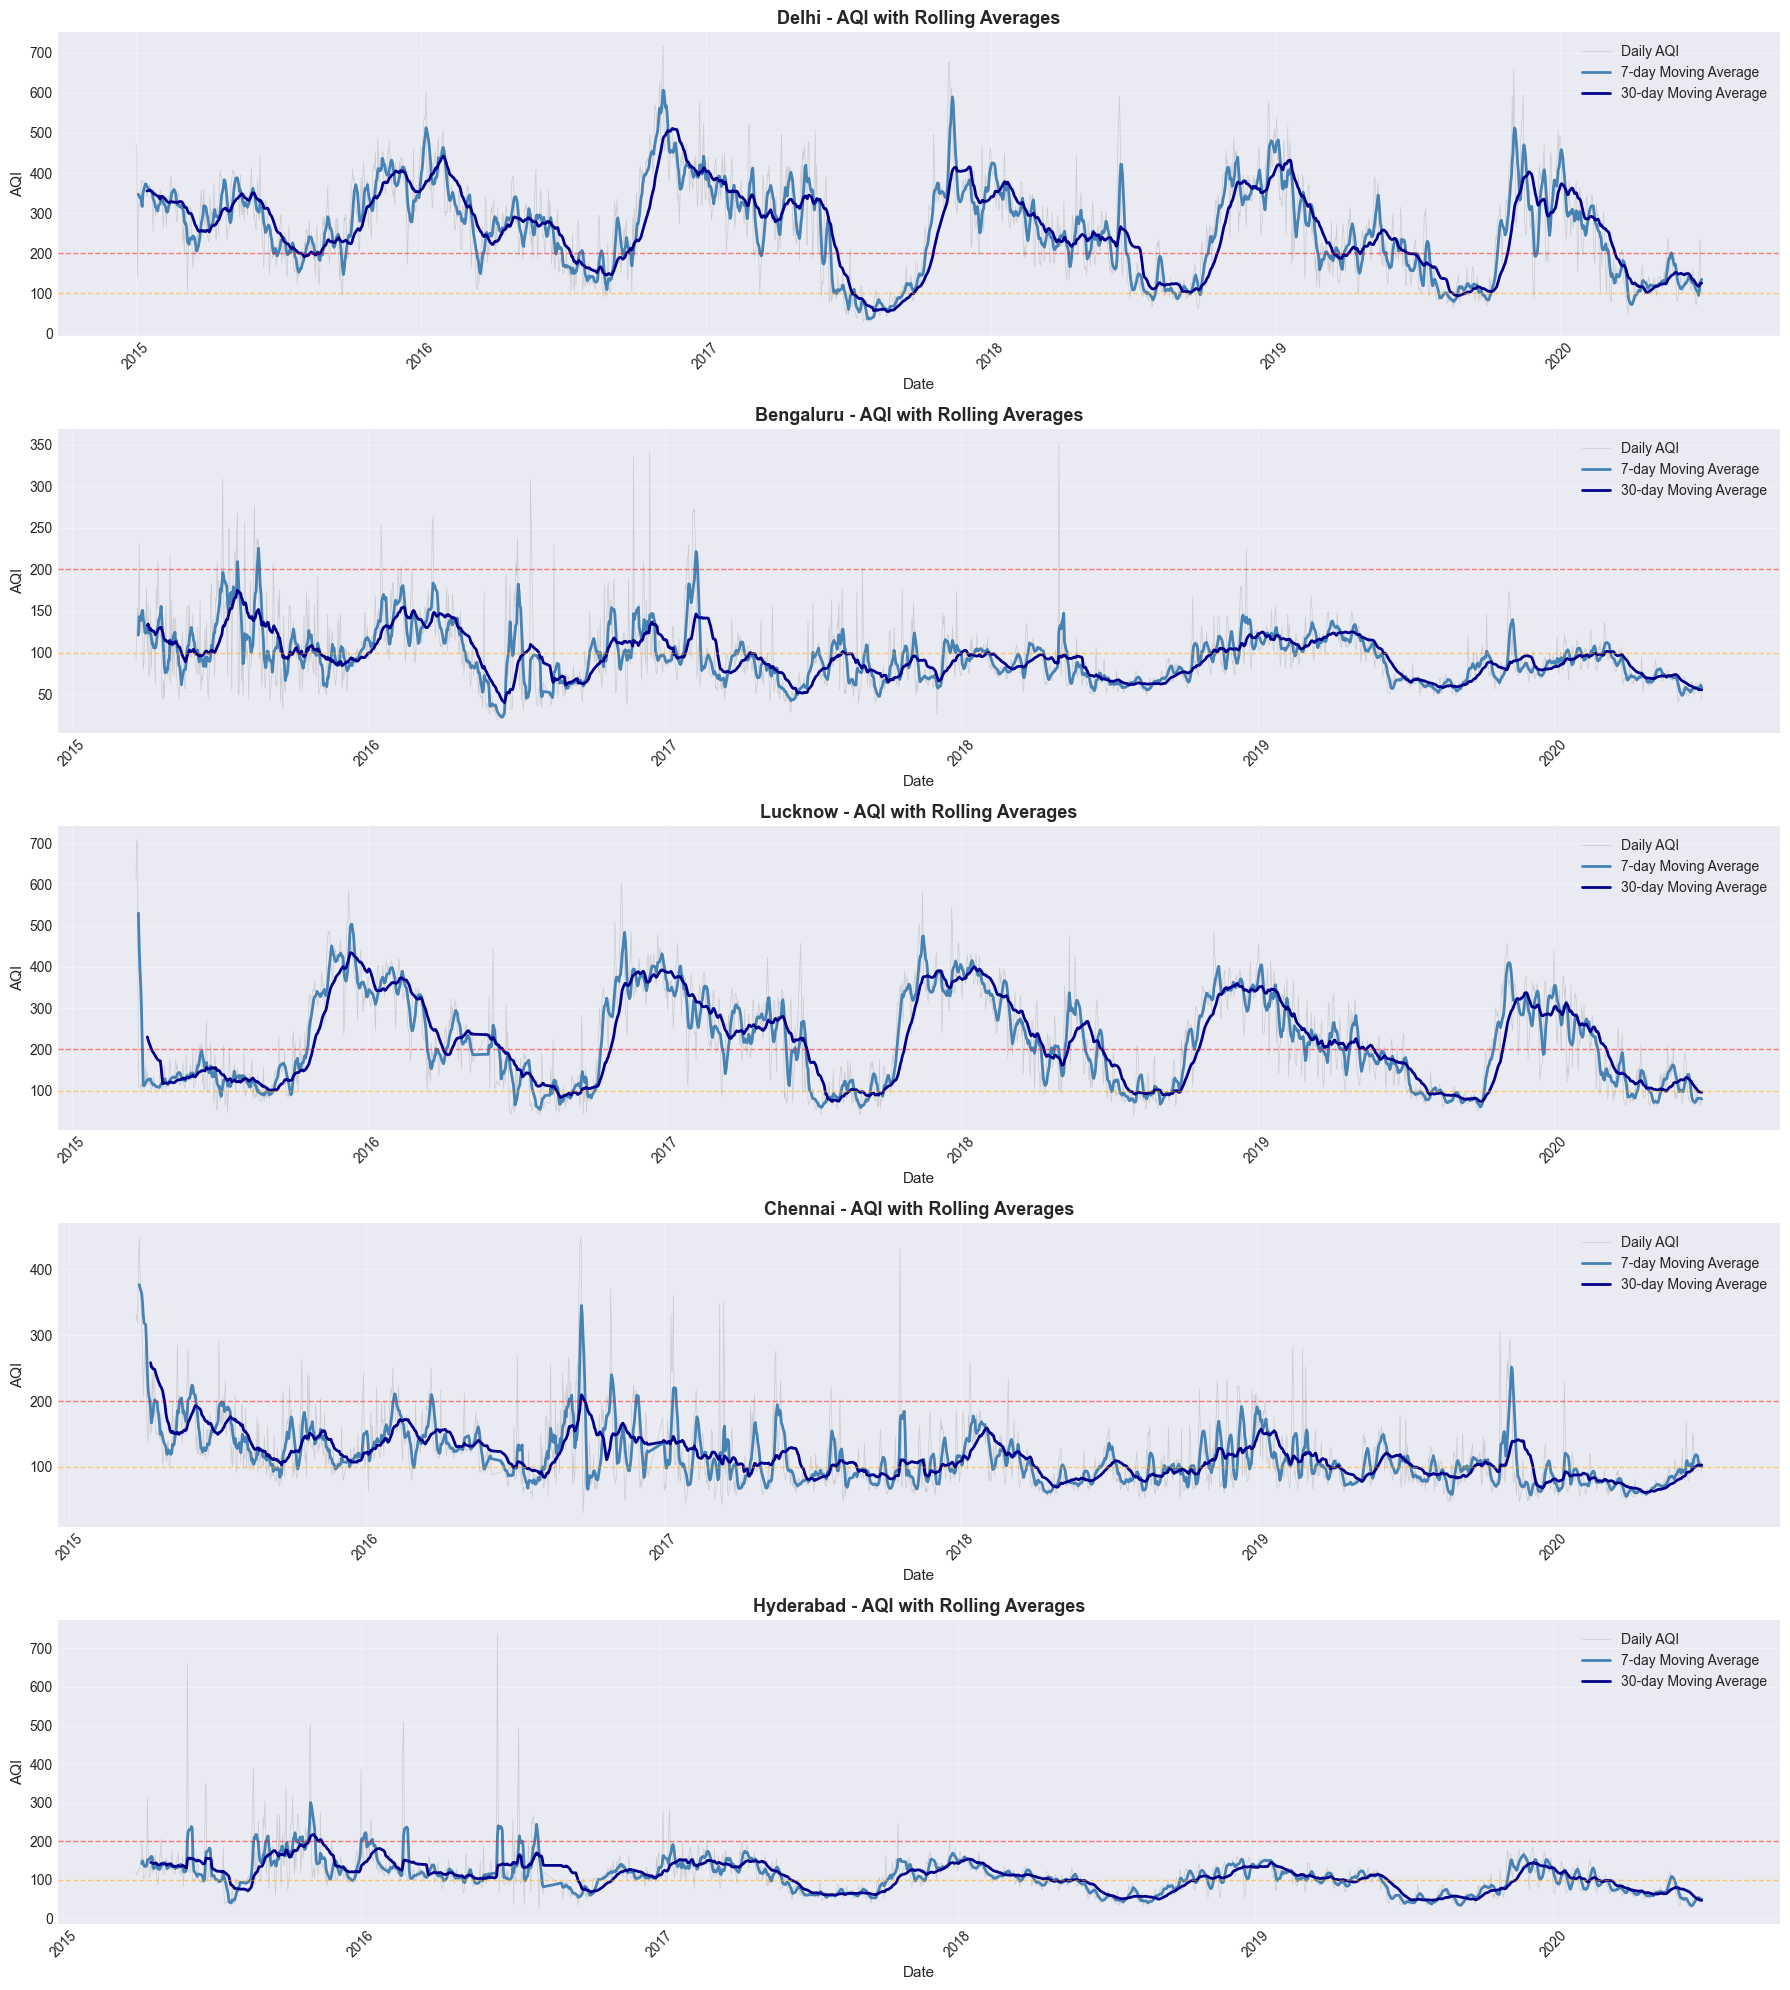


SMOOTHED TREND COMPARISON - 30-DAY MOVING AVERAGE


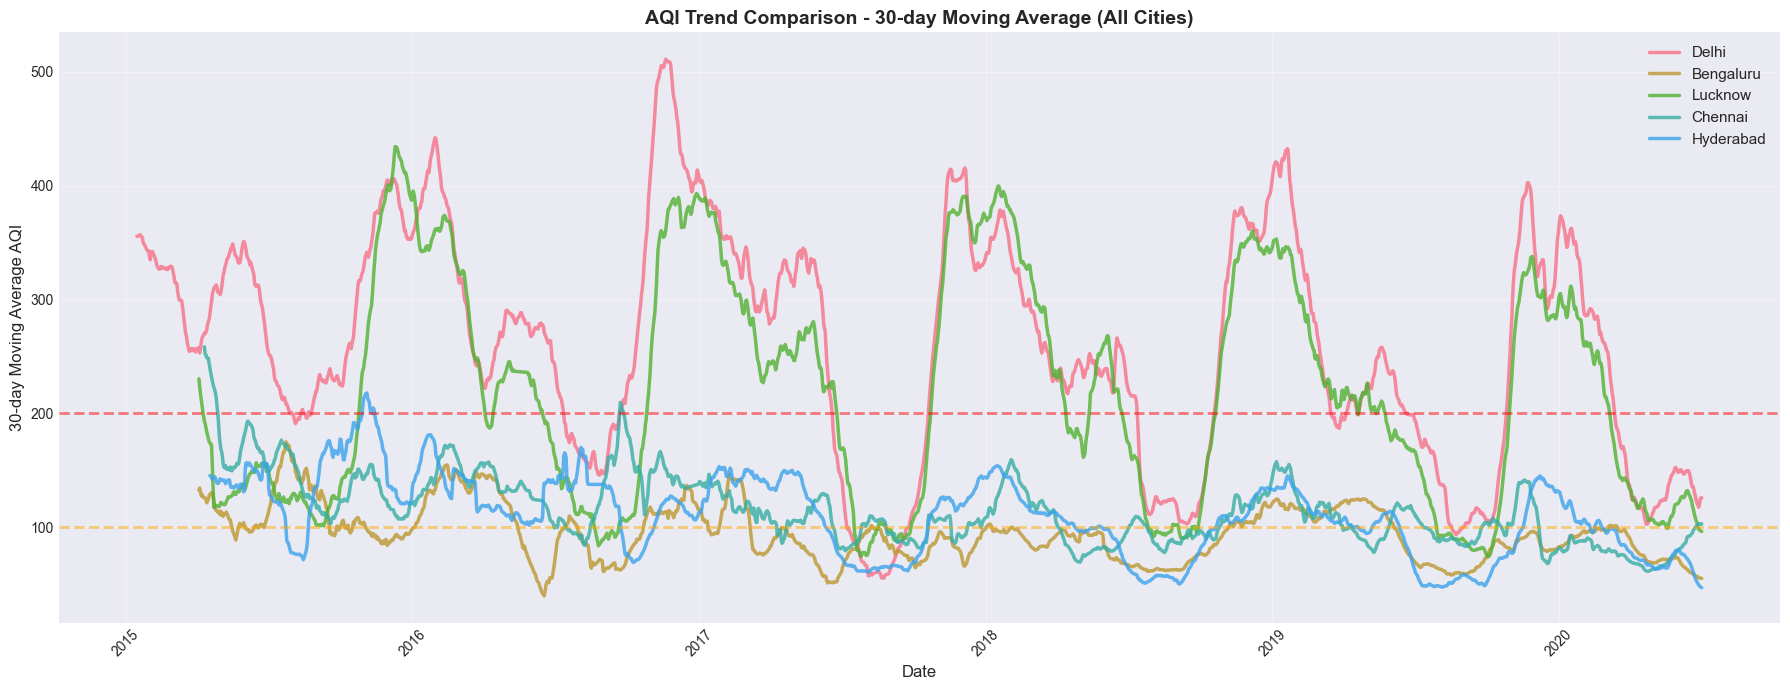


TREND SLOPES FROM 30-DAY MOVING AVERAGE

Delhi:
  Daily slope (smoothed): -0.0554 AQI/day
  Annual change: -20.21 AQI/year
  Total change (2015-2020): -110.41 AQI
  Trend: Improving ✓

Bengaluru:
  Daily slope (smoothed): -0.0178 AQI/day
  Annual change: -6.51 AQI/year
  Total change (2015-2020): -34.17 AQI
  Trend: Improving ✓

Lucknow:
  Daily slope (smoothed): -0.0178 AQI/day
  Annual change: -6.48 AQI/year
  Total change (2015-2020): -34.01 AQI
  Trend: Improving ✓

Chennai:
  Daily slope (smoothed): -0.0364 AQI/day
  Annual change: -13.28 AQI/year
  Total change (2015-2020): -69.44 AQI
  Trend: Improving ✓

Hyderabad:
  Daily slope (smoothed): -0.0352 AQI/day
  Annual change: -12.85 AQI/year
  Total change (2015-2020): -66.91 AQI
  Trend: Improving ✓


In [22]:
# ============================================================================
# 5.5 ROLLING AVERAGES & TREND ANALYSIS
# ============================================================================

print("=" * 80)
print("5.5 ROLLING AVERAGES - SMOOTHING TRENDS")
print("=" * 80)

# Create figure with subplots for each city
fig, axes = plt.subplots(len(target_cities), 1, figsize=(18, 4 * len(target_cities)))

if len(target_cities) == 1:
    axes = [axes]

for idx, city in enumerate(target_cities):
    ax = axes[idx]
    
    # Get city data sorted by date
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date').copy()
    city_data_clean = city_data.dropna(subset=['AQI'])
    
    # Calculate rolling averages
    city_data_clean['AQI_7day'] = city_data_clean['AQI'].rolling(window=7, min_periods=4).mean()
    city_data_clean['AQI_30day'] = city_data_clean['AQI'].rolling(window=30, min_periods=15).mean()
    
    # Plot
    ax.plot(city_data_clean['Date'], city_data_clean['AQI'], 
            alpha=0.3, linewidth=0.5, color='gray', label='Daily AQI')
    ax.plot(city_data_clean['Date'], city_data_clean['AQI_7day'], 
            linewidth=2, color='steelblue', label='7-day Moving Average')
    ax.plot(city_data_clean['Date'], city_data_clean['AQI_30day'], 
            linewidth=2, color='darkblue', label='30-day Moving Average')
    
    # Add AQI threshold lines
    ax.axhline(y=100, color='orange', linestyle='--', alpha=0.5, linewidth=1)
    ax.axhline(y=200, color='red', linestyle='--', alpha=0.5, linewidth=1)
    
    ax.set_xlabel('Date', fontsize=11)
    ax.set_ylabel('AQI', fontsize=11)
    ax.set_title(f'{city} - AQI with Rolling Averages', fontsize=13, fontweight='bold')
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Compare smoothed trends
print("\n" + "=" * 80)
print("SMOOTHED TREND COMPARISON - 30-DAY MOVING AVERAGE")
print("=" * 80)

fig, ax = plt.subplots(1, 1, figsize=(18, 7))

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date').copy()
    city_data_clean = city_data.dropna(subset=['AQI'])
    city_data_clean['AQI_30day'] = city_data_clean['AQI'].rolling(window=30, min_periods=15).mean()
    
    ax.plot(city_data_clean['Date'], city_data_clean['AQI_30day'], 
            linewidth=2.5, label=city, alpha=0.8)

ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('30-day Moving Average AQI', fontsize=12)
ax.set_title('AQI Trend Comparison - 30-day Moving Average (All Cities)', fontsize=14, fontweight='bold')
ax.legend(loc='upper right', fontsize=11)
ax.grid(alpha=0.3)
ax.axhline(y=100, color='orange', linestyle='--', alpha=0.5, linewidth=2, label='Moderate')
ax.axhline(y=200, color='red', linestyle='--', alpha=0.5, linewidth=2, label='Poor')
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate trend slopes from smoothed data
print("\n" + "=" * 80)
print("TREND SLOPES FROM 30-DAY MOVING AVERAGE")
print("=" * 80)

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date').copy()
    city_data_clean = city_data.dropna(subset=['AQI'])
    city_data_clean['AQI_30day'] = city_data_clean['AQI'].rolling(window=30, min_periods=15).mean()
    
    # Remove NaN values from rolling average
    smoothed_data = city_data_clean.dropna(subset=['AQI_30day'])
    
    if len(smoothed_data) > 0:
        x_numeric = (smoothed_data['Date'] - smoothed_data['Date'].min()).dt.days
        z = np.polyfit(x_numeric, smoothed_data['AQI_30day'], 1)
        
        total_days = x_numeric.max()
        total_change = z[0] * total_days
        annual_change = z[0] * 365
        
        trend_direction = "Improving ✓" if z[0] < 0 else "Worsening ✗"
        
        print(f"\n{city}:")
        print(f"  Daily slope (smoothed): {z[0]:.4f} AQI/day")
        print(f"  Annual change: {annual_change:.2f} AQI/year")
        print(f"  Total change (2015-2020): {total_change:.2f} AQI")
        print(f"  Trend: {trend_direction}")

### 5.6 COVID-19 Lockdown Impact Analysis

Analyze the dramatic effect of 2020 lockdown on air quality - a natural experiment showing the impact of reduced human activity.

5.6 COVID-19 LOCKDOWN IMPACT ANALYSIS

LOCKDOWN PERIOD vs BASELINE (SAME CALENDAR PERIOD)
Comparing: March 25 - May 3, 2020 (Lockdown) vs Same Period in 2015-2019 (Baseline)

Delhi:
  Baseline (2015-2019): 272.25
  Lockdown (2020):      107.45
  Improvement:          164.80 AQI (60.5%)

Bengaluru:
  Baseline (2015-2019): 110.42
  Lockdown (2020):      68.67
  Improvement:          41.75 AQI (37.8%)

Lucknow:
  Baseline (2015-2019): 202.81
  Lockdown (2020):      103.17
  Improvement:          99.64 AQI (49.1%)

Chennai:
  Baseline (2015-2019): 116.57
  Lockdown (2020):      62.65
  Improvement:          53.92 AQI (46.3%)

Hyderabad:
  Baseline (2015-2019): 118.92
  Lockdown (2020):      65.25
  Improvement:          53.67 AQI (45.1%)

2020 vs 2015-2019 BASELINE - MONTHLY COMPARISON

Delhi:
 Month  AQI_Baseline  AQI_2020  AQI_Difference  AQI_Change_%
     1        370.77    308.45          -62.32        -16.81
     2        306.38    262.14          -44.24        -14.44
     3        23

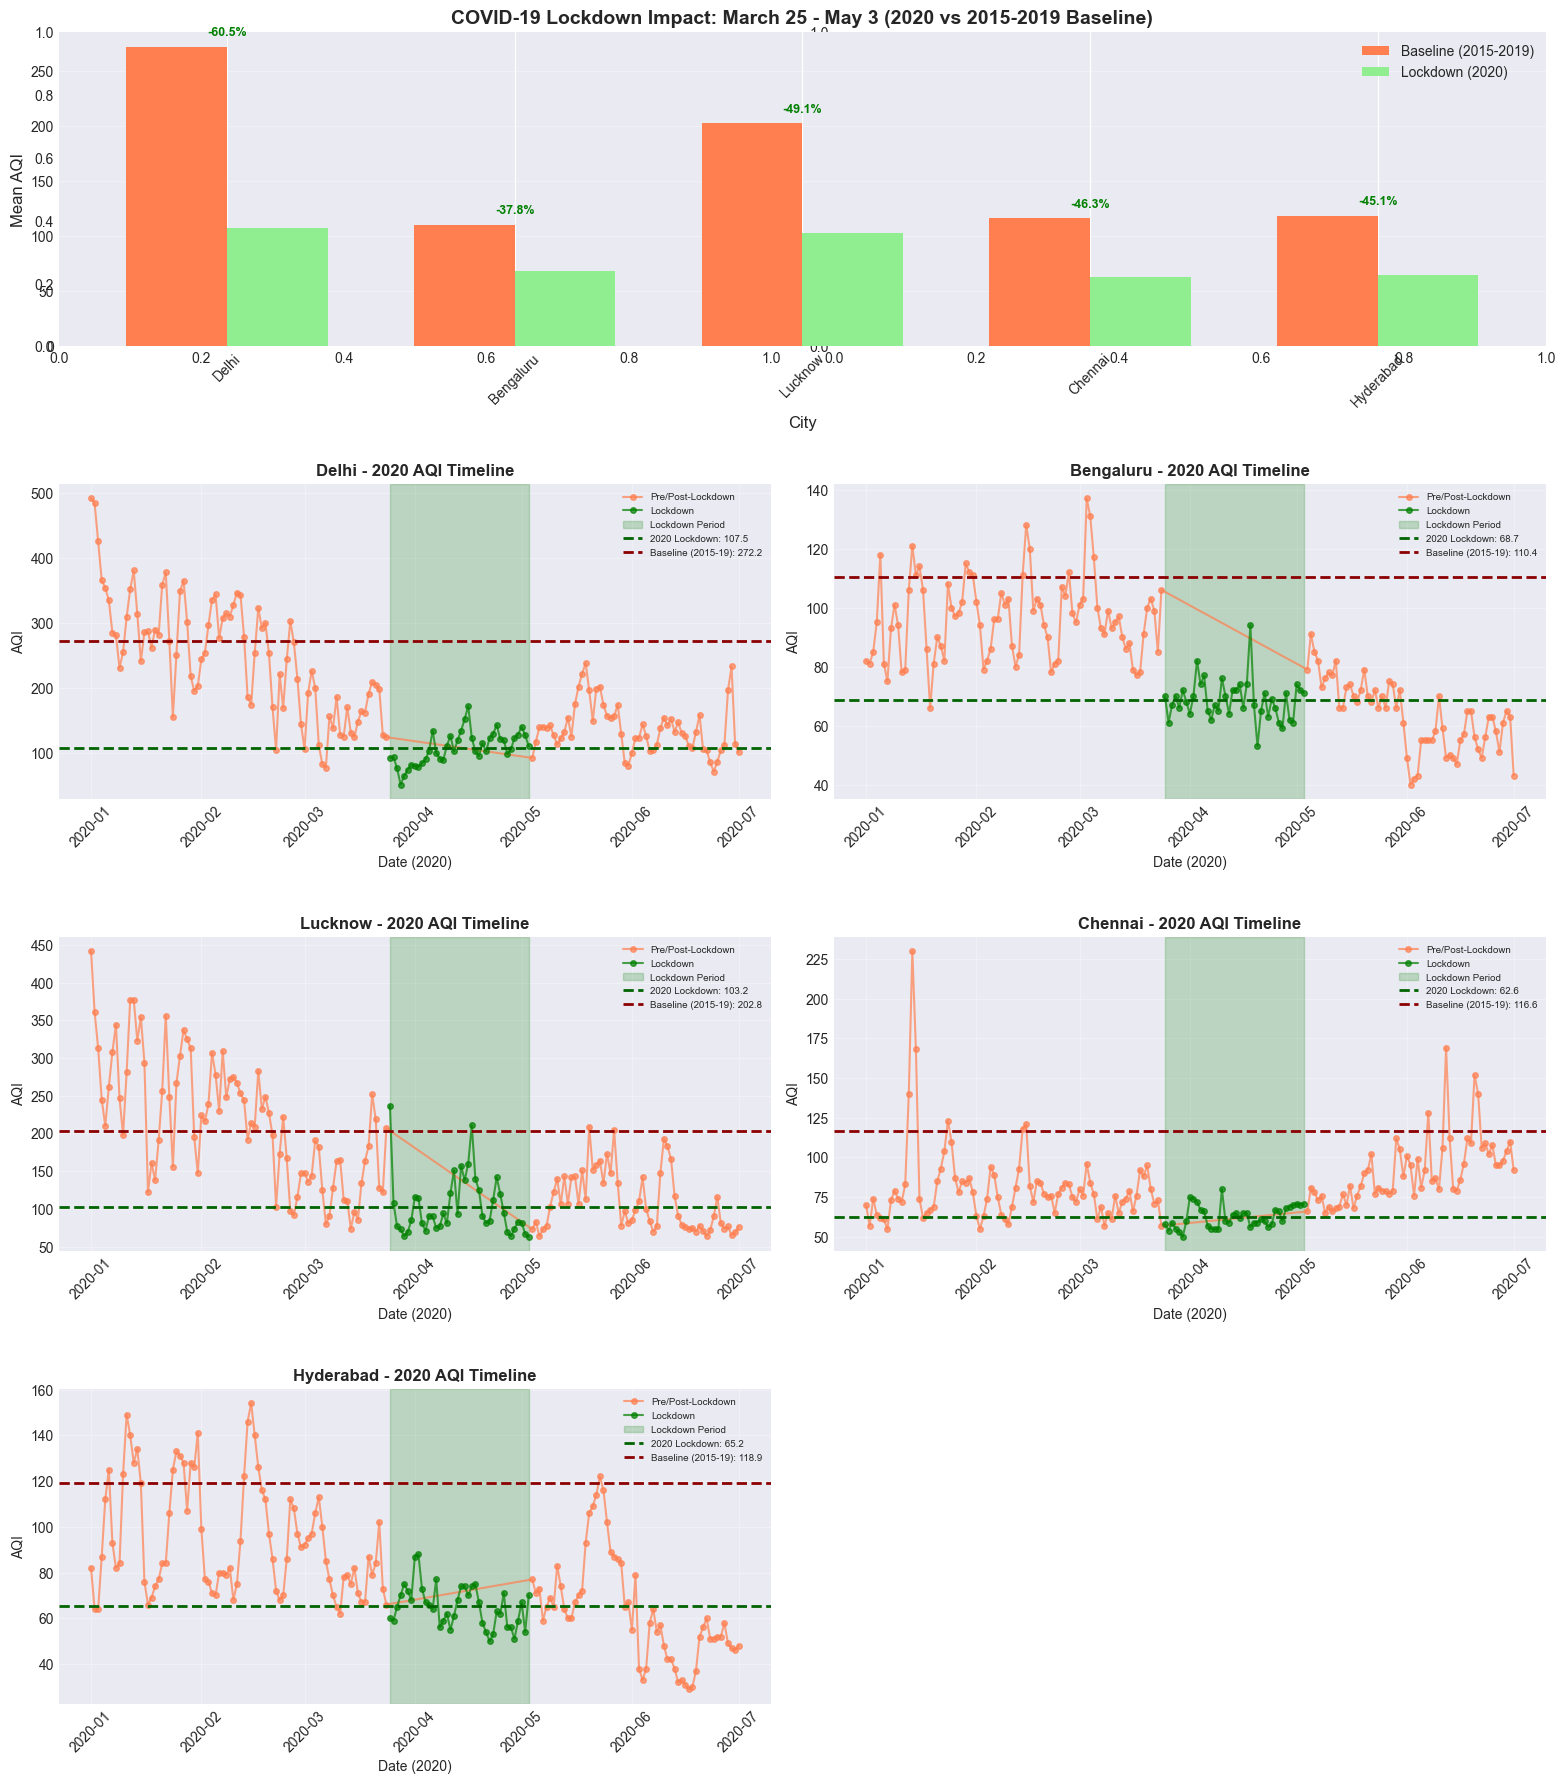


POLLUTANT-WISE LOCKDOWN IMPACT (vs 2015-2019 BASELINE)

Delhi:
--------------------------------------------------------------------------------
  PM2.5   : Baseline= 99.59, Lockdown= 42.65, Change= -56.94 ( -57.2%) ↓
  PM10    : Baseline=237.98, Lockdown= 97.27, Change=-140.72 ( -59.1%) ↓
  NO2     : Baseline= 54.75, Lockdown= 20.02, Change= -34.72 ( -63.4%) ↓
  SO2     : Baseline= 22.31, Lockdown= 14.70, Change=  -7.61 ( -34.1%) ↓
  CO      : Baseline=  2.57, Lockdown=  0.74, Change=  -1.83 ( -71.1%) ↓

Bengaluru:
--------------------------------------------------------------------------------
  PM2.5   : Baseline= 41.64, Lockdown= 25.04, Change= -16.60 ( -39.9%) ↓
  PM10    : Baseline=107.35, Lockdown= 48.03, Change= -59.31 ( -55.3%) ↓
  NO2     : Baseline= 26.00, Lockdown= 11.89, Change= -14.11 ( -54.3%) ↓
  SO2     : Baseline=  5.02, Lockdown=  6.08, Change=  +1.06 ( +21.0%) ↑
  CO      : Baseline=  1.44, Lockdown=  0.74, Change=  -0.69 ( -48.2%) ↓

Lucknow:
----------------------

In [23]:
print("=" * 80)
print("5.6 COVID-19 LOCKDOWN IMPACT ANALYSIS")
print("=" * 80)

# Define lockdown period (India's nationwide lockdown)
lockdown_start = pd.to_datetime('2020-03-25')
lockdown_phase2_end = pd.to_datetime('2020-05-03')  # End of Phase 2

# Filter data for 2020 and previous years
df_2020 = df_filtered[df_filtered['Year'] == 2020].copy()
df_baseline = df_filtered[df_filtered['Year'].isin([2015, 2016, 2017, 2018, 2019])].copy()

# Tag lockdown period
df_2020['Lockdown'] = df_2020['Date'].apply(
    lambda x: 'Lockdown' if lockdown_start <= x <= lockdown_phase2_end else 'Pre/Post-Lockdown'
)

# Get same calendar period from baseline years (March 25 - May 3)
df_baseline['MonthDay'] = df_baseline['Date'].dt.strftime('%m-%d')
lockdown_monthdays = pd.date_range(lockdown_start, lockdown_phase2_end).strftime('%m-%d').tolist()
df_baseline_lockdown_period = df_baseline[df_baseline['MonthDay'].isin(lockdown_monthdays)].copy()

# Calculate statistics for comparison
print("\n" + "=" * 80)
print("LOCKDOWN PERIOD vs BASELINE (SAME CALENDAR PERIOD)")
print("=" * 80)
print(f"Comparing: March 25 - May 3, 2020 (Lockdown) vs Same Period in 2015-2019 (Baseline)")
print("=" * 80)

for city in target_cities:
    # 2020 lockdown period
    city_lockdown_2020 = df_2020[(df_2020['City'] == city) & (df_2020['Lockdown'] == 'Lockdown')]['AQI'].mean()
    
    # Baseline (2015-2019 same period)
    city_baseline = df_baseline_lockdown_period[df_baseline_lockdown_period['City'] == city]['AQI'].mean()
    
    if pd.notna(city_lockdown_2020) and pd.notna(city_baseline):
        improvement = city_baseline - city_lockdown_2020
        improvement_pct = (improvement / city_baseline) * 100
        print(f"\n{city}:")
        print(f"  Baseline (2015-2019): {city_baseline:.2f}")
        print(f"  Lockdown (2020):      {city_lockdown_2020:.2f}")
        print(f"  Improvement:          {improvement:.2f} AQI ({improvement_pct:.1f}%)")

# Compare 2020 vs 2015-2019 baseline for monthly data
print("\n" + "=" * 80)
print("2020 vs 2015-2019 BASELINE - MONTHLY COMPARISON")
print("=" * 80)

for city in target_cities:
    print(f"\n{city}:")
    
    # Monthly comparison
    monthly_2020 = df_2020[df_2020['City'] == city].groupby('Month')['AQI'].mean()
    monthly_baseline = df_baseline[df_baseline['City'] == city].groupby('Month')['AQI'].mean()
    
    monthly_comparison = pd.merge(
        monthly_baseline.rename('AQI_Baseline'),
        monthly_2020.rename('AQI_2020'),
        left_index=True, right_index=True, how='outer'
    ).reset_index()
    monthly_comparison['AQI_Difference'] = monthly_comparison['AQI_2020'] - monthly_comparison['AQI_Baseline']
    monthly_comparison['AQI_Change_%'] = (monthly_comparison['AQI_Difference'] / monthly_comparison['AQI_Baseline'] * 100)
    
    print(monthly_comparison.to_string(index=False))

# Visualizations - Use 4x2 grid to accommodate 1 overall + 5 individual plots
fig, axes = plt.subplots(4, 2, figsize=(16, 18))

# Subplot 1: Overall comparison - Lockdown 2020 vs Baseline (same period) (span first row)
ax_overall = plt.subplot(4, 2, (1, 2))
lockdown_comparison = []
for city in target_cities:
    # 2020 lockdown period
    city_lockdown_2020 = df_2020[(df_2020['City'] == city) & (df_2020['Lockdown'] == 'Lockdown')]['AQI'].mean()
    
    # Baseline (2015-2019 same period)
    city_baseline = df_baseline_lockdown_period[df_baseline_lockdown_period['City'] == city]['AQI'].mean()
    
    lockdown_comparison.append({'City': city, 'Baseline': city_baseline, 'Lockdown_2020': city_lockdown_2020})

lockdown_df = pd.DataFrame(lockdown_comparison)
x = np.arange(len(target_cities))
width = 0.35

ax_overall.bar(x - width/2, lockdown_df['Baseline'], width, label='Baseline (2015-2019)', color='coral')
ax_overall.bar(x + width/2, lockdown_df['Lockdown_2020'], width, label='Lockdown (2020)', color='lightgreen')
ax_overall.set_xlabel('City', fontsize=12)
ax_overall.set_ylabel('Mean AQI', fontsize=12)
ax_overall.set_title('COVID-19 Lockdown Impact: March 25 - May 3 (2020 vs 2015-2019 Baseline)', 
                     fontsize=14, fontweight='bold')
ax_overall.set_xticks(x)
ax_overall.set_xticklabels(target_cities, rotation=45)
ax_overall.legend()
ax_overall.grid(axis='y', alpha=0.3)

# Add percentage change labels on bars
for i, city in enumerate(target_cities):
    baseline_val = lockdown_df.iloc[i]['Baseline']
    lockdown_val = lockdown_df.iloc[i]['Lockdown_2020']
    if pd.notna(baseline_val) and pd.notna(lockdown_val):
        pct_change = ((lockdown_val - baseline_val) / baseline_val) * 100
        ax_overall.text(i, max(baseline_val, lockdown_val) + 10, f'{pct_change:+.1f}%', 
                       ha='center', fontsize=9, fontweight='bold', color='green' if pct_change < 0 else 'red')

# Subplots 2-6: Individual city time series during 2020
for idx, city in enumerate(target_cities):
    row = (idx // 2) + 1  # Start from row 1
    col = idx % 2
    ax = axes[row, col]
    
    city_2020 = df_2020[df_2020['City'] == city].sort_values('Date')
    
    # Separate lockdown and non-lockdown periods
    lockdown_period = city_2020[city_2020['Lockdown'] == 'Lockdown']
    regular_period = city_2020[city_2020['Lockdown'] == 'Pre/Post-Lockdown']
    
    # Plot
    ax.plot(regular_period['Date'], regular_period['AQI'], 'o-', color='coral', 
            label='Pre/Post-Lockdown', alpha=0.7, markersize=4)
    ax.plot(lockdown_period['Date'], lockdown_period['AQI'], 'o-', color='green', 
            label='Lockdown', alpha=0.7, markersize=4)
    
    # Highlight lockdown period
    ax.axvspan(lockdown_start, lockdown_phase2_end, alpha=0.2, color='green', label='Lockdown Period')
    
    # Calculate mean lines
    if len(lockdown_period) > 0:
        lockdown_mean = lockdown_period['AQI'].mean()
        ax.axhline(y=lockdown_mean, color='darkgreen', 
                   linestyle='--', linewidth=2, label=f"2020 Lockdown: {lockdown_mean:.1f}")
    
    # Add baseline mean for same period
    city_baseline_mean = df_baseline_lockdown_period[df_baseline_lockdown_period['City'] == city]['AQI'].mean()
    if pd.notna(city_baseline_mean):
        ax.axhline(y=city_baseline_mean, color='darkred', 
                   linestyle='--', linewidth=2, label=f"Baseline (2015-19): {city_baseline_mean:.1f}")
    
    ax.set_xlabel('Date (2020)', fontsize=10)
    ax.set_ylabel('AQI', fontsize=10)
    ax.set_title(f'{city} - 2020 AQI Timeline', fontsize=12, fontweight='bold')
    ax.legend(fontsize=7, loc='upper right')
    ax.grid(alpha=0.3)
    ax.tick_params(axis='x', rotation=45)

# Remove extra subplot if needed
if len(target_cities) == 5:
    fig.delaxes(axes[3, 1])

plt.tight_layout()
plt.show()

# Pollutant-wise impact analysis
print("\n" + "=" * 80)
print("POLLUTANT-WISE LOCKDOWN IMPACT (vs 2015-2019 BASELINE)")
print("=" * 80)

key_pollutants_lockdown = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO']

for city in target_cities:
    print(f"\n{city}:")
    print("-" * 80)
    
    # 2020 lockdown period
    city_lockdown = df_2020[(df_2020['City'] == city) & (df_2020['Lockdown'] == 'Lockdown')]
    
    # 2015-2019 baseline for same period (late March to early May)
    city_baseline_period = df_baseline_lockdown_period[df_baseline_lockdown_period['City'] == city]
    
    for pollutant in key_pollutants_lockdown:
        lockdown_mean = city_lockdown[pollutant].mean()
        baseline_mean = city_baseline_period[pollutant].mean()
        
        if pd.notna(lockdown_mean) and pd.notna(baseline_mean):
            change = lockdown_mean - baseline_mean
            change_pct = (change / baseline_mean) * 100
            
            indicator = "↓" if change < 0 else "↑"
            print(f"  {pollutant:8s}: Baseline={baseline_mean:6.2f}, Lockdown={lockdown_mean:6.2f}, "
                  f"Change={change:+7.2f} ({change_pct:+6.1f}%) {indicator}")

---

## 6. Missing Data Analysis (Temporal)

We already identified data completeness in Section 2. Now let's visualize missing data patterns to understand:
- Which pollutants have the most missing data
- Are there temporal patterns in missing data?
- Are certain time periods more affected?

**6.1 Overall Missing Data Summary**
- Calculate percentage of missing data for each pollutant
- Create bar chart showing completeness by pollutant and city
- Identify which pollutants are most problematic

**6.2 Missing Data Heatmap**
- Create heatmap showing missing data patterns across pollutants and cities
- Use binary visualization (missing vs present)
- Color code to make patterns clear

**6.3 Temporal Patterns in Missing Data**
- Analyze if missing data varies by:
  - Year (is data quality improving/degrading?)
  - Month (seasonal collection issues?)
  - Day of week (weekend data collection issues?)
- Create time series showing data availability over time

**6.4 Missing Data Correlation**
- Check if certain pollutants tend to be missing together
- Create correlation matrix of missingness
- This could indicate sensor/station-level issues

### 6.1 Overall Missing Data Summary

Calculate and visualize the percentage of missing data for each pollutant across all cities.

6.1 OVERALL MISSING DATA SUMMARY

MISSING DATA STATISTICS BY POLLUTANT (All Cities)
           Missing_%  Present_%
Pollutant                      
PM10           44.88      55.12
NH3            20.29      79.71
PM2.5           4.80      95.20
AQI             4.74      95.26
O3              3.29      96.71
SO2             2.41      97.59
NO2             0.96      99.04
CO              0.69      99.31

MISSING DATA STATISTICS BY CITY (All Pollutants)
           Missing_%  Present_%
City                           
Lucknow        20.99      79.01
Chennai        15.91      84.09
Hyderabad       6.49      93.51
Bengaluru       6.07      93.93
Delhi           1.83      98.17


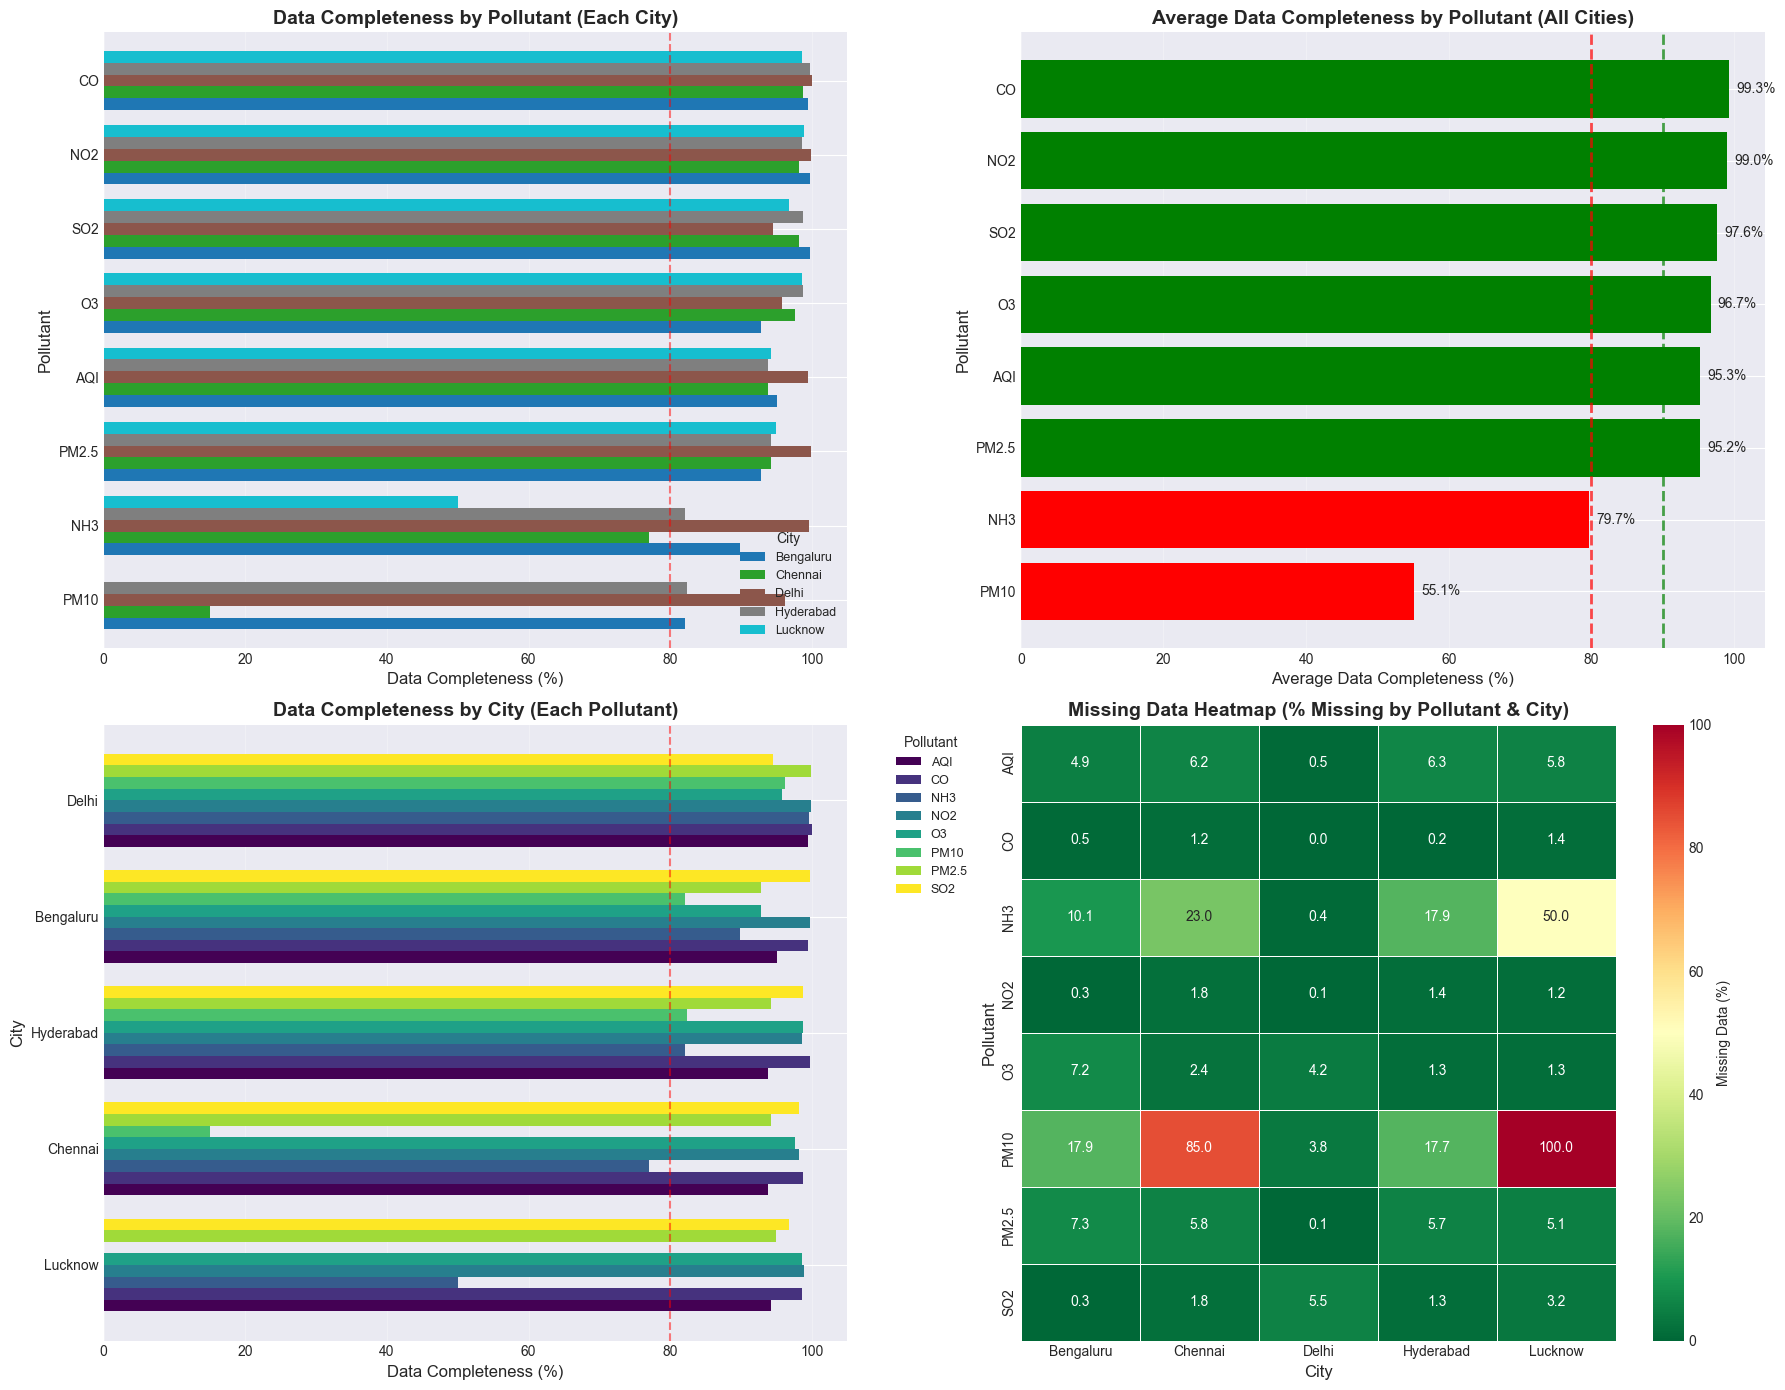


MOST PROBLEMATIC POLLUTANTS (Highest Missing Data)
PM10: 44.88% missing across all cities
NH3: 20.29% missing across all cities
PM2.5: 4.80% missing across all cities

BEST DATA QUALITY CITIES (Lowest Missing Data)
Hyderabad: 6.49% average missing data across all pollutants
Bengaluru: 6.07% average missing data across all pollutants
Delhi: 1.83% average missing data across all pollutants


In [24]:
print("=" * 80)
print("6.1 OVERALL MISSING DATA SUMMARY")
print("=" * 80)

# Define pollutants to analyze
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3', 'AQI']

# Calculate missing data percentage for each pollutant and city
missing_data_summary = []

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    total_records = len(city_data)
    
    for pollutant in pollutants:
        missing_count = city_data[pollutant].isna().sum()
        missing_pct = (missing_count / total_records) * 100
        present_pct = 100 - missing_pct
        
        missing_data_summary.append({
            'City': city,
            'Pollutant': pollutant,
            'Total_Records': total_records,
            'Missing_Count': missing_count,
            'Missing_%': missing_pct,
            'Present_%': present_pct
        })

missing_df = pd.DataFrame(missing_data_summary)

# Print summary statistics
print("\n" + "=" * 80)
print("MISSING DATA STATISTICS BY POLLUTANT (All Cities)")
print("=" * 80)
pollutant_summary = missing_df.groupby('Pollutant')[['Missing_%', 'Present_%']].mean().sort_values('Missing_%', ascending=False)
print(pollutant_summary.to_string())

print("\n" + "=" * 80)
print("MISSING DATA STATISTICS BY CITY (All Pollutants)")
print("=" * 80)
city_summary = missing_df.groupby('City')[['Missing_%', 'Present_%']].mean().sort_values('Missing_%', ascending=False)
print(city_summary.to_string())

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Data completeness by pollutant (stacked bar)
ax1 = axes[0, 0]
pivot_data = missing_df.pivot_table(index='Pollutant', columns='City', values='Present_%')
pivot_data_sorted = pivot_data.mean(axis=1).sort_values(ascending=True)
pivot_data = pivot_data.loc[pivot_data_sorted.index]

pivot_data.plot(kind='barh', stacked=False, ax=ax1, colormap='tab10', width=0.8)
ax1.set_xlabel('Data Completeness (%)', fontsize=12)
ax1.set_ylabel('Pollutant', fontsize=12)
ax1.set_title('Data Completeness by Pollutant (Each City)', fontsize=14, fontweight='bold')
ax1.legend(title='City', fontsize=9, loc='lower right')
ax1.grid(axis='x', alpha=0.3)
ax1.axvline(x=80, color='red', linestyle='--', alpha=0.5, label='80% threshold')

# Plot 2: Average data completeness by pollutant
ax2 = axes[0, 1]
pollutant_avg = missing_df.groupby('Pollutant')['Present_%'].mean().sort_values()
colors = ['red' if x < 80 else 'green' if x >= 90 else 'orange' for x in pollutant_avg.values]
ax2.barh(pollutant_avg.index, pollutant_avg.values, color=colors)
ax2.set_xlabel('Average Data Completeness (%)', fontsize=12)
ax2.set_ylabel('Pollutant', fontsize=12)
ax2.set_title('Average Data Completeness by Pollutant (All Cities)', fontsize=14, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
ax2.axvline(x=80, color='red', linestyle='--', linewidth=2, alpha=0.7)
ax2.axvline(x=90, color='green', linestyle='--', linewidth=2, alpha=0.7)

# Add value labels
for i, v in enumerate(pollutant_avg.values):
    ax2.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

# Plot 3: Data completeness by city
ax3 = axes[1, 0]
pivot_data2 = missing_df.pivot_table(index='City', columns='Pollutant', values='Present_%')
pivot_data2_sorted = pivot_data2.mean(axis=1).sort_values(ascending=True)
pivot_data2 = pivot_data2.loc[pivot_data2_sorted.index]

pivot_data2.plot(kind='barh', stacked=False, ax=ax3, colormap='viridis', width=0.8)
ax3.set_xlabel('Data Completeness (%)', fontsize=12)
ax3.set_ylabel('City', fontsize=12)
ax3.set_title('Data Completeness by City (Each Pollutant)', fontsize=14, fontweight='bold')
ax3.legend(title='Pollutant', fontsize=9, bbox_to_anchor=(1.05, 1), loc='upper left')
ax3.grid(axis='x', alpha=0.3)
ax3.axvline(x=80, color='red', linestyle='--', alpha=0.5)

# Plot 4: Heatmap of missing data percentage
ax4 = axes[1, 1]
pivot_heatmap = missing_df.pivot_table(index='Pollutant', columns='City', values='Missing_%')
sns.heatmap(pivot_heatmap, annot=True, fmt='.1f', cmap='RdYlGn_r', ax=ax4, 
            cbar_kws={'label': 'Missing Data (%)'}, linewidths=0.5, vmin=0, vmax=100)
ax4.set_title('Missing Data Heatmap (% Missing by Pollutant & City)', fontsize=14, fontweight='bold')
ax4.set_xlabel('City', fontsize=12)
ax4.set_ylabel('Pollutant', fontsize=12)

plt.tight_layout()
plt.show()

# Identify most problematic pollutants
print("\n" + "=" * 80)
print("MOST PROBLEMATIC POLLUTANTS (Highest Missing Data)")
print("=" * 80)
worst_pollutants = pollutant_summary.head(3)
for pollutant in worst_pollutants.index:
    missing_pct = worst_pollutants.loc[pollutant, 'Missing_%']
    print(f"{pollutant}: {missing_pct:.2f}% missing across all cities")

# Identify best data quality cities
print("\n" + "=" * 80)
print("BEST DATA QUALITY CITIES (Lowest Missing Data)")
print("=" * 80)
best_cities = city_summary.tail(3)
for city in best_cities.index:
    missing_pct = city_summary.loc[city, 'Missing_%']
    print(f"{city}: {missing_pct:.2f}% average missing data across all pollutants")

### 6.2 Missing Data Pattern Heatmap

Create a detailed binary heatmap showing missing vs present data patterns over time.

6.2 MISSING DATA PATTERN HEATMAP


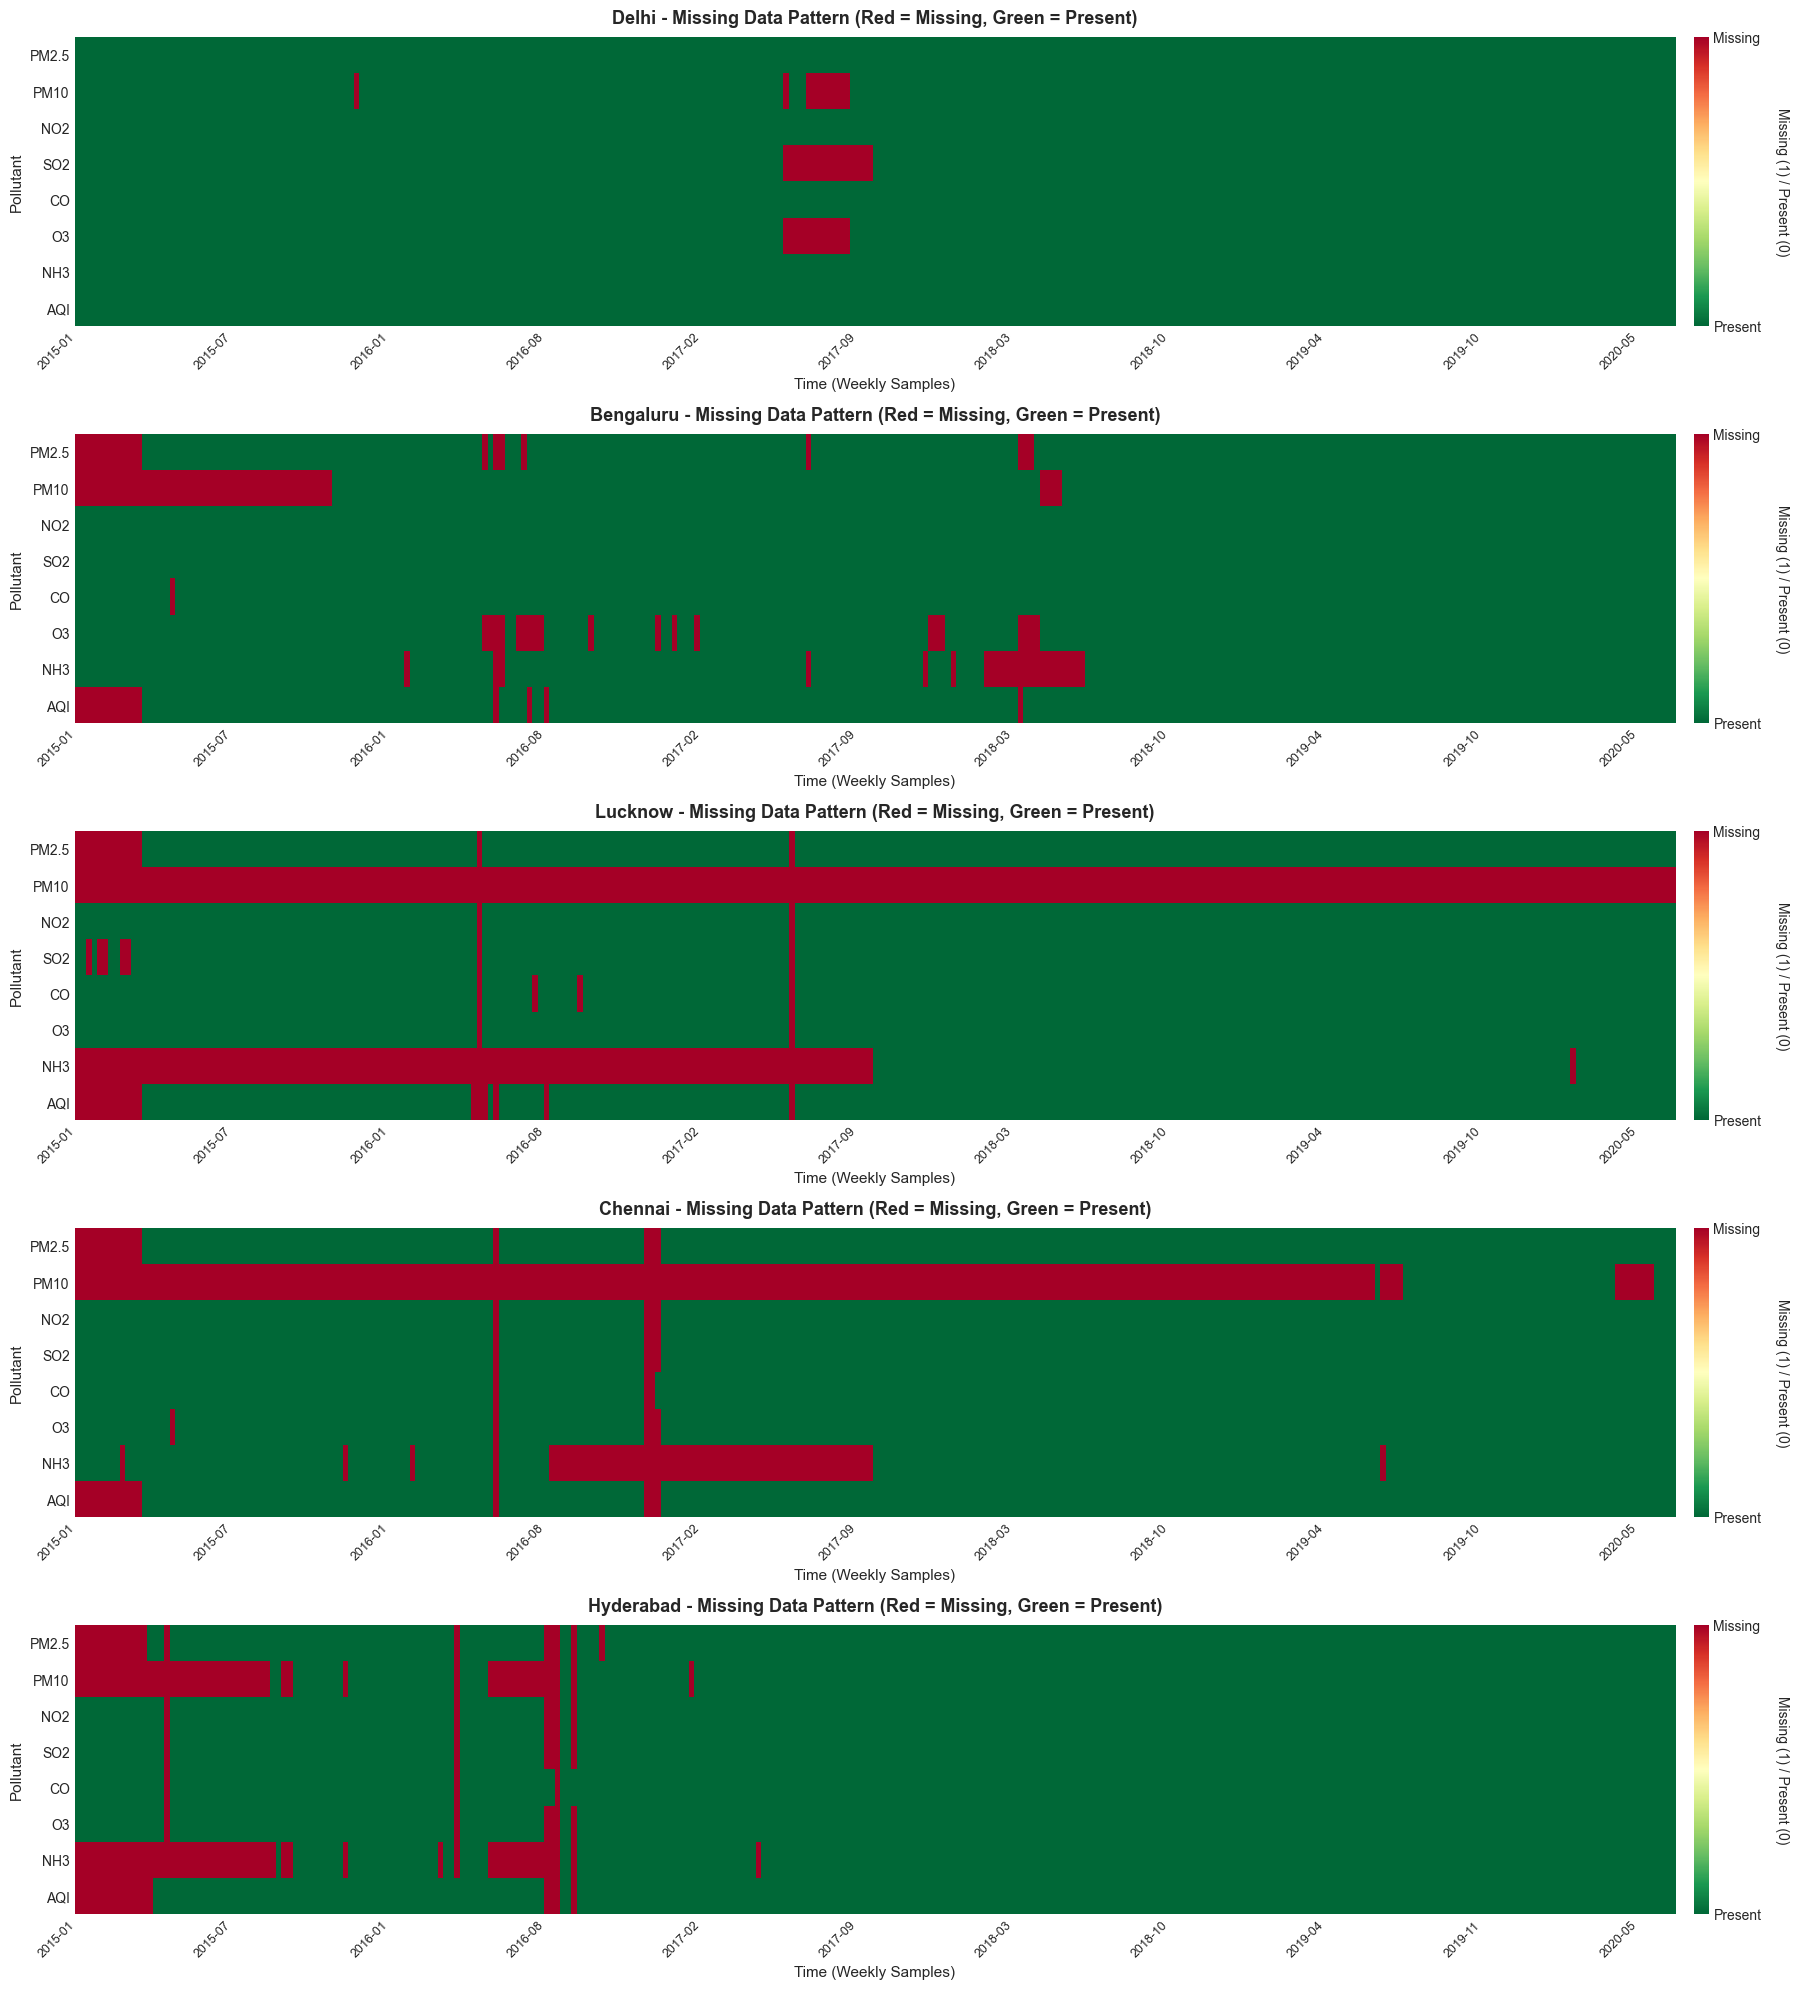


MISSING DATA PATTERN INTERPRETATION
Vertical red bands indicate time periods with widespread missing data across pollutants
Horizontal red bands indicate specific pollutants with consistent missing data
Random red spots indicate isolated missing measurements


In [25]:
print("=" * 80)
print("6.2 MISSING DATA PATTERN HEATMAP")
print("=" * 80)

# Create binary missing data indicators
fig, axes = plt.subplots(5, 1, figsize=(20, 20))

for idx, city in enumerate(target_cities):
    ax = axes[idx]
    
    city_data = df_filtered[df_filtered['City'] == city].sort_values('Date').copy()
    
    # Sample data to manageable size for visualization (every 7th day for readability)
    city_data_sampled = city_data.iloc[::7].copy()
    
    # Create binary missing indicator (1 = missing, 0 = present)
    missing_matrix = city_data_sampled[pollutants].isna().astype(int).T
    
    # Create heatmap
    im = ax.imshow(missing_matrix, aspect='auto', cmap='RdYlGn_r', interpolation='nearest')
    
    # Set labels
    ax.set_yticks(range(len(pollutants)))
    ax.set_yticklabels(pollutants, fontsize=10)
    ax.set_xlabel('Time (Weekly Samples)', fontsize=11)
    ax.set_ylabel('Pollutant', fontsize=11)
    ax.set_title(f'{city} - Missing Data Pattern (Red = Missing, Green = Present)', 
                 fontsize=13, fontweight='bold', pad=10)
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.01)
    cbar.set_label('Missing (1) / Present (0)', rotation=270, labelpad=20, fontsize=10)
    cbar.set_ticks([0, 1])
    cbar.set_ticklabels(['Present', 'Missing'])
    
    # Add date labels on x-axis (every 20th sample)
    date_indices = list(range(0, len(city_data_sampled), max(1, len(city_data_sampled)//10)))
    ax.set_xticks(date_indices)
    ax.set_xticklabels([city_data_sampled.iloc[i]['Date'].strftime('%Y-%m') 
                        for i in date_indices if i < len(city_data_sampled)], 
                       rotation=45, ha='right', fontsize=9)
    
    # Add grid
    ax.grid(False)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("MISSING DATA PATTERN INTERPRETATION")
print("=" * 80)
print("Vertical red bands indicate time periods with widespread missing data across pollutants")
print("Horizontal red bands indicate specific pollutants with consistent missing data")
print("Random red spots indicate isolated missing measurements")

### 6.3 Temporal Patterns in Missing Data

Analyze how missing data varies over time (yearly, monthly, day-of-week trends).

6.3 TEMPORAL PATTERNS IN MISSING DATA


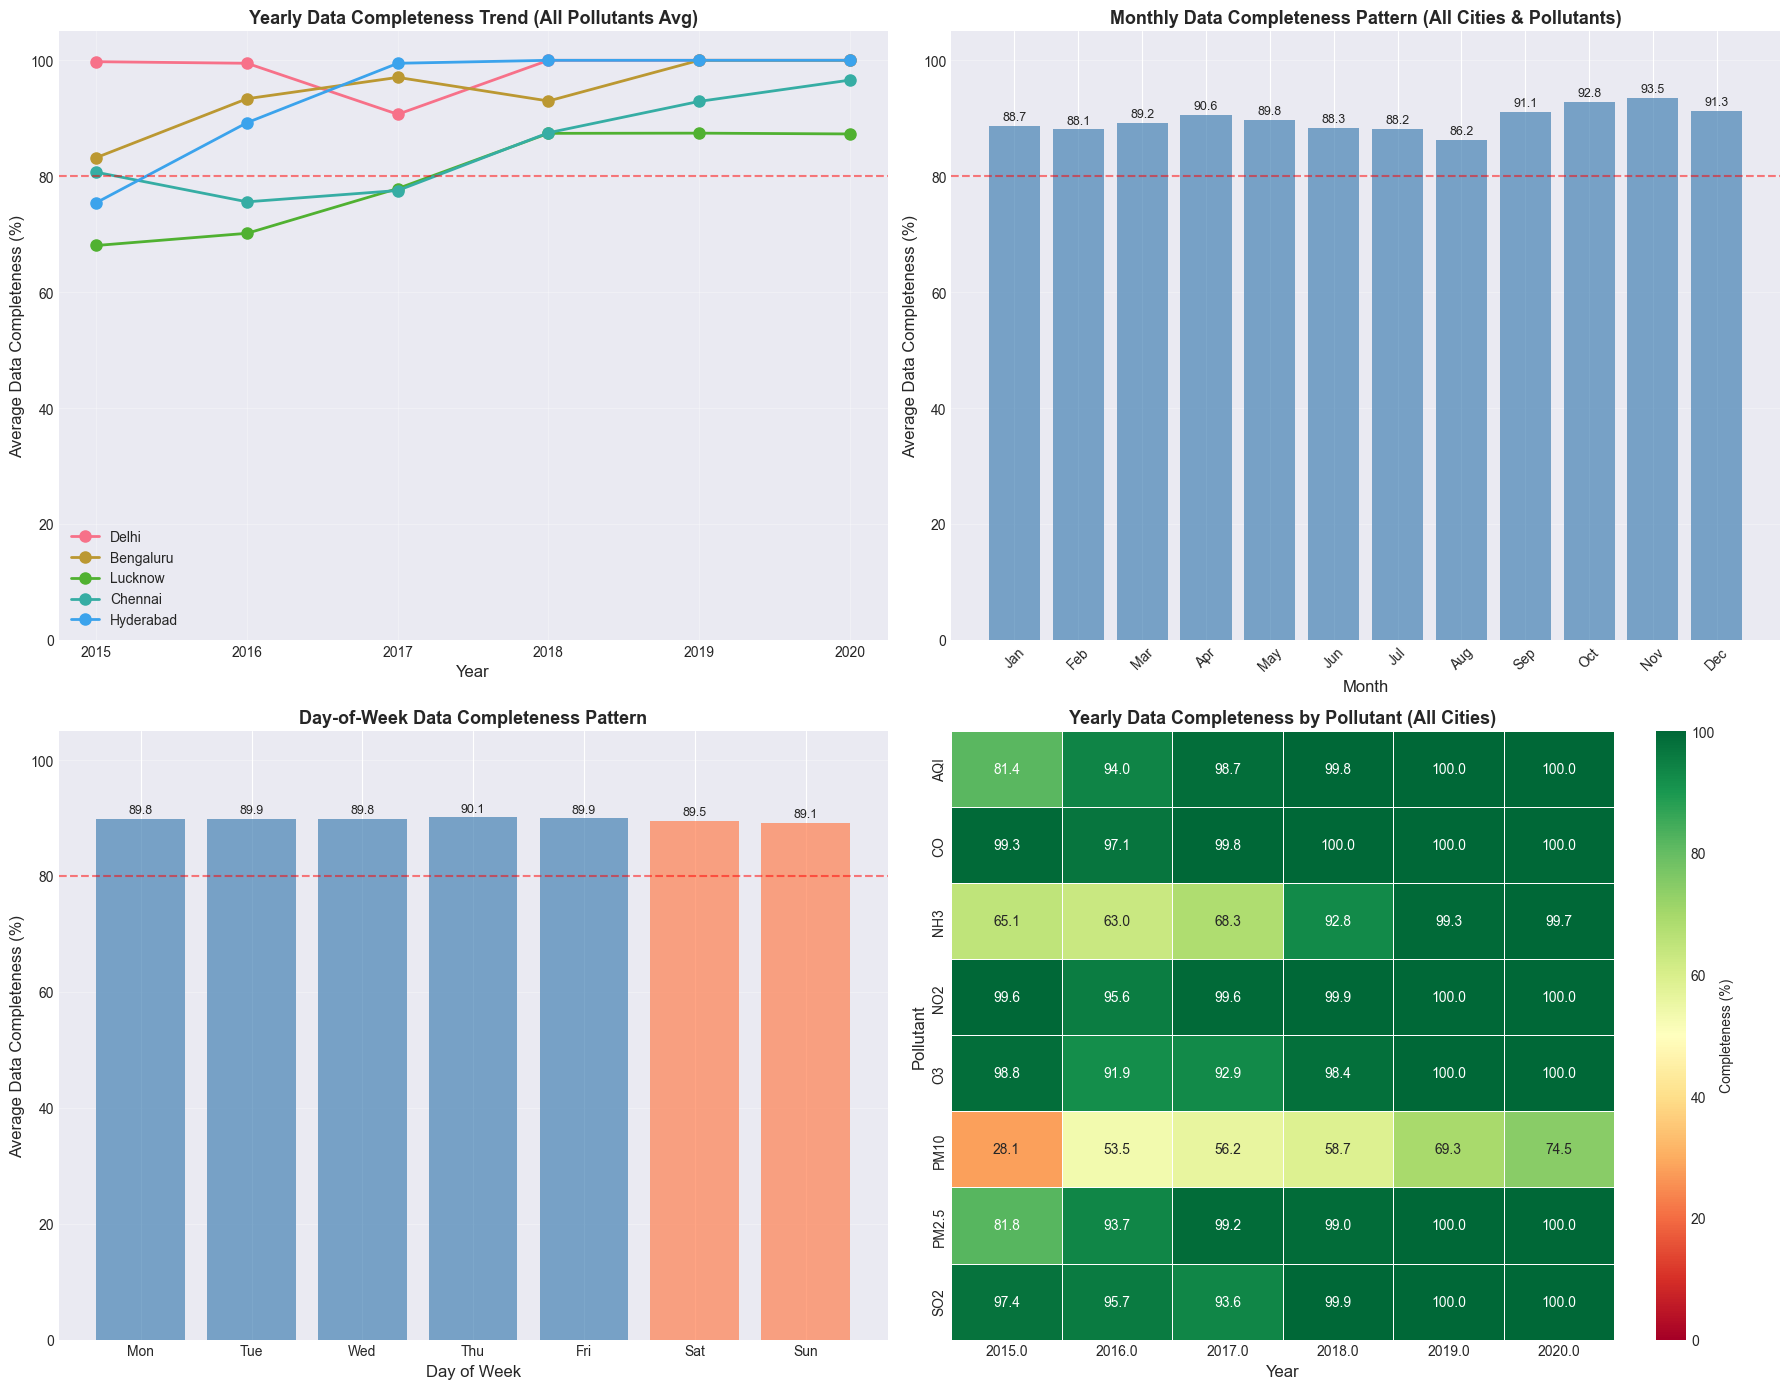


TEMPORAL COMPLETENESS INSIGHTS

Yearly Trend (All Cities & Pollutants):
  2015: 81.43% average completeness
  2016: 85.57% average completeness
  2017: 88.53% average completeness
  2018: 93.58% average completeness
  2019: 96.07% average completeness
  2020: 96.78% average completeness

Overall Trend: Improving (+15.34% change from 2015 to 2020)

Weekday vs Weekend Data Collection:
  Weekday Average: 89.85%
  Weekend Average: 89.32%
  Difference: +0.53%

Seasonal Data Collection Quality:
  Best Month: Nov (93.47%)
  Worst Month: Aug (86.21%)


In [26]:
print("=" * 80)
print("6.3 TEMPORAL PATTERNS IN MISSING DATA")
print("=" * 80)

# Calculate data completeness over time
temporal_completeness = []

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].copy()
    
    # Yearly completeness
    for year in city_data['Year'].unique():
        year_data = city_data[city_data['Year'] == year]
        for pollutant in pollutants:
            completeness = (1 - year_data[pollutant].isna().mean()) * 100
            temporal_completeness.append({
                'City': city,
                'Year': year,
                'Pollutant': pollutant,
                'Completeness_%': completeness,
                'Period_Type': 'Yearly'
            })
    
    # Monthly completeness
    for month in range(1, 13):
        month_data = city_data[city_data['Month'] == month]
        if len(month_data) > 0:
            for pollutant in pollutants:
                completeness = (1 - month_data[pollutant].isna().mean()) * 100
                temporal_completeness.append({
                    'City': city,
                    'Month': month,
                    'Pollutant': pollutant,
                    'Completeness_%': completeness,
                    'Period_Type': 'Monthly'
                })
    
    # Day of week completeness
    for dow in range(7):
        dow_data = city_data[city_data['DayOfWeek'] == dow]
        if len(dow_data) > 0:
            for pollutant in pollutants:
                completeness = (1 - dow_data[pollutant].isna().mean()) * 100
                temporal_completeness.append({
                    'City': city,
                    'DayOfWeek': dow,
                    'Pollutant': pollutant,
                    'Completeness_%': completeness,
                    'Period_Type': 'DayOfWeek'
                })

temporal_df = pd.DataFrame(temporal_completeness)

# Visualizations
fig = plt.figure(figsize=(18, 14))

# Plot 1: Yearly data completeness trends (average across all pollutants)
ax1 = plt.subplot(2, 2, 1)
yearly_avg = temporal_df[temporal_df['Period_Type'] == 'Yearly'].groupby(['City', 'Year'])['Completeness_%'].mean().reset_index()
for city in target_cities:
    city_yearly = yearly_avg[yearly_avg['City'] == city].sort_values('Year')
    ax1.plot(city_yearly['Year'], city_yearly['Completeness_%'], marker='o', 
             linewidth=2, markersize=8, label=city)

ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Average Data Completeness (%)', fontsize=12)
ax1.set_title('Yearly Data Completeness Trend (All Pollutants Avg)', fontsize=13, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(alpha=0.3)
ax1.axhline(y=80, color='red', linestyle='--', alpha=0.5, label='80% threshold')
ax1.set_ylim([0, 105])

# Plot 2: Monthly data completeness patterns
ax2 = plt.subplot(2, 2, 2)
monthly_avg = temporal_df[temporal_df['Period_Type'] == 'Monthly'].groupby('Month')['Completeness_%'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax2.bar(range(1, 13), monthly_avg.values, color='steelblue', alpha=0.7)
ax2.set_xlabel('Month', fontsize=12)
ax2.set_ylabel('Average Data Completeness (%)', fontsize=12)
ax2.set_title('Monthly Data Completeness Pattern (All Cities & Pollutants)', fontsize=13, fontweight='bold')
ax2.set_xticks(range(1, 13))
ax2.set_xticklabels(month_names, rotation=45)
ax2.grid(axis='y', alpha=0.3)
ax2.axhline(y=80, color='red', linestyle='--', alpha=0.5)
ax2.set_ylim([0, 105])

# Add value labels
for i, v in enumerate(monthly_avg.values, 1):
    ax2.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=9)

# Plot 3: Day of week data completeness
ax3 = plt.subplot(2, 2, 3)
dow_avg = temporal_df[temporal_df['Period_Type'] == 'DayOfWeek'].groupby('DayOfWeek')['Completeness_%'].mean()
dow_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
colors_dow = ['steelblue'] * 5 + ['coral', 'coral']  # Highlight weekends
ax3.bar(range(7), dow_avg.values, color=colors_dow, alpha=0.7)
ax3.set_xlabel('Day of Week', fontsize=12)
ax3.set_ylabel('Average Data Completeness (%)', fontsize=12)
ax3.set_title('Day-of-Week Data Completeness Pattern', fontsize=13, fontweight='bold')
ax3.set_xticks(range(7))
ax3.set_xticklabels(dow_names)
ax3.grid(axis='y', alpha=0.3)
ax3.axhline(y=80, color='red', linestyle='--', alpha=0.5)
ax3.set_ylim([0, 105])

# Add value labels
for i, v in enumerate(dow_avg.values):
    ax3.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=9)

# Plot 4: Yearly completeness by pollutant (heatmap)
ax4 = plt.subplot(2, 2, 4)
yearly_pollutant = temporal_df[temporal_df['Period_Type'] == 'Yearly'].groupby(['Pollutant', 'Year'])['Completeness_%'].mean().reset_index()
pivot_yearly = yearly_pollutant.pivot(index='Pollutant', columns='Year', values='Completeness_%')
sns.heatmap(pivot_yearly, annot=True, fmt='.1f', cmap='RdYlGn', ax=ax4, 
            cbar_kws={'label': 'Completeness (%)'}, linewidths=0.5, vmin=0, vmax=100)
ax4.set_title('Yearly Data Completeness by Pollutant (All Cities)', fontsize=13, fontweight='bold')
ax4.set_xlabel('Year', fontsize=12)
ax4.set_ylabel('Pollutant', fontsize=12)

plt.tight_layout()
plt.show()

# Statistical summary
print("\n" + "=" * 80)
print("TEMPORAL COMPLETENESS INSIGHTS")
print("=" * 80)

# Yearly trends
yearly_overall = temporal_df[temporal_df['Period_Type'] == 'Yearly'].groupby('Year')['Completeness_%'].mean()
print("\nYearly Trend (All Cities & Pollutants):")
for year in sorted(yearly_overall.index):
    print(f"  {int(year)}: {yearly_overall[year]:.2f}% average completeness")

if len(yearly_overall) > 1:
    trend = "Improving" if yearly_overall.iloc[-1] > yearly_overall.iloc[0] else "Degrading"
    change = yearly_overall.iloc[-1] - yearly_overall.iloc[0]
    print(f"\nOverall Trend: {trend} ({change:+.2f}% change from {int(yearly_overall.index[0])} to {int(yearly_overall.index[-1])})")

# Weekend vs weekday
weekday_completeness = dow_avg[0:5].mean()
weekend_completeness = dow_avg[5:7].mean()
print(f"\n" + "=" * 80)
print("Weekday vs Weekend Data Collection:")
print(f"  Weekday Average: {weekday_completeness:.2f}%")
print(f"  Weekend Average: {weekend_completeness:.2f}%")
print(f"  Difference: {weekday_completeness - weekend_completeness:+.2f}%")

# Best and worst months - Convert to int for list indexing
best_month_idx = int(monthly_avg.idxmax())
worst_month_idx = int(monthly_avg.idxmin())
print(f"\n" + "=" * 80)
print("Seasonal Data Collection Quality:")
print(f"  Best Month: {month_names[best_month_idx-1]} ({monthly_avg[best_month_idx]:.2f}%)")
print(f"  Worst Month: {month_names[worst_month_idx-1]} ({monthly_avg[worst_month_idx]:.2f}%)")

### 6.4 Missing Data Correlation Analysis

Check if certain pollutants tend to be missing together, which could indicate sensor/station-level issues.

6.4 MISSING DATA CORRELATION ANALYSIS


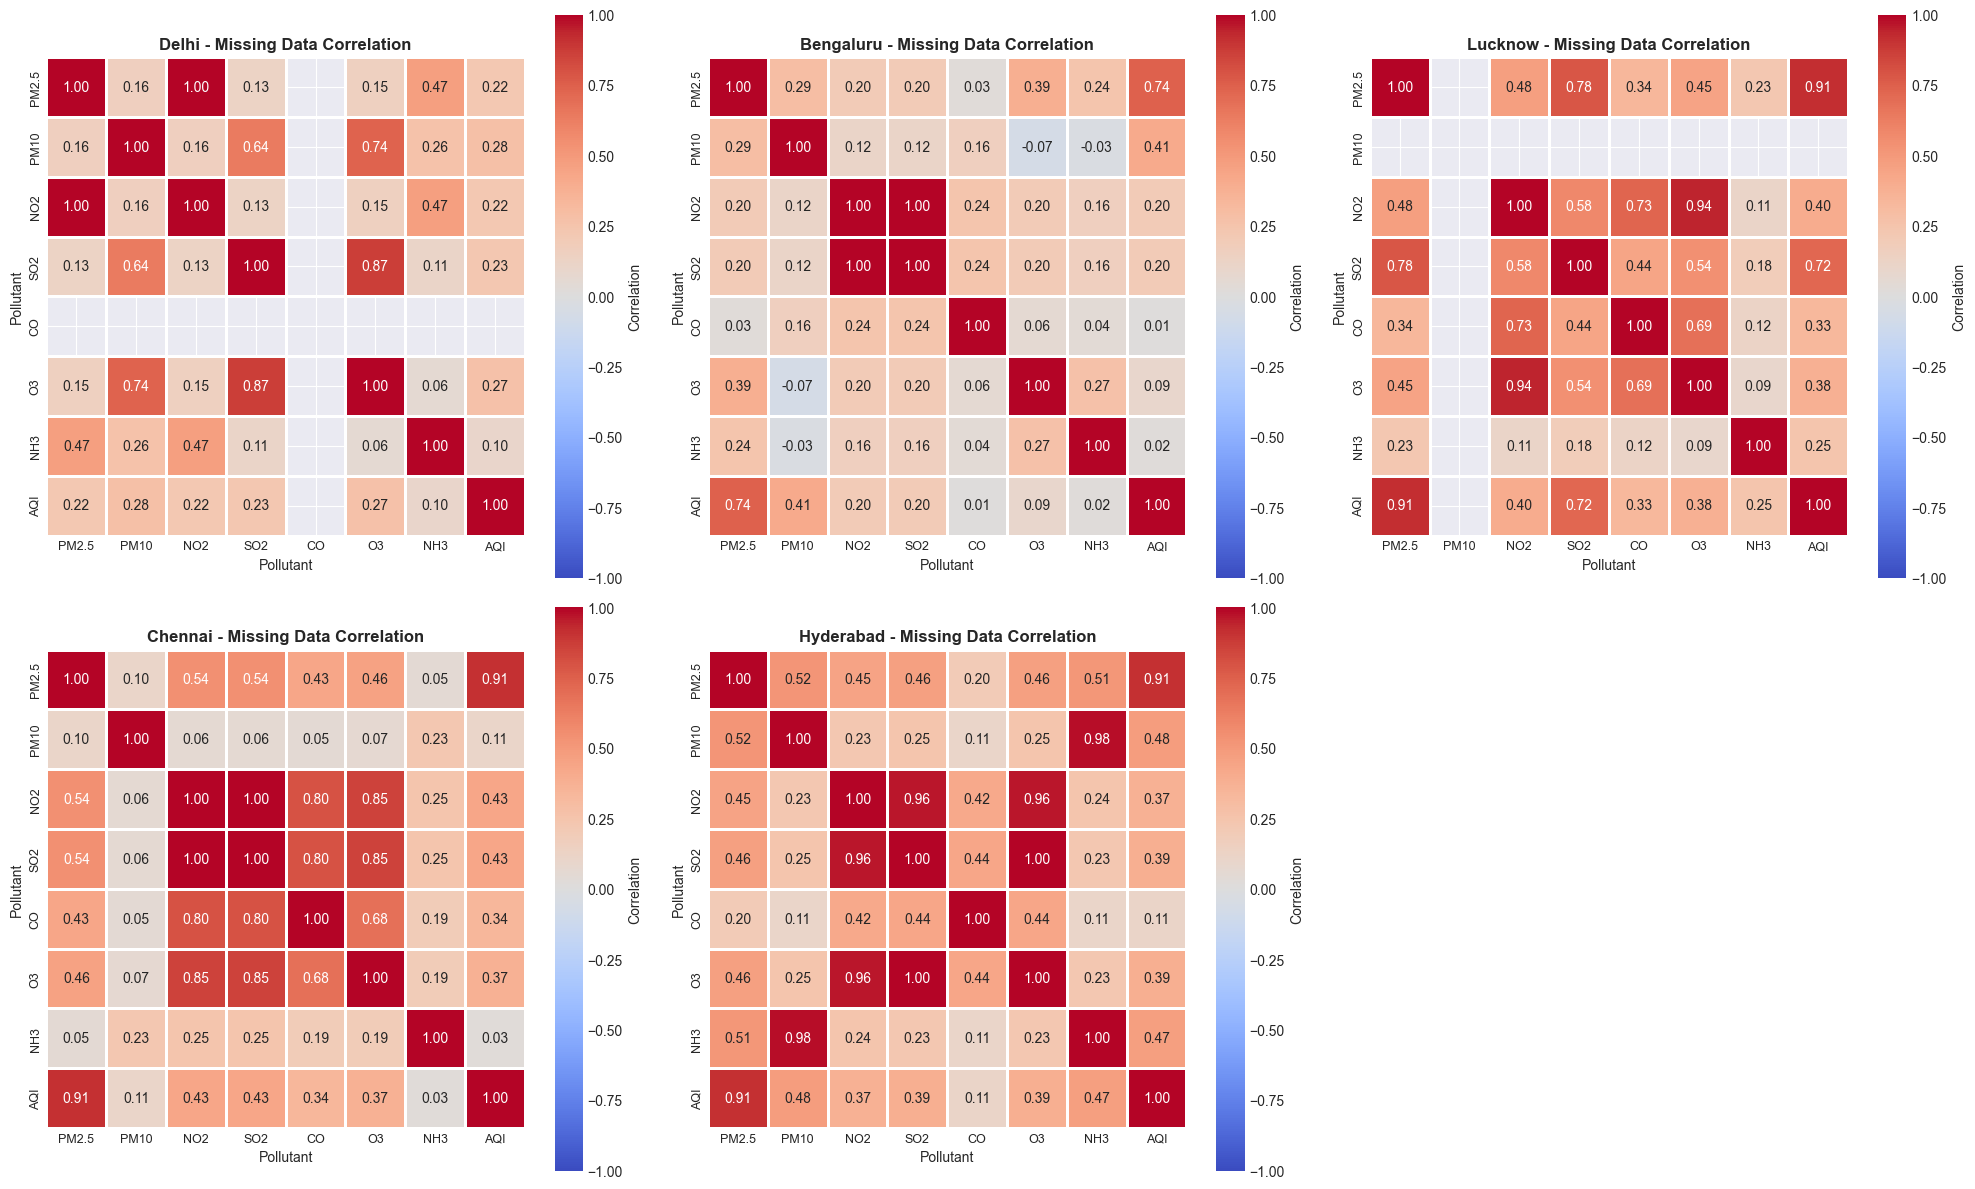


MISSING DATA CORRELATION INSIGHTS

High Positive Correlation = Pollutants tend to be missing together
(Suggests shared sensor/station issues)

High Negative Correlation = When one is missing, other is present
(Unusual pattern)

Low Correlation = Independent missing patterns

Delhi:
--------------------------------------------------------------------------------
Top 3 Most Correlated Missing Data Pairs:
  1. PM2.5 & NO2: 1.000
  2. SO2 & O3: 0.868
  3. PM10 & O3: 0.735

Average Inter-Pollutant Missing Correlation: 0.325
  → MODERATE: Some shared missing patterns

Bengaluru:
--------------------------------------------------------------------------------
Top 3 Most Correlated Missing Data Pairs:
  1. NO2 & SO2: 1.000
  2. PM2.5 & AQI: 0.742
  3. PM10 & AQI: 0.409

Average Inter-Pollutant Missing Correlation: 0.210
  → MODERATE: Some shared missing patterns

Lucknow:
--------------------------------------------------------------------------------
Top 3 Most Correlated Missing Data Pairs:

In [27]:
print("=" * 80)
print("6.4 MISSING DATA CORRELATION ANALYSIS")
print("=" * 80)

# Create missing data indicators (1 = missing, 0 = present)
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for idx, city in enumerate(target_cities):
    ax = axes[idx]
    
    city_data = df_filtered[df_filtered['City'] == city].copy()
    
    # Create binary missing indicators
    missing_indicators = city_data[pollutants].isna().astype(int)
    
    # Calculate correlation of missingness
    missing_corr = missing_indicators.corr()
    
    # Create heatmap
    sns.heatmap(missing_corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax,
                center=0, vmin=-1, vmax=1, square=True,
                cbar_kws={'label': 'Correlation'}, linewidths=1)
    
    ax.set_title(f'{city} - Missing Data Correlation', fontsize=12, fontweight='bold')
    ax.set_xlabel('Pollutant', fontsize=10)
    ax.set_ylabel('Pollutant', fontsize=10)
    ax.tick_params(axis='both', labelsize=9)

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Statistical analysis
print("\n" + "=" * 80)
print("MISSING DATA CORRELATION INSIGHTS")
print("=" * 80)

print("\nHigh Positive Correlation = Pollutants tend to be missing together")
print("(Suggests shared sensor/station issues)")
print("\nHigh Negative Correlation = When one is missing, other is present")
print("(Unusual pattern)")
print("\nLow Correlation = Independent missing patterns")

for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].copy()
    missing_indicators = city_data[pollutants].isna().astype(int)
    missing_corr = missing_indicators.corr()
    
    # Find highest correlations (excluding diagonal)
    mask = np.triu(np.ones_like(missing_corr), k=1).astype(bool)
    corr_values = missing_corr.where(mask).stack().sort_values(ascending=False)
    
    print(f"\n{city}:")
    print("-" * 80)
    
    # Top 3 correlated pairs
    if len(corr_values) > 0:
        print("Top 3 Most Correlated Missing Data Pairs:")
        for i, (pair, corr_val) in enumerate(corr_values.head(3).items()):
            print(f"  {i+1}. {pair[0]} & {pair[1]}: {corr_val:.3f}")
    
    # Overall assessment
    avg_corr = missing_corr.where(mask).stack().mean()
    print(f"\nAverage Inter-Pollutant Missing Correlation: {avg_corr:.3f}")
    
    if avg_corr > 0.5:
        print("  → HIGH: Strong systemic missing data patterns (likely station-level issues)")
    elif avg_corr > 0.2:
        print("  → MODERATE: Some shared missing patterns")
    else:
        print("  → LOW: Independent missing patterns per pollutant")

# Summary across all cities
print("\n" + "=" * 80)
print("OVERALL ASSESSMENT")
print("=" * 80)

all_correlations = []
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city].copy()
    missing_indicators = city_data[pollutants].isna().astype(int)
    missing_corr = missing_indicators.corr()
    mask = np.triu(np.ones_like(missing_corr), k=1).astype(bool)
    all_correlations.extend(missing_corr.where(mask).stack().values)

overall_avg_corr = np.mean(all_correlations)
print(f"\nOverall Average Missing Data Correlation: {overall_avg_corr:.3f}")

if overall_avg_corr > 0.3:
    print("\nInterpretation: Missing data appears to be SYSTEMIC across pollutants.")
    print("This suggests station/sensor-level issues rather than individual pollutant problems.")
    print("Recommendation: Focus on station-level data quality improvements.")
else:
    print("\nInterpretation: Missing data appears to be INDEPENDENT per pollutant.")
    print("This suggests individual sensor issues rather than station-wide problems.")
    print("Recommendation: Focus on pollutant-specific sensor maintenance.")

---

## 7. Cross-City Comparison and Summary

Now let's synthesize our findings and compare the 5 cities across all dimensions analyzed.

7. CROSS-CITY COMPARISON AND SUMMARY

7.1 OVERALL AQI STATISTICS BY CITY

             Mean  Median    Std   Min    Max  25th_Percentile  75th_Percentile
City                                                                          
Delhi     259.49  257.00 119.54 29.00 716.00           161.50           345.50
Lucknow   217.97  198.00 116.96 39.00 707.00           111.00           322.00
Chennai   114.50  100.00  51.97 30.00 449.00            78.00           136.00
Hyderabad 109.21  104.00  53.14 22.00 737.00            75.00           130.00
Bengaluru  94.32   86.00  39.91 20.00 352.00            67.00           111.00

CITY RANKINGS (Best to Worst Air Quality)
1. Bengaluru       - Mean AQI: 94.32 (Satisfactory)
2. Hyderabad       - Mean AQI: 109.21 (Moderate)
3. Chennai         - Mean AQI: 114.50 (Moderate)
4. Lucknow         - Mean AQI: 217.97 (Poor)
5. Delhi           - Mean AQI: 259.49 (Poor)

7.2 AQI CATEGORY DISTRIBUTION BY CITY

Percentage of Days in Each AQI Category:
AQI_Cate

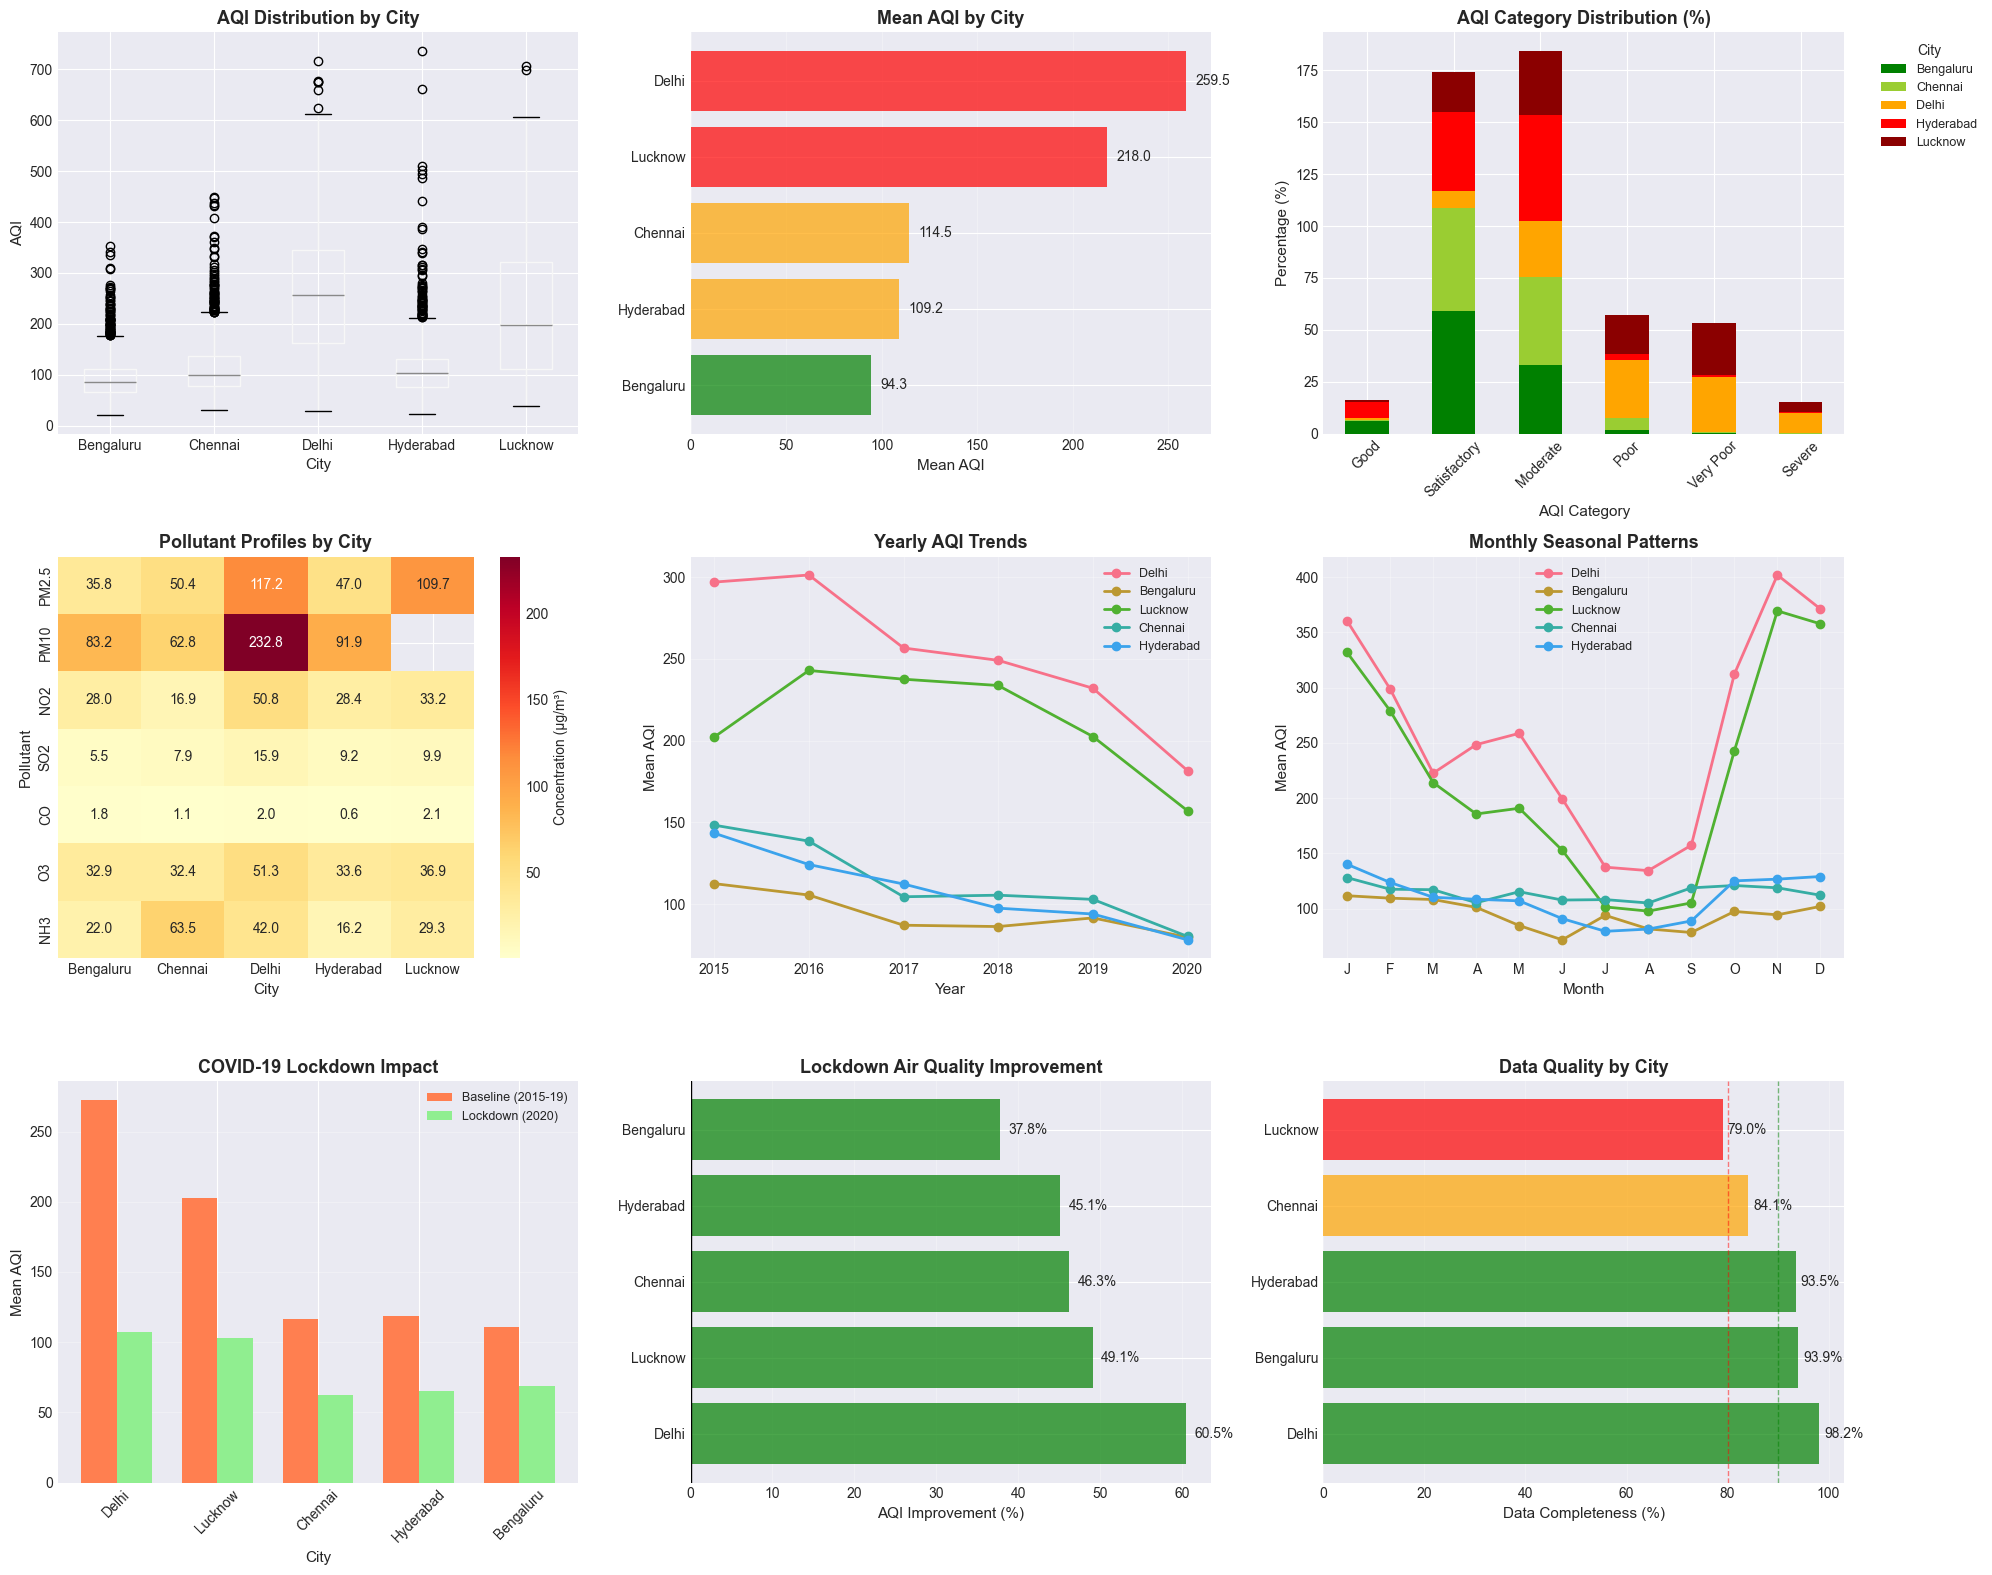


CROSS-CITY COMPARISON COMPLETE


In [28]:
print("=" * 80)
print("7. CROSS-CITY COMPARISON AND SUMMARY")
print("=" * 80)

# Create AQI_Category if it doesn't exist
if 'AQI_Category' not in df_filtered.columns:
    df_filtered['AQI_Category'] = pd.cut(df_filtered['AQI'], 
                                          bins=[0, 50, 100, 200, 300, 400, 500],
                                          labels=['Good', 'Satisfactory', 'Moderate', 'Poor', 'Very Poor', 'Severe'],
                                          include_lowest=True)

# ============================================================================
# 7.1 Overall AQI Statistics Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.1 OVERALL AQI STATISTICS BY CITY")
print("=" * 80)

aqi_stats = df_filtered.groupby('City')['AQI'].agg([
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('25th_Percentile', lambda x: x.quantile(0.25)),
    ('75th_Percentile', lambda x: x.quantile(0.75))
]).round(2)

aqi_stats_sorted = aqi_stats.sort_values('Mean', ascending=False)
print("\n", aqi_stats_sorted.to_string())

# Rank cities by air quality
print("\n" + "=" * 80)
print("CITY RANKINGS (Best to Worst Air Quality)")
print("=" * 80)
for rank, (city, mean_aqi) in enumerate(aqi_stats_sorted['Mean'].sort_values().items(), 1):
    if mean_aqi <= 50:
        category = "Good"
    elif mean_aqi <= 100:
        category = "Satisfactory"
    elif mean_aqi <= 200:
        category = "Moderate"
    elif mean_aqi <= 300:
        category = "Poor"
    else:
        category = "Very Poor"
    print(f"{rank}. {city:15s} - Mean AQI: {mean_aqi:.2f} ({category})")

# ============================================================================
# 7.2 AQI Category Distribution by City
# ============================================================================
print("\n" + "=" * 80)
print("7.2 AQI CATEGORY DISTRIBUTION BY CITY")
print("=" * 80)

category_dist = df_filtered.groupby(['City', 'AQI_Category']).size().unstack(fill_value=0)
category_pct = category_dist.div(category_dist.sum(axis=1), axis=0) * 100

print("\nPercentage of Days in Each AQI Category:")
print(category_pct.round(2).to_string())

# ============================================================================
# 7.3 Pollutant Profile Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.3 POLLUTANT PROFILES BY CITY (Mean Concentrations)")
print("=" * 80)

pollutants_for_comparison = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3', 'NH3']
pollutant_profiles = df_filtered.groupby('City')[pollutants_for_comparison].mean().round(2)
print("\n", pollutant_profiles.to_string())

# Identify dominant pollutants per city
print("\n" + "=" * 80)
print("DOMINANT POLLUTANT BY CITY (Highest Concentration)")
print("=" * 80)
for city in target_cities:
    city_profile = pollutant_profiles.loc[city]
    dominant = city_profile.idxmax()
    print(f"{city:15s}: {dominant} ({city_profile[dominant]:.2f} µg/m³)")

# ============================================================================
# 7.4 Temporal Trends Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.4 TEMPORAL TRENDS COMPARISON (2015-2020)")
print("=" * 80)

yearly_trends = df_filtered.groupby(['City', 'Year'])['AQI'].mean().unstack()
print("\nYearly Mean AQI:")
print(yearly_trends.round(2).to_string())

# Calculate trend slopes
print("\n" + "=" * 80)
print("AQI TREND SLOPES (AQI change per year)")
print("=" * 80)
for city in target_cities:
    city_yearly = df_filtered[df_filtered['City'] == city].groupby('Year')['AQI'].mean().reset_index()
    if len(city_yearly) > 1:
        years_numeric = city_yearly['Year'] - city_yearly['Year'].min()
        slope = np.polyfit(years_numeric, city_yearly['AQI'], 1)[0]
        trend_direction = "Improving ✓" if slope < 0 else "Worsening ✗"
        print(f"{city:15s}: {slope:+.2f} AQI/year → {trend_direction}")

# ============================================================================
# 7.5 Seasonal Pattern Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.5 SEASONAL PATTERNS - WORST AND BEST MONTHS")
print("=" * 80)

for city in target_cities:
    city_monthly = df_filtered[df_filtered['City'] == city].groupby('Month_Name')['AQI'].mean()
    worst_month = city_monthly.idxmax()
    best_month = city_monthly.idxmin()
    worst_aqi = city_monthly.max()
    best_aqi = city_monthly.min()
    seasonal_range = worst_aqi - best_aqi
    
    print(f"\n{city}:")
    print(f"  Worst: {worst_month:10s} (AQI: {worst_aqi:.1f})")
    print(f"  Best:  {best_month:10s} (AQI: {best_aqi:.1f})")
    print(f"  Seasonal Range: {seasonal_range:.1f} AQI points")

# ============================================================================
# 7.6 COVID-19 Impact Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.6 COVID-19 LOCKDOWN IMPACT COMPARISON")
print("=" * 80)

lockdown_impact = []
for city in target_cities:
    city_lockdown_2020 = df_2020[(df_2020['City'] == city) & (df_2020['Lockdown'] == 'Lockdown')]['AQI'].mean()
    city_baseline = df_baseline_lockdown_period[df_baseline_lockdown_period['City'] == city]['AQI'].mean()
    
    if pd.notna(city_lockdown_2020) and pd.notna(city_baseline):
        improvement = city_baseline - city_lockdown_2020
        improvement_pct = (improvement / city_baseline) * 100
        lockdown_impact.append({
            'City': city,
            'Baseline': city_baseline,
            'Lockdown': city_lockdown_2020,
            'Improvement': improvement,
            'Improvement_%': improvement_pct
        })

lockdown_impact_df = pd.DataFrame(lockdown_impact).sort_values('Improvement_%', ascending=False)
print("\nCities Ranked by Lockdown Air Quality Improvement:")
print(lockdown_impact_df.to_string(index=False))

# ============================================================================
# 7.7 Data Quality Comparison
# ============================================================================
print("\n" + "=" * 80)
print("7.7 DATA QUALITY COMPARISON")
print("=" * 80)

data_quality = []
for city in target_cities:
    city_data = df_filtered[df_filtered['City'] == city]
    total_records = len(city_data)
    
    # Calculate average completeness across all pollutants
    completeness_pct = []
    for pollutant in pollutants:
        completeness = (1 - city_data[pollutant].isna().mean()) * 100
        completeness_pct.append(completeness)
    
    avg_completeness = np.mean(completeness_pct)
    
    data_quality.append({
        'City': city,
        'Total_Records': total_records,
        'Avg_Completeness_%': avg_completeness,
        'Years_Covered': f"{int(city_data['Year'].min())}-{int(city_data['Year'].max())}"
    })

data_quality_df = pd.DataFrame(data_quality).sort_values('Avg_Completeness_%', ascending=False)
print("\n", data_quality_df.to_string(index=False))

# ============================================================================
# VISUALIZATIONS
# ============================================================================

fig = plt.figure(figsize=(20, 16))

# Plot 1: Box plot comparison
ax1 = plt.subplot(3, 3, 1)
df_filtered.boxplot(column='AQI', by='City', ax=ax1)
ax1.set_title('AQI Distribution by City', fontsize=13, fontweight='bold')
ax1.set_xlabel('City', fontsize=11)
ax1.set_ylabel('AQI', fontsize=11)
plt.suptitle('')  # Remove automatic title

# Plot 2: Mean AQI comparison
ax2 = plt.subplot(3, 3, 2)
cities_sorted = aqi_stats.sort_values('Mean')
colors = ['green' if x < 100 else 'orange' if x < 200 else 'red' for x in cities_sorted['Mean']]
ax2.barh(cities_sorted.index, cities_sorted['Mean'], color=colors, alpha=0.7)
ax2.set_xlabel('Mean AQI', fontsize=11)
ax2.set_title('Mean AQI by City', fontsize=13, fontweight='bold')
ax2.grid(axis='x', alpha=0.3)
for i, v in enumerate(cities_sorted['Mean']):
    ax2.text(v + 5, i, f'{v:.1f}', va='center', fontsize=10)

# Plot 3: AQI category distribution (stacked bar)
ax3 = plt.subplot(3, 3, 3)
category_pct_T = category_pct.T
category_pct_T.plot(kind='bar', stacked=True, ax=ax3, 
                    color=['green', 'yellowgreen', 'orange', 'red', 'darkred', 'purple'])
ax3.set_title('AQI Category Distribution (%)', fontsize=13, fontweight='bold')
ax3.set_xlabel('AQI Category', fontsize=11)
ax3.set_ylabel('Percentage (%)', fontsize=11)
ax3.legend(title='City', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
ax3.tick_params(axis='x', rotation=45)

# Plot 4: Pollutant profile heatmap
ax4 = plt.subplot(3, 3, 4)
sns.heatmap(pollutant_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd', ax=ax4,
            cbar_kws={'label': 'Concentration (µg/m³)'})
ax4.set_title('Pollutant Profiles by City', fontsize=13, fontweight='bold')
ax4.set_xlabel('City', fontsize=11)
ax4.set_ylabel('Pollutant', fontsize=11)

# Plot 5: Yearly trends comparison
ax5 = plt.subplot(3, 3, 5)
for city in target_cities:
    city_yearly = df_filtered[df_filtered['City'] == city].groupby('Year')['AQI'].mean()
    ax5.plot(city_yearly.index, city_yearly.values, marker='o', linewidth=2, label=city)
ax5.set_xlabel('Year', fontsize=11)
ax5.set_ylabel('Mean AQI', fontsize=11)
ax5.set_title('Yearly AQI Trends', fontsize=13, fontweight='bold')
ax5.legend(fontsize=9)
ax5.grid(alpha=0.3)

# Plot 6: Seasonal patterns comparison
ax6 = plt.subplot(3, 3, 6)
for city in target_cities:
    city_monthly = df_filtered[df_filtered['City'] == city].groupby('Month')['AQI'].mean()
    ax6.plot(city_monthly.index, city_monthly.values, marker='o', linewidth=2, label=city)
ax6.set_xlabel('Month', fontsize=11)
ax6.set_ylabel('Mean AQI', fontsize=11)
ax6.set_title('Monthly Seasonal Patterns', fontsize=13, fontweight='bold')
ax6.set_xticks(range(1, 13))
ax6.set_xticklabels(['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D'])
ax6.legend(fontsize=9)
ax6.grid(alpha=0.3)

# Plot 7: COVID-19 impact comparison
ax7 = plt.subplot(3, 3, 7)
x = np.arange(len(lockdown_impact_df))
width = 0.35
ax7.bar(x - width/2, lockdown_impact_df['Baseline'], width, label='Baseline (2015-19)', color='coral')
ax7.bar(x + width/2, lockdown_impact_df['Lockdown'], width, label='Lockdown (2020)', color='lightgreen')
ax7.set_xlabel('City', fontsize=11)
ax7.set_ylabel('Mean AQI', fontsize=11)
ax7.set_title('COVID-19 Lockdown Impact', fontsize=13, fontweight='bold')
ax7.set_xticks(x)
ax7.set_xticklabels(lockdown_impact_df['City'], rotation=45)
ax7.legend(fontsize=9)
ax7.grid(axis='y', alpha=0.3)

# Plot 8: Lockdown improvement percentage
ax8 = plt.subplot(3, 3, 8)
colors_improvement = ['green' if x > 0 else 'red' for x in lockdown_impact_df['Improvement_%']]
ax8.barh(lockdown_impact_df['City'], lockdown_impact_df['Improvement_%'], color=colors_improvement, alpha=0.7)
ax8.set_xlabel('AQI Improvement (%)', fontsize=11)
ax8.set_title('Lockdown Air Quality Improvement', fontsize=13, fontweight='bold')
ax8.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax8.grid(axis='x', alpha=0.3)
for i, v in enumerate(lockdown_impact_df['Improvement_%']):
    ax8.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

# Plot 9: Data quality comparison
ax9 = plt.subplot(3, 3, 9)
colors_quality = ['green' if x >= 90 else 'orange' if x >= 80 else 'red' 
                  for x in data_quality_df['Avg_Completeness_%']]
ax9.barh(data_quality_df['City'], data_quality_df['Avg_Completeness_%'], color=colors_quality, alpha=0.7)
ax9.set_xlabel('Data Completeness (%)', fontsize=11)
ax9.set_title('Data Quality by City', fontsize=13, fontweight='bold')
ax9.axvline(x=80, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax9.axvline(x=90, color='green', linestyle='--', linewidth=1, alpha=0.5)
ax9.grid(axis='x', alpha=0.3)
for i, v in enumerate(data_quality_df['Avg_Completeness_%']):
    ax9.text(v + 1, i, f'{v:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("CROSS-CITY COMPARISON COMPLETE")
print("=" * 80)

---

## 8. Key Findings and Insights

### 📊 Data Quality & City Selection

- **Top 5 Cities Selected**: Delhi, Bengaluru, Lucknow, Chennai, Hyderabad (based on AQI data completeness)
- **Date Range**: January 1, 2015 to July 1, 2020 (~2,008 days per city)
- **Best Data Quality**: Delhi (98.17% complete), Bengaluru (93.93%), Hyderabad (93.51%)
- **Most Problematic Pollutant**: PM10 (44.88% missing across all cities), followed by NH3 (20.29%)
- **Data Quality Improvement**: Completeness improved from 81.43% (2015) to 96.78% (2020) - **+15.34% improvement**

### 🏆 Air Quality Rankings (Best to Worst)

1. **Bengaluru**: Mean AQI 94.32 (Satisfactory) - 58.8% days satisfactory, 33% moderate
2. **Hyderabad**: Mean AQI 109.21 (Moderate) - Generally moderate air quality
3. **Chennai**: Mean AQI 114.50 (Moderate) - 49.9% days satisfactory, 42.7% moderate
4. **Lucknow**: Mean AQI 217.97 (Poor) - 30.5% moderate, 25% very poor, 18.6% poor
5. **Delhi**: Mean AQI 259.49 (Poor) - 27.1% poor, 26% very poor, 26% moderate, 12% severe

### 🔬 Pollutant Characteristics

**Strongest AQI Predictors** (Correlation with AQI):
- **PM10**: 0.91 (Very Strong) - Most important predictor
- **PM2.5**: 0.89 (Very Strong) - Second most important
- **NO2**: 0.60 (Moderate)
- **SO2**: 0.44 (Moderate)
- **O3**: 0.40 (Moderate)
- **CO**: 0.26 (Weak)

**Mean Pollutant Levels by City**:
- **Highest PM2.5**: Delhi (117.20 µg/m³), Lucknow (109.71 µg/m³)
- **Lowest PM2.5**: Bengaluru (35.82 µg/m³), Hyderabad (47.04 µg/m³)
- **Highest PM10**: Delhi (232.81 µg/m³)
- **Highest NO2**: Delhi (50.79 µg/m³)

**Outlier Prevalence**:
- CO has highest outlier rates (9-14% across cities)
- SO2 outliers significant in Hyderabad (9.24%)
- PM2.5 outliers relatively low (2-3.6% across cities)

### 📈 Temporal Trends & Patterns

**Overall Improvement (2015 → 2020)**:
- **Delhi**: 297.02 → 181.67 AQI (-38.84%, -115.35 AQI points) ✓ **Significant improvement**
- **Chennai**: 148.33 → 80.25 AQI (-45.90%, -68.08 AQI points) ✓ **Largest percentage improvement**
- **Hyderabad**: 143.42 → 78.17 AQI (-45.50%, -65.25 AQI points) ✓
- **Bengaluru**: 112.57 → 79.72 AQI (-29.18%, -32.85 AQI points) ✓
- **Lucknow**: 202.24 → 157.13 AQI (-22.31%, -45.11 AQI points) ✓

**Linear Trend Slopes** (Daily AQI change):
- Delhi: **-0.057 AQI/day** = -20.81 AQI/year → Improving ✓
- Lucknow: **-0.021 AQI/day** = -7.70 AQI/year → Improving ✓

### 🌡️ Seasonal Patterns

**Strong Seasonality** (ANOVA p < 0.001 for all cities):

**Worst Months (Winter)**:
- **Delhi**: November (AQI: 401.95) - **Critical levels**
- **Lucknow**: November (AQI: 369.50) - **Critical levels**
- **Bengaluru**: January (AQI: 111.73)
- **Chennai**: January (AQI: 128.10)

**Best Months (Monsoon)**:
- **Delhi**: August (AQI: 134.44) - **67% reduction from worst**
- **Lucknow**: August (AQI: 97.81) - **74% reduction from worst**
- **Bengaluru**: June (AQI: 71.80)
- **Chennai**: August (AQI: 105.16)

**Seasonal Range** (Worst - Best):
- Delhi: **267.51 AQI points** (Highest seasonal variation)
- Lucknow: **271.69 AQI points**
- Bengaluru: **39.93 AQI points** (Most stable)
- Chennai: **22.94 AQI points** (Most stable)

**Key Insight**: Winter months (Nov-Jan) show dramatically worse air quality in northern cities due to crop burning, firecracker usage (Diwali), and meteorological conditions.

### 📆 Day-of-Week Analysis

- **No significant weekday vs weekend difference** (t-test p > 0.05 for all cities)
- Delhi: Weekday 259.74 vs Weekend 258.84 (p=0.879)
- **Implication**: Industrial/commercial activity patterns do not significantly impact daily AQI levels

### 🦠 COVID-19 Lockdown Impact (March 25 - May 3, 2020 vs 2015-2019 Baseline)

**Dramatic Air Quality Improvements During Lockdown**:

**PM2.5 Reductions**:
- Chennai: **-67.6%** (54.50 → 17.66 µg/m³) - Largest drop
- Delhi: **-57.2%** (99.59 → 42.65 µg/m³)
- Lucknow: **-41.2%** (89.43 → 52.57 µg/m³)
- Bengaluru: **-39.9%** (41.64 → 25.04 µg/m³)
- Hyderabad: **-36.4%** (48.25 → 30.69 µg/m³)

**PM10 Reductions**:
- Delhi: **-59.1%** (237.98 → 97.27 µg/m³)
- Bengaluru: **-55.3%** (107.35 → 48.03 µg/m³)
- Hyderabad: **-46.1%** (113.50 → 61.18 µg/m³)

**NO2 Reductions** (Traffic indicator):
- Lucknow: **-64.3%** - Highest traffic reduction
- Delhi: **-63.4%**
- Chennai: **-57.1%**
- Bengaluru: **-54.3%**
- Hyderabad: **-30.7%**

**CO Reductions**:
- Delhi: **-71.1%** (2.57 → 0.74 mg/m³) - Largest CO drop
- Chennai: **-54.5%**
- Bengaluru: **-48.2%**
- Lucknow: **-34.3%**

**Key Insights**:
- Lockdown demonstrated that **anthropogenic sources contribute 40-70% of urban air pollution**
- Traffic-related pollutants (NO2, CO) showed largest reductions
- PM2.5 and PM10 reductions indicate significant impact from vehicular emissions and industrial activity
- **Evidence that policy interventions targeting vehicular and industrial emissions can significantly improve air quality**

### 🔄 Cross-City Comparison Summary

**Pollutant Dominance**:
- **Delhi**: Extremely high PM2.5 (117.20) and PM10 (232.81) - **Particulate matter crisis**
- **Lucknow**: High PM2.5 (109.71), but PM10 data completely missing
- **Southern Cities** (Bengaluru, Chennai, Hyderabad): **Much lower PM levels** (35-50 µg/m³)

**Geographic Patterns**:
- **North Indian cities** (Delhi, Lucknow): Severe pollution, strong winter seasonality
- **South Indian cities** (Bengaluru, Chennai, Hyderabad): Better air quality, less seasonal variation
- **Coastal cities** (Chennai): More stable air quality due to sea breeze effects

### 🎯 Key Recommendations for Modeling

1. **Feature Engineering**:
   - Focus on **PM2.5 and PM10** as primary predictive features (r > 0.89 with AQI)
   - Include **temporal features**: Month (strong seasonality), Year (improving trend)
   - Consider **lagged features**: 7-day, 30-day rolling averages showed clear trends
   - **Exclude day-of-week** (no significant effect)

2. **Data Handling**:
   - **PM10 missing data**: Consider imputation techniques or exclude PM10 for Lucknow
   - Focus modeling efforts on **2017-2020 data** (better completeness: 88-97%)
   - Handle outliers carefully (especially CO: 9-14%, SO2: up to 9%)

3. **City-Specific Models**:
   - Consider **separate models for north vs south cities** (different pollution profiles)
   - Delhi and Lucknow may benefit from **winter-specific models** (seasonal variation >270 AQI points)
   - Bengaluru/Chennai models can be simpler (lower seasonal variation <40 AQI points)

4. **Forecasting Approach**:
   - Use **Option A**: Predict pollutant concentrations → Calculate AQI using CPCB formula
   - Rationale: Strong correlations exist (PM2.5/PM10 r>0.89), domain knowledge preserved
   - Focus on **24-hour ahead forecasting** using 72-hour historical window

5. **Seasonal Adjustments**:
   - Implement **season-aware features** (winter months Nov-Jan require special handling)
   - Consider **separate monsoon models** (June-Sept) for northern cities

6. **Model Validation**:
   - Reserve **2020 data for testing** (different distribution due to COVID)
   - Evaluate model performance **by season** (not just overall metrics)
   - Track **category-level accuracy** (Good, Satisfactory, Moderate, Poor, etc.)

### 📌 Critical Insights Summary

✅ **Air quality has improved** significantly across all cities (2015-2020), with 22-46% reductions in mean AQI

✅ **PM2.5 and PM10 are the key drivers** of AQI, accounting for most variation (r > 0.89)

✅ **Strong winter pollution crisis** in northern cities, with November AQI levels reaching 400+

✅ **COVID-19 lockdown proved** that reducing anthropogenic activities can decrease pollution by 40-70%

✅ **Data quality is improving** steadily (+15% from 2015 to 2020), making recent years more reliable for modeling

✅ **Geographic divide**: South Indian cities have significantly better air quality than North Indian cities

✅ **Seasonal patterns are highly significant** and must be incorporated into any forecasting model

---

**Analysis Complete** - Ready for Feature Engineering and Model Development Phase 🚀

In [29]:
# Missing data analysis code will go here
print("Missing data analysis pending...")

Missing data analysis pending...


---

## 8. Key Findings and Recommendations <a id='findings'></a>

### Summary of Findings

*(To be completed after analysis)*

### Recommendations for Next Steps

*(To be completed after analysis)*

---

**Next Notebook:** `02_Data_Preparation.ipynb`